# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# Venezula
# file_path= './data/NCDC/arturo/dat.txt' # misdirection
# file_path= './data/NCDC/simon_bolivar_intl/dat.txt' # misdirection

# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/uk/tiree/dat.txt', 1.9, 4 
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend, try 2
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth= './data/asos/olympia/hr_avg.csv', 0.5 # might block
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 4 # good enough
# file_path = 'data/ECMWF/venezuela/8N67W/dat.csv' # good enough, can be coorect, still need other investigation.
# file_path = 'data/ECMWF/chile/52S75W/dat.csv' # good enough
# file_path = 'data/ECMWF/iceland/65N17W/dat.csv' # good enough
# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/germany/49N9E/dat.csv', 4 # miss peak
# file_path = 'data/ECMWF/sudan/18N32E/dat.csv' # good enough
# file_path = 'data/ECMWF/china/24N121E/dat.csv' # good enough
# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/australia/37S142E/dat.csv', 4 # miss the peak

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
elif 'asos' in file_path:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
    knot_unit = True
else:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x=-df.x
    df.y=-df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d')
    df['date']=df['date'].astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    df['type']='default'
    df['wind_type']='default'
    convert_to_knot = True
    integer_data = False
    cartesian = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19560820  0000  FM-12  200    5.1         N
1       19560820  0300  FM-12  250    4.1         N
2       19560820  0600  FM-12  250    5.1         N
3       19560820  0900  FM-12  270    6.2         N
4       19560820  1200  FM-12  270    5.1         N
5       19560820  1800  FM-12  290    3.1         N
6       19560820  2100  FM-12  320    3.1         N
7       19560821  0000  FM-12  320    3.1         N
8       19560821  0300  FM-12  290    4.1         N
9       19560821  0600  FM-12  270    5.1         N
10      19560821  0900  FM-12  320    2.1         N
11      19560821  1200  FM-12   90    1.0         N
12      19560821  1800  FM-12  140    2.1         N
13      19560821  2100  FM-12  140    2.1         N
14      19560822  0300  FM-12  140    6.2         N
15      19560822  0600  FM-12  160    4.1         N
16      19560822  1200  FM-12  140    4.1         N
17      19560822  1800  FM-12  200    3.1         N
18      19560822  2100  FM-12  290    7.2         N
19      19560823  0300  FM-12  270    7.2         N
20      19560823  0900  FM-12  320    5.1         N
21      19560823  1200  FM-12  270    1.0         N
22      19560823  2100  FM-12  999    0.0         C
23      19560824  0000  FM-12  999    0.0         C
24      19560824  0300  FM-12  270    1.0         N
25      19560824  0600  FM-12   90    1.0         N
26      19560824  0900  FM-12  160    2.1         N
27      19560824  1200  FM-12  999    0.0         C
28      19560824  1800  FM-12  999    0.0         C
29      19560824  2100  FM-12  140    4.1         N
...          ...   ...    ...  ...    ...       ...
359333  20150301  0900  FM-15  270    4.0         N
359334  20150301  0930  FM-15  260    4.0         V
359335  20150301  1000  FM-15  250    4.0         V
359336  20150301  1030  FM-15  250    3.0         V
359337  20150301  1100  FM-15  260    4.0         N
359338  20150301  1130  FM-15  230    3.0         N
359339  20150301  1200  FM-15  230    2.0         V
359340  20150301  1230  FM-15  270    3.0         N
359341  20150301  1300  FM-15  240    2.0         V
359342  20150301  1330  FM-15  260    2.0         V
359343  20150301  1400  FM-15  250    2.0         V
359344  20150301  1430  FM-15  240    2.0         V
359345  20150301  1500  FM-15  999    0.0         C
359346  20150301  1530  FM-15  999    1.0         V
359347  20150301  1600  FM-15  999    1.0         V
359348  20150301  1630  FM-15  210    1.0         N
359349  20150301  1700  FM-15  999    1.0         V
359350  20150301  1730  FM-15  999    1.0         V
359351  20150301  1800  FM-15  999    1.0         V
359352  20150301  1830  FM-15  180    1.0         N
359353  20150301  1900  FM-15  160    1.0         N
359354  20150301  1930  FM-15  210    1.0         N
359355  20150301  2000  FM-15  230    2.0         N
359356  20150301  2030  FM-15  230    1.0         N
359357  20150301  2100  FM-15  240    2.0         N
359358  20150301  2130  FM-15  180    1.0         N
359359  20150301  2200  FM-15  160    1.0         N
359360  20150301  2230  FM-15  150    1.0         N
359361  20150301  2300  FM-15  190    2.0         N
359362  20150301  2330  FM-15  190    1.0         N

[359363 rows x 6 columns]

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

31.198 121.336


In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


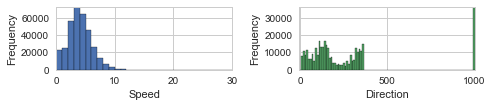

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

date           HrMn            dir          speed  \
count  3.369710e+05  336971.000000  336971.000000  336971.000000   
mean   2.000006e+07    1128.070137     268.228497       3.543890   
std    1.115119e+05     691.735348     275.924866       2.002307   
min    1.973010e+07       0.000000       0.000000       0.000000   
25%    1.991120e+07     530.000000      90.000000       2.000000   
50%    2.002062e+07    1100.000000     200.000000       3.000000   
75%    2.010050e+07    1730.000000     320.000000       5.000000   
max    2.015030e+07    2357.000000     999.000000      30.000000   

        dir_windrose  
count  336971.000000  
mean      248.807883  
std       279.529540  
min         0.000000  
25%        90.000000  
50%       150.000000  
75%       310.000000  
max       999.000000

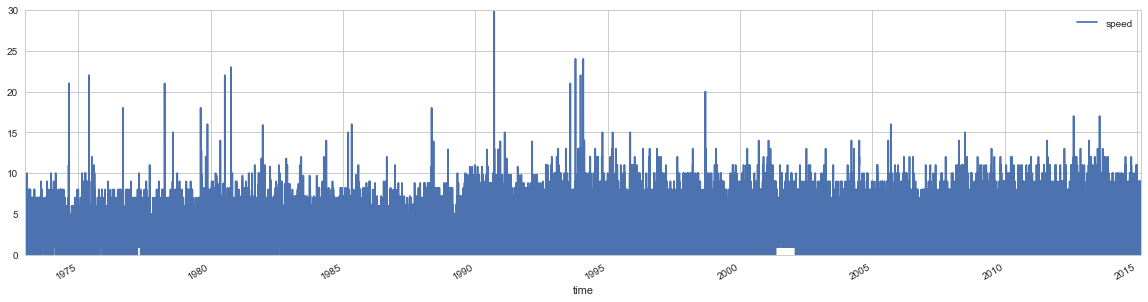

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if 'cartesian' in globals():
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


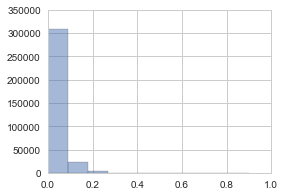

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
else:
    knot_unit = False
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

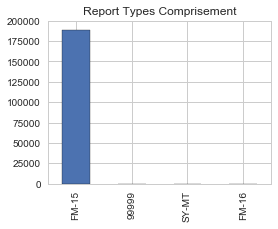

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

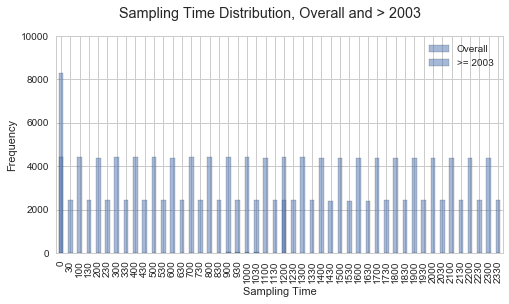

In [12]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0, 30]


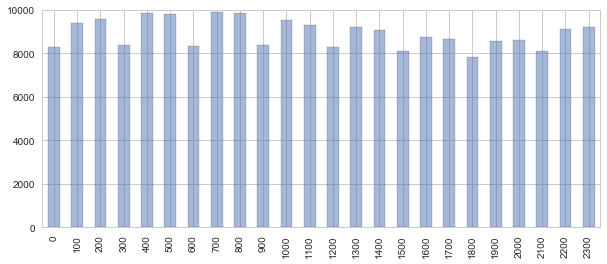

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df['2000':]['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  dir_windrose
time                                                                          
1994-01-28 00:00:00  19940128     0  FM-15  119    3.0         N           331
1994-07-18 10:00:00  19940718  1000  FM-15  337    5.0         N           113
1994-08-05 11:00:00  19940805  1100  FM-15  335    9.0         N           115
1994-08-10 05:00:00  19940810   500  FM-15  319   10.0         N           131
1994-09-03 21:00:00  19940903  2100  FM-15  331    5.0         N           119
1994-12-03 14:00:00  19941203  1400  FM-15  316    3.0         N           134
1995-04-03 13:00:00  19950403  1300  FM-15  337    3.0         N           113
1998-06-03 11:00:00  19980603  1100  FM-15   59   10.0         N            31
1998-09-09 12:00:00  19980909  1200  FM-15  359   20.0         N            91

sudden increase in speed

date  HrMn   type  dir  speed wind_type  \
time                                                               
1993-12-21 22:00:00  19931221  2200  FM-15  110   22.0         N   
1993-08-02 14:00:00  19930802  1400  FM-15  140   21.0         N   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N   
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N   
1995-11-07 04:00:00  19951107   400  FM-15  110   15.0         N   
2012-08-08 04:00:00  20120808   400  FM-15    0   15.0         N   
2008-07-02 08:00:00  20080702   800  FM-15  170   15.0         N   

                     dir_windrose  incre  incre_reverse  
time                                                     
1993-12-21 22:00:00           340   19.0           20.0  
1993-08-02 14:00:00           310   17.0           21.0  
1985-04-30 08:00:00           140    9.8            9.8  
2005-09-11 17:00:00            90    4.0            4.0  
1981-12-19 07:00:00           310   13.9            3.1  
1994-10-20 08:00:00           310    6.0            8.0  
2012-08-08 05:00:00            80    0.0            2.0  
1995-11-07 04:00:00           340    5.0            2.0  
2012-08-08 04:00:00            90    2.0            0.0  
2008-07-02 08:00:00           280   10.0           13.0

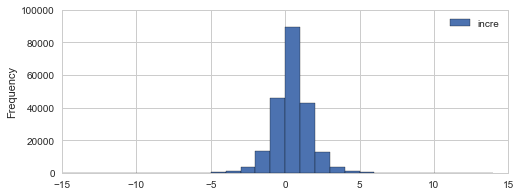

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 2


date  HrMn   type  dir  speed wind_type  \
time                                                               
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N   
2012-08-08 04:00:00  20120808   400  FM-15    0   15.0         N   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N   
1995-11-07 04:00:00  19951107   400  FM-15  110   15.0         N   
1995-03-09 15:00:00  19950309  1500  FM-15  110   15.0         N   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N   
2013-03-09 17:00:00  20130309  1700  FM-15   80   14.0         N   
2005-08-06 03:00:00  20050806   300  FM-15  350   14.0         N   

                     dir_windrose  incre  incre_reverse  
time                                                     
2005-09-11 17:00:00            90    4.0            4.0  
1985-04-30 08:00:00           140    9.8            9.8  
1981-12-19 07:00:00           310   13.9            3.1  
2012-08-08 04:00:00            90    2.0            0.0  
2012-08-08 05:00:00            80    0.0            2.0  
1995-11-07 04:00:00           340    5.0            2.0  
1995-03-09 15:00:00           340    4.0            3.0  
1994-10-20 08:00:00           310    6.0            8.0  
2013-03-09 17:00:00            10    8.0            2.0  
2005-08-06 03:00:00           100    4.0            1.0

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       5114
10      3736
20      3931
30      4370
40      4484
50      6036
60      6681
70      5524
80      5811
90      8968
100     8340
110     7085
120     7931
130     6770
140     4428
150     3796
160     3319
170     2573
180     2191
190     1555
200     1578
210     1991
220     1885
230     1882
240     2132
250     2360
260     3096
270     4399
280     4881
290     7184
300    11033
310     9313
320     9832
330    10032
340     7915
350     6258
999    25824
Name: dir, dtype: int64

36 10.0


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0412621359223


0.0    15499
2.0     5486
1.0     4531
3.0      229
4.0       43
5.0       15
3.1        8
4.1        4
2.1        3
7.0        2
5.1        2
6.0        2
Name: speed, dtype: int64


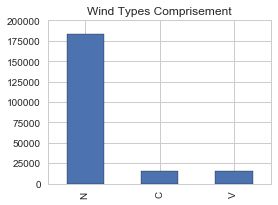

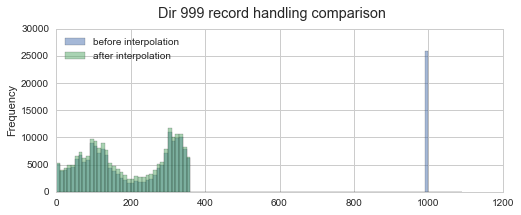

In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

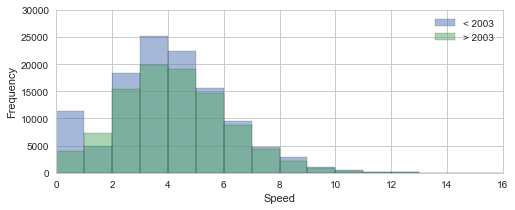

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df[:str(MID_YEAR)]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

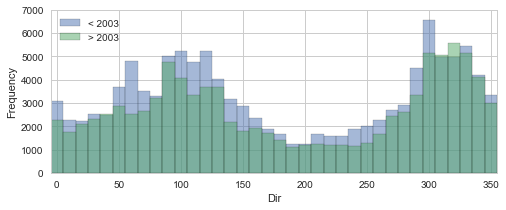

In [22]:
df[:str(MID_YEAR)]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


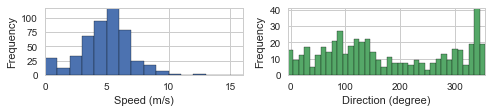

1981 - 1985


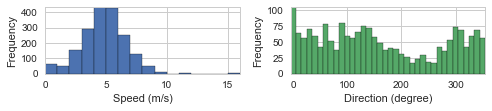

1986 - 1990


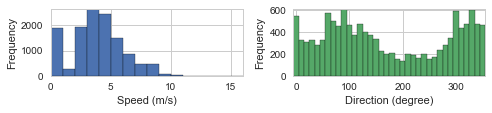

1991 - 1995


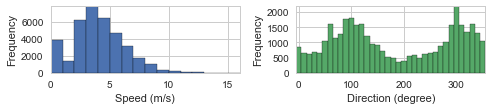

1996 - 2000


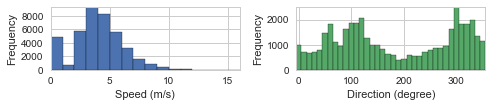

2001 - 2005


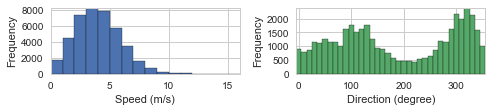

2006 - 2010


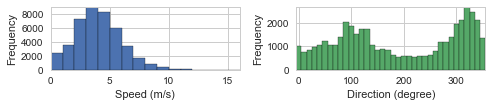

2011 - 2015


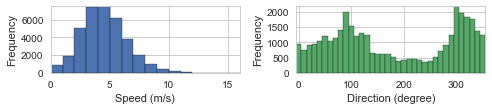

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 6.0)

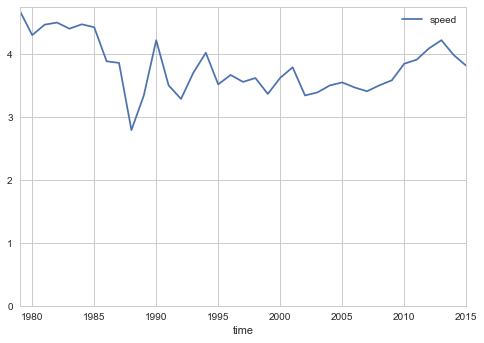

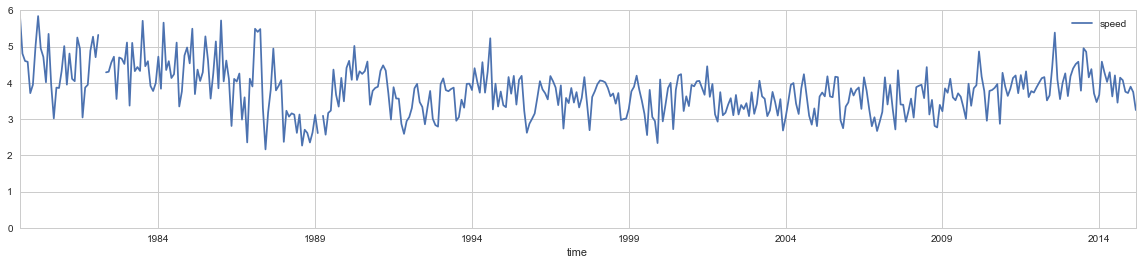

In [25]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 1000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAADg5JREFUeJzt3X1sU/UaB/Bv17J2a/e+qVfc5jbduDC4c07B+EIwThR0
xKAyJMwETNBE0eAGOoUN1rhF+cNIJolxJnNgkOyaG4fX+BIwcBW4wN10Lw64CCvbGLCt7dqedu12
fvePXY4Oe3q6na3ndDyfZAntc+h5KPu25+V3zk/DGGMghExKhNINEBLOKECEyEABIkQGChAhMlCA
CJGBAkSIDBQgFWCM4YUXXsCePXuE52w2G0pLS7Fw4UI88MAD+OCDD8DzvFB3Op0oLy/HokWLsGjR
ImzZsgVWqzXoOpkaFCCFjY6OorKyEkeOHBn3/CuvvILOzk7s3r0btbW1+O6777Bz506hvn37dpw9
exaffPIJ6urqcPbsWbz99ttB18kUYUQxFouFFRcXsyVLlrCCggLW0NDAGGOsra2NZWdns/b2dmHZ
5uZmNm/ePOZyuRhjjOXn57Ompiah/uWXX7K8vDzhsVSdTA36BlJQc3MzMjMz8cUXXyAmJkZ43mKx
wGAwYO7cucJzc+bMgc/nQ1tbGwAgISEBTU1NcDgccDqdOHDgAHJzc4XlpepkauiUbuBGVlRUhKKi
oj89n5KSAo/Hg8HBQSQmJgIAenp6AACDg4MAgKqqKpSVleGee+4BAKSmpuKzzz4TXkOqTqYGfQOp
0IIFC5Ceno6KigrY7XZYrVbU1NRAp9PB5/MBAH777TdkZGSgvr4e9fX1iImJQVlZGdj/hzZK1ckU
UXobkoxZsmSJsA/EGGOdnZ1s2bJlLCcnh+Xl5bGPP/6Y3XfffezgwYOsq6uLzZkzh124cEFYvru7
m+Xk5LBjx45J1snUoU04lcrJycFXX32FgYEBmEwmjI6O4t1330Vqaira2tpgMBiQnp4uLD979mwk
JCTg4sWLGBgYCFhfuHChEv+kGYk24VTIbrfjueeeQ09PD5KSkqDX63Ho0CGkpKQgKysLN998MziO
Q3d3t/B3+vv7YbPZkJaWJlknU4cCpEJxcXEYHh5GdXU1Lly4gCNHjmDHjh14+eWXodFokJeXh9zc
XJSVlaGtrQ0dHR3YtGkTcnNzUVBQIFknU0fDWGj3Kk+dOhXK1YWNjRs3Yvny5Vi6dCkA4MqVK6ir
q8OZM2cQGxuL5cuX49FHHxWWt9vt2LNnD1pbWwEA8+fPx9q1axEbGxtUnYi7++67g15WkQBNpEGl
UJ9Ta6b2SZtwhMhAASJEBgoQITJQgAiRgQJEiAwUIEJkUGQoz8DAQMB6QkICIiIo20T9FAnQP379
RrTmGnJizcKVSEpKCmFHhEyOIgGKiaez4WRmoO0kQmSgABEiw4y7HogxBo7jJJeLjo6GRqMJQUdk
JpMMEM/zqKysxOnTpxEZGQmz2TzuQq0DBw6gvr4eWq0W2dnZqKysVPQIGsdx+Nd/zsNgiBZdxuPh
8EB+BoxGYwg7IzOR5G/6999/D6/Xi88//xyvv/46ampqhJrH48H777+PTz/9FPv27YPT6cShQ4em
teFgGAzRiIoW/wkULkImQvIb6NSpU3jwwQcBAHl5ecJtlQAgMjIS+/btQ1RUFABgZGQEer1+mloN
Ds/zsNus8Ho9osu4OTd4PiWEXZGZSjJATqcTJpNJeKzVajEyMgKdToeIiAgkJycDABoaGsBxHO6/
/37JlV7q7RWtuYacaBluQXx8fDD9/0lfXx/++d+jMAa4cMxps8PVn4ubbrpJdJnY2NiwufiP+lSO
ZIBMJhNcLpfwmOd56HS6cY/fe+89nD9/Hrt27Qpqx/wvt94qWnNEDyHvr3mTPpFqsVhwgutCXFKi
6DK9zILTvAV2jddv3eVw4m8sB4888sikegilmXqhmlImGnLJfaD8/HwcPnwYANDS0oLs7Oxx9W3b
tmF4eBgffvihsCmndqMjoxga5uHwRfj9sXGjGB4eVrpNEgYkv4EKCwvx448/ori4GIwxvPPOO2hq
agLHccjNzUVjYyMKCgrw/PPPAwBKSkpQWFg47Y3LpdPqoJs1y29Nq5txR/fJNJH8TYmIiMCOHTvG
PZeVlSX8ubOzc+q7IiRM0EgEQmQIu20VnucDThRltVpBt38moRJ2AbJardh7/O8wxpr81nvOX4QX
/vdtCJlqYRcgADDGmkQviYg2meB20hE0Ehq0D0SIDBQgQmSgABEiAwWIEBnC7iACYww+rw8+r/9x
bCOjvhB3RG5kYRcgjuPQc9mOWJ//L8++K0OINIbHmDwS/sIuQMDYWDWxcWwROjoHREKH9oEIkYEC
RIgMYbkJN90Yxu738McLCa9Hd/UhAAXIr9GREZy54kRyx2W/dbqrD7mGAiQiclYkoqLp7j0kMNoH
IkQGChAhMlCACJGBAkSIDBQgQmSgABEiAwWIEBkoQITIQAEiRAbJAPE8j23btmHVqlVYu3Yturq6
/rSM2+1GcXExzp07Ny1NhhrjebicDthtgyI/VvA8r3SbRAUkh/L8cYKtlpYW1NTUYPfu3UK9tbUV
FRUVuHzZ/7ixcOR2udHLdyPiiv/Bog6bHXnWFMTExIS4M6I2sibYAgCv14va2lps3rw56JXKmR+o
r68PNrsNoyIDoYeG7NDpZ0E/OCi6Dqllhobs0BujMCxyefjwqBetra24evWq6DpCKVzm3QmXPidC
1gRbACY154uc+YGE+X8S/c//4xq0Q6fXIVGkHswyrkE7uGFOtK5lwPz585GWlia6jlAJp3l3wqXP
iZDcB5KaYIuQG5nsCbYIuZHJmmBr1apVoehRdRjG7g4U6IpVgK5avRHInmDrmoaGhqnrSuVGR0Zw
sqMHlx2RosvQVas3BtqZmSS9PoquWCU0EoEQORT5BhK7Le9YzQdGU8yRMKFIgHqviu98Dw3awXFc
CLshZPIUCZDYbXkBmmKehBfaByJEBgoQITKobntJ6iQlx3GgQwxELVQXIKmTlJaui+BHR0PcFSH+
qS5AQOCTlHp9FDAS4oYIEUH7QITIQAEiRAZVbsLNBIwxGq19A6AATQLjeTiG7LDbxC8btw4OwmYb
REKC/ytrabT2zEABmgS3y40W37/Ra+gWXcba349Fty6mEdsznOoCJPXp7hiyg0UofybIYIqGMU78
rjwejzuE3RClqC5AUp/uvVcsMCXGhrgrQvxTXYCAwJ/uBiNtEhH1UGWAbgTBHKUD6Eid2lGAFOLx
uHHsFxvi4hICLENH6tSOAqQgvYHuqxDuKEDTROpo4pDdhpg4/7cvJuGDAjRNpI4mWvv7sShiMZKS
kkPcGZlKFKBpFOhooptzSY5m4DgODkfgTTy6AYuyJAPE8zwqKytx+vRpREZGwmw2Iz09XagfPHgQ
tbW10Ol0WLlyJZ599tlpbXimCHY0g8NxL1JTM/y/htsF7bA14NE8Ooo3vWTND+Tz+VBdXY3GxkZE
RUVh9erVePjhh5GcTJslwQhmNEOga6Pcbg6/WhyIjPc/N5Pb7UL+nJslj+JRyCZP1vxA586dQ1pa
GuLi4gCMTXVy4sQJPP744wFf0z4gvtniGhqCVq8TXUZuPdjXcHs9074Oqddw2u3o9/ZBH6n3W7fb
B/8/k55VtN7UbYHJJD5yw+vz4J55qYie5qOBfX19sFgsonU1TBUzGbLmB3I6neNmaTMajXA6nZIr
fTJzoXgxUG0q6uGyDgDIDFyenZiIuRni8yDNDjBH0u+i4XK5gjqpK8ctt9wScEIytUxWNlGSAQo0
P9D1NZfLJTntYThMskRIsGTND5SVlYWuri7YbDZ4vV6cPHkSd9111/R1S4jKaJjEcdBrR+HOnDkj
zA/U0dEhzA9

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFThJREFUeJztnXtwVOX5xz97YXPZXEi4SYWgpAVFYLgpOGNl4FelPxD7
m2IJ4KTTqe3odCo6tJmAEEklFOjFzrRlmGq1dQBHGKTWeBmrwhSrRbkKyB1kQxJCkr3fkt3svr8/
lpxklySbhM2es5v3M5OZnPOed89zzu73vO/7vM/7HJ0QQiCRSJKKXm0DJJLBiBSeRKICUngSiQpI
4UkkKiCFJ5GogBSeRKICUngphhCCn/zkJ+zYsUPZ53A4+OUvf8ns2bN54IEH+OMf/0g4HFbKPR4P
zz33HHPmzGHOnDmUl5djt9t7XS5JPFJ4KUQoFKKyspJPPvkkav/TTz/N2bNn2bZtG1u3buXDDz/k
d7/7nVL+q1/9igsXLvDqq6/yyiuvcOHCBdatW9frcskAICQpQU1NjVi2bJmYN2+emDVrlti+fbsQ
QohTp06JCRMmiK+++ko59tixY+Kee+4RXq9XCCHEjBkzRHV1tVL+9ttvi2nTpinb8coliUe2eCnC
sWPHGD9+PHv37iU3N1fZX1NTQ2ZmJpMmTVL23XXXXQSDQU6dOgVAQUEB1dXVuN1uPB4P77zzDpMn
T1aOj1cuSTxGtQ2Q9I5HH32URx999Kb9I0aMoKWlBZvNRmFhIQB1dXUA2Gw2ADZs2EBZWRn33nsv
AGPHjuX1119XPiNeuSTxyBYvxZk6dSrjxo1j/fr1OJ1O7HY7mzdvxmg0EgwGAbh8+TJ33nknr732
Gq+99hq5ubmUlZUhboTpxiuXDABq93UlfWfevHnKGE8IIc6ePSsWLlwoJk6cKKZNmyb++te/ivvv
v1/s27dPWCwWcdddd4krV64ox9fW1oqJEyeKgwcPxi2XDAyyq5kGTJw4kXfffRer1UpOTg6hUIjf
/OY3jB07llOnTpGZmcm4ceOU42+//XYKCgq4evUqVqu1x/LZs2ercUlpj+xqpjhOp5MVK1ZQV1fH
sGHDyMjIYP/+/YwYMYLi4mJGjRqFz+ejtrZWqdPc3IzD4aCoqChuuWRgkMJLcfLz82ltbWXTpk1c
uXKFTz75hBdeeIGf//zn6HQ6pk2bxuTJkykrK+PUqVOcPn2aVatWMXnyZGbNmhW3XDIw6ITQ7gj6
yJEjapugSVauXMmiRYtYsGABAI2NjbzyyiucP3+evLw8Fi1axMMPP6wc73Q62bFjBydPngRgypQp
lJaWkpeX16tySffMnDmzX/U0L7z+XlgykXYmlsFgp+xqSiQqIIUnkahA3OmEcDhMZWUl586dw2Qy
UVVVFeV63rdvH1u3bsVoNLJkyRKWLl3abR2r1cq6detwuVyKy1t6ziSDkbjC++ijjwgEAuzatYvj
x4+zefNmtm3bBkAwGGTTpk3s2bOHrKwsli9fzvz58zl69GiXdX7729+yePFiFi5cyMGDB7l8+bIU
nmRQErereeTIEb797W8DMG3aNCXwFuDSpUsUFRWRn5+PyWRi5syZHDp0qNs6R48e5fr16/zoRz+i
urqa++67byCuSSLRPHFbPI/HQ05OjrJtMBhoa2vDaDTi8XiiIuXNZjMej6fbOnV1deTl5fH3v/+d
P//5z7z88ss888wzPZ4/VaYUpJ2JJVXs7C9xhZeTk4PX61W2w+EwRqOxyzKv10tubm63dYYOHcr8
+fMBmD9/Pn/4wx/iGnjHHXdEbRcUFKDXa8snNBjc38kklezsL3F/wTNmzODAgQMAHD9+nAkTJihl
xcXFWCwWHA4HgUCAw4cPM3369G7rzJw5k3//+98AHDp0iG9+85txDXzrzAfK387P35QpCSRpQdwW
76GHHuLTTz9l2bJlCCH49a9/TXV1NT6fj5KSElavXs0TTzyBEIIlS5YwatSoLusAlJeXs27dOt54
4w1ycnL4/e9/H9fA3KEyekKSfsQVnl6v54UXXojaV1xcrPw/f/58pfvYUx2IRL3/7W9/66+tEkna
oK3BkkQySJDr8SSaQgiB3++Pcs5lZ2ej0+lUtCrxSOFJNIXP5+PUZTuhjOsAtLT4eGDGnZjNZpUt
SyxSeBLNYcrIJCs7W20zBhQ5xpNIVEAKTyJRASk8iUQF5BhPklIIIfD5fDftA6I8n1r3hErh9ZFw
OHxT2FrnN/NIBhafz8d/jn5NZmaH88Vhb0anN5CfXwCkhidUCq+P2O12dn7+Jua8yOoLr8vDPRnF
cWpJEklmZnaU19Pvz0an16eUJ1QKrx+Y83KiY0hb1bNFkppI4Uk0jRDipqVnGk6M12uk8PqIEIJg
IEgwEAAgGAimxQ9Bq7S0+Dl4wqGM3xz2ZjKzc8jW8PitN0jh9RGfz0fddSd5wchMjMvmZGzecJWt
Sm8yMrOU8ZvfnzrjuJ6QwusHBqMR45Ahyv8SSV+Rv5pbRAAtLS1pH00vSSxSeLdIqK2N840ehp9O
72h6SWKJGzIWDod5/vnnKSkpobS0FIvFElW+b98+lixZQklJCbt37+5VnerqakpKShJ4GepiGmIi
Kzsyt9R5Yredds9c5z/pkBncJDWhLcDp06fZs2fPoPrhxUZbyFYxuXQVbaR2trq4wuttQltASWh7
/PjxLuvY7XZefPFFnnvuOSoqKhJ+Mf0h9ktpD//q/KUk4kuKjbaQJI+uoo0en72EYcOGqWZT0hLa
BgIB1q5dy5o1a8jIyOi1gdfq65X/vS4Px1uPM3To0F7Xj4fD4WB/zX/Jzo2IovlaMwaTgYJhkXkj
n9vHvKL7lXM2NDTgcDoI3fCdOJ0OChjBxYsXgci8k6G1nqysLOUcfr+fS3V+MjOzuj0mWWg9Uazf
7wdQ7qfTYUOvN2C12rrc7mpf7P11OBx4fB7aXzzu9Xk4fjyxv6O+krSEtmfPnsVisVBZWUlraysX
L15k48aNrF27tsfzj/7GN5T/3dkupt09LaFPKqvVypWM60oImDnLjNFkZMToUZFzOqLPWVNTwyGf
hfzCQgBEsA3sKDlC/T4f0yeNiupGer1eQhnXO+aiujgmGaRColiv18v5us+U+2mzNqPT6ykoKOxy
u6t9Pq+XCXfkKvfXarVyxdJAbkGkZ5ao39GtPMTiCm/GjBns37+fhQsX9pjQNjs7m8OHD/PEE0+g
0+luqjN16lTeffddAGpra1m1alVc0aUisSFOkD5hTqlCbLRL4/V6gtltKlsVTVIT2g4GYr90SJ8w
p4Egdn2d1+tF0LeHVDgcxut2ob/R/Xc5HeTmD1V6GBkZye/SxyOpCW3bGTNmjDL1oHXC4TA2W8d4
wm63E6/x6hziBDeHOXXVKg7WSfdYj6/D3kxbINinz/C4XXxx/T8MDUS6jvbmZubo5zJsmHZD+eQE
ehx8bi//aHqfYaMiX2Ld11cJMEQpF+EwXo8bpyMizvanbU/EtoqDfXqhs8fX683E43b16X4CZOWY
MedHHH0tLf6BMzZBDHrh3bzaoA2DKfq2mPPMivMlOycHv6djAZ7f66c+XIu+MdJa9fZpG9sqSiJ4
3C7OtZzE3+gBUqP16g+DXnixqw0amlyMyTD06TMyzFkp9bTVOpmD4H4OeuFB7GqDvolOIukPUngq
EOuF8/v8hMMj1DVKklTSSnjJCv+6VWK9cC6bnXEjjYwZM0Y5Rgt2apHYhxaA2+VE6FNrnjSlhBfr
2o8Vls1m473z+8i5MT5orG3AMMSoeCS9Tjf/N+V/oyIWfD5fz7NGQhAIdjhf2kJ9c3V3R2cvnMtu
552zH3GbezQQiZZZNPF/KCzsiM6QQowQ+9ACqG+sIaewI/mUCIdxu5wdnlGXAzFUW8JMKeHFuvZj
hdVY20DesHz

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF6NJREFUeJzt3X9M1Pfhx/HncQLq/dCyrEmzihGVRGMQOWaX9KS1WUeX
zNUZPbkzNMbqVuOP4go7f4CUWKukX1hLG9bWujQBgbHarL+WbKsxMMWR5hw2osyMObTaWsWm3lEB
PT7fPxpZmRb8wMGd7vX4S9+87+3rLfri7nOfz+cshmEYiIjIbYuLdgARkTuNilNExCQVp4iISSpO
ERGTVJwiIiapOEVETBp3O5N+9rOfYbfbAbj//vt56qmn2Lx5MxaLhZkzZ1JcXExcXBz19fXU1dUx
btw41q5dy8KFC+nu7qagoIDOzk5sNhulpaUkJSXR0tLCzp07sVqtuN1u1q9fP6obFRGJGGMI3d3d
xuOPPz5g7Be/+IXxt7/9zTAMwygqKjL+/Oc/G59//rnxk5/8xOjp6TGuXLnS/+vf/va3RkVFhWEY
hvH+++8bO3bsMAzDMH76058aHR0dRl9fn7F69WqjtbV1qCgiIjFhyJfqbW1tXL16lVWrVvHEE0/Q
0tJCa2sr8+fPByArK4umpiY+/vhj5s2bR0JCAg6Hg+TkZNra2ggEAixYsKB/7pEjRwiFQvT29pKc
nIzFYsHtdtPU1DS6PyFERCJkyJfq48eP58knn2TZsmX8+9//Zs2aNRiGgcViAcBmsxEMBgmFQjgc
jv7H2Ww2QqHQgPFvzr3x0v/G+NmzZwfNEQgEhrVBEZGhuFwuU/OHLM5p06YxdepULBYL06ZNY/Lk
ybS2tvZ/vaurC6fTid1up6ura8C4w+EYMD7YXKfTGfHNjZZAIKAst6Ast6YssZsDhvekbMiX6m+9
9Ra7d+8G4MKFC4RCIR588EGam5sBaGxsJDMzk7S0NAKBAD09PQSDQdrb20lNTSUjI4OGhob+uS6X
C7vdTnx8PGfOnMEwDA4dOkRmZqbp8CIi0TDkM86lS5eyZcsWvF4vFouF559/nnvuuYeioiLKy8tJ
SUkhOzsbq9VKbm4uPp8PwzDYtGkTiYmJeL1e/H4/Xq+X+Ph4ysrKACgpKSE/P59wOIzb7Wbu3Lmj
vlkRkUgYsjgTEhL6y+6bqqurbxrzeDx4PJ4BYxMmTKCiouKmuenp6dTX15vJKiISE3QCvIiISSpO
ERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNu6w7wEnnhcJj29vaI
rCMiY0vFGSXt7e3kbqlh4qR7h73GV19+jn9FWv9NpUVkbKg4o2jipHux3/O9aMcQEZN0jFNExCQV
p4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpJOgL+DGX19nD9/nlOnTo14renTp2O1
WiOQSuTup+K8g10NXqTqoIX9Rz8c0Tpfffk5Vbt8pKamRiiZyN1NxXmH02WbImNPxzhFREy6reLs
7OzkoYceor29nY6ODrxeLz6fj+LiYvr6+gCor69nyZIleDweDh48CEB3dzcbNmzA5/OxZs0aLl++
DEBLSwvLli0jJyeHV155ZZS2JiIyOoYszmvXrrF9+3bGjx8PwK5du8jLy6OmpgbDMDhw4AAXL16k
qqqKuro69u7dS3l5Ob29vdTW1pKamkpNTQ2LFy+msrISgOLiYsrKyqitreXYsWOcOHFidHcpIhJB
Qx7jLC0tJScnh9dffx2A1tbW/vs/ZmVlcfjwYeLi4pg3bx4JCQkkJCSQnJxMW1sbgUCA1atX98+t
rKwkFArR29tLcnIyAG63m6amJmbPnj1k2EAgMOyNRtpIs3R0dEQoSWQcP36cYDA44nXupu9RJCnL
zWIlx3AMWpxvv/02SUlJLFiwoL84DcPAYrEAYLPZCAaDhEIhHA5H/+NsNhuhUGjA+Dfn2u32AXPP
nj17W2FdLpe53Y2SQCAw4iwOhwPe/yxCiUZuzpw5I35XPRJ/L5GiLLcWK1liJQcMr8AHLc79+/dj
sVg4cuQIJ0+exO/39x+nBOjq6sLpdGK32+nq6how7nA4BowPNtfpdJoOLiISLYMe49y3bx/V1dVU
VVUxa9YsSktLycrKorm5GYDGxkYyMzNJS0sjEAjQ09NDMBikvb2d1NRUMjIyaGho6J/rcrmw2+3E
x8dz5swZDMPg0KFDZGZmjv5ORUQixPR5nH6/n6KiIsrLy0lJSSE7Oxur1Upubi4+nw/DMNi0aROJ
iYl4vV78fj9er5f4+HjKysoAKCkpIT8/n3A4jNvtZu7cuRHfmIjIaLnt4qyqqur/dXV19U1f93g8
eDyeAWMTJkygoqLiprnp6enU19ebySkiEjN0AryIiEkqThERk1ScIiImqThFRExScYqImKTiFBEx
ScUpImKSilNExCQVp4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJn6tuUjgcpqOjY8BHhQzH
6dOnI5RIRMaaitOk9vZ2Svd9zMRJI/u8oM5PTvKd+2dFKJWIjCUV5zBMnHQv9nu+N6I1vvryQoTS
iMhY0zFOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEpCHP4wyHwxQWFnL69GksFgsl
JSUkJiayefNmLBYLM2fOpLi4mLi4OOrr66mrq2PcuHGsXbuWhQsX0t3dTUFBAZ2dndhsNkpLS0lK
SqKlpYWdO3ditVpxu92sX79+LPYrIjJiQxbnwYMHAairq6O5uZlf//rXGIZBXl4eDzzwANu3b+fA
gQOkp6dTVVXF/v376enpwefz8eCDD1JbW0tqaiobNmzggw8+oLKyksLCQoqLi3n55ZeZMmUKP//5
zzlx4gSzZ88e9Q3LzYy+vohcAhoOhyOQRiT2DVmcP/zhD3n44YcBOH/+PE6nk6amJubPnw9AVlYW
hw8fJi4ujnnz5pGQkEBCQgLJycm0tbURCARYvXp1/9zKykpCoRC9vb0kJycD4Ha7aWpqUnFGydXg
Rba/fomJk9qHvcZXX36Of0Va/78LkbvZbV1yOW7cOPx+P3/5y1+oqKjg8OHDWCwWAGw2G8FgkFAo
NODGFzabjVAoNGD8m3PtdvuAuWfPnh0yRyAQMLW50dDR0RHtCKMiEpeRQmx8j25QlluLlSyxkmM4
bvta9dLSUvLz8/F4PPT09PSPd3V14XQ6sdvtdHV1DRh3OBwDxgeb63Q6h8zgcrluN+6ocTgc8P7I
bvBxN4uF7xF8/Z9SWW4WK1liJQcMr8CHfFf9D3/4A6+99hoAEyZMwGKxMGfOHJqbmwFobGwkMzOT
tLQ0AoEAPT09BINB2tvbSU1NJSMjg4aGhv65LpcLu91OfHw8Z86cwTAMDh06RGZmpunwIiLRMOQz
zh/96Eds2bKFFStWcP36dbZu3cr06dMpKiqivLyclJQUsrOzsVqt5Obm4vP5MAyDTZs2kZiYiNfr
xe/34/V6iY+Pp6ysDICSkhLy8/MJh8O43W7mzp076psVEYmEIYtz4sSJvPTSSzeNV1dX3zTm8Xjw
eDwDxiZMmEBFRcVNc9PT06mvrzeTVUQkJugEeBERk1ScIiImqThFRExScYqImKTiFBExScUpImKS
ilNExCQVp4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNU
nCIiJqk4RURMUnGKiJik4hQRMUnFKSJikopTRMQkFaeIiEkqThERk8YN9sVr166xdetWzp07R29v
L2vXrmXGjBls3rwZi8XCzJkzKS4uJi4ujvr6eurq6hg3bhxr165l4cKFdHd3U1BQQGdnJzabjdLS
UpKSkmhpaWH

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGXpJREFUeJzt3X1sU9f9P/C3ncRpsB1oOlVCX+qNUCzBopQ8DDYR0kXa
mm6CliGwsJG7iQdB1sGSleAUElKUrCzqEnWhyygbaJJDklql2qZ2UzdYl5SHZtVtASWQoVkoLU8F
Ar/ia4gTnPP7o4pXNyYJBz/G75cUiZx7k/u5J+bt63vPPVcjhBAgIqL7po11AUREiYoBSkQkiQFK
RCSJAUpEJIkBSkQkiQFKRCRpUgF66tQp2O12AMDZs2dhs9lgt9uxbt06XL9+HQDgcrmwYsUKWCwW
vPfeewCAwcFBbN68GTabDRs2bMCNGzcAACdPnsSqVauwevVqvPbaa5HYLyKiyBMT2Ldvn1i6dKlY
tWqVEEKINWvWiDNnzgghhGhvbxcvv/yyuHr1qli6dKnw+Xzi1q1bgX8fOHBANDc3CyGEePvtt0Vd
XZ0QQohnnnlG9Pf3i5GREbF+/XrR29s7URlERHFnwiNQk8mEPXv2BL5vamrCvHnzAAB+vx/p6ek4
ffo08vLyoNPpYDQaYTKZ0NfXB0VRsGTJEgBAcXExTpw4AVVVMTQ0BJPJBI1Gg6KiIhw/fjxCbw9E
RJGTOtEKpaWluHDhQuD7Rx99FADw0UcfobW1FQcPHsT7778Po9EYWEev10NVVaiqGmjX6/XweDxQ
VRUGgyFo3U8//XTCQhVFmfxeERHdh4KCAqmfmzBAQ/nrX/+K3/3ud9i3bx+ysrJgMBjg9XoDy71e
L4xGY1C71+tFZmZmyHUzMzMntV3ZnQw3RVFYSwisJTTWEr91AA92cHbfV+H//Oc/o7W1FU6nE489
9hgAIDc3F4qiwOfzwePxwO12w2w2Iz8/H52dnQCArq4uFBQUwGAwIC0tDZ988gmEEDh69CgKCwul
d4CIKFbu6wjU7/fjl7/8JWbOnInNmzcDAL71rW9hy5YtsNvtsNlsEEKgoqIC6enpsFqtcDgcsFqt
SEtLQ2NjIwBg165d2Lp1K/x+P4qKivDEE0+Ef8+IKIjf70d/f3/Q6bYvmzNnDlJSUqJcVWKbVIDO
mjULLpcLAPDvf/875DoWiwUWiyWoLSMjA83NzWPWXbBgQeD3EVF0uN1uNBw8jWnTr4xZdvvzq3Du
tsFsNsegssQldQ6UiBLTtOmPwvDw/8W6jCmDdyIREUligBIRSWKAEhFJYoASEUligBIRSWKAEhFJ
YoASEUligBIRSWKAEhFJYoASEUligBIRSWKAEhFJ4mQiRDQuv98Pt9t9z2UAQk6DlwzT4zFAiWhc
brcb9hfbMG36o2OWDVw4iwzjI2OWJcv0eAxQIprQvabBu/35Z0k9RR7PgRIRSWKAEhFJYoASEUma
VICeOnUKdrsdANDf3w+r1QqbzYba2lqMjIwAAFwuF1asWAGLxYL33nsPADA4OIjNmzfDZrNhw4YN
uHHjBgDg5MmTWLVqFVavXo3XXnstEvtFRBRxEwbo73//e1RXV8Pn8wEAdu/ejfLycrS1tUEIgSNH
juDatWtwOp3o6OjA/v370dTUhKGhIbS3t8NsNqOtrQ3Lly9HS0sLAKC2thaNjY1ob2/HqVOncObM
mcjuJRFRBEwYoCaTCXv27Al839vbi4ULFwIAiouLcfz4cZw+fRp5eXnQ6XQwGo0wmUzo6+uDoihY
smRJYN0TJ05AVVUMDQ3BZDJBo9GgqKgIx48fj9DuEdFkiJERnD9/HufOnRvzdf78+ViXF7cmHMZU
WlqKCxcuBL4XQkCj0QAA9Ho9PB4PVFUNeta0Xq+HqqpB7V9e12AwBK376aefTqpYRVEmt1dRwFpC
Yy2hxUMt/f3991x2x3MNO/ddx7TpYwfMD1w4i0dmzbvv7fX09MDj8dxzeTz0yYO673GgWu3/Dlq9
Xi8yMzNhMBjg9XqD2o1GY1D7eOtmZmZOatsFBQX3W25EKIrCWkJgLaHFSy1GoxF4e+wz4UeNN9ZT
Rk5Ozj0H0sdLnwAPFuT3fRV+/vz56O7uBgB0dXWhsLAQubm5UBQFPp8PHo8HbrcbZrMZ+fn56Ozs
DKxbUFAAg8GAtLQ0fPLJJxBC4OjRoygsLJTeganO7/eH/Fg1+jV6Kx0RRd99H4E6HA7U1NSgqakJ
2dnZKC0tRUpKCux2O2w2G4QQqKioQHp6OqxWKxwOB6xWK9LS0tDY2AgA2LVrF7Zu3Qq/34+ioiI8
8cQTYd+xqWK82+huf34VjjW5gXPSRBRdkwrQWbNmweVyAQBmz56N1tbWMetYLBZYLJagtoyMDDQ3
N49Zd8GCBYHfRxNL5lvliOIZB9ITEUligBIRSWKAEhFJ4nR2CUyMjODSpUs4d+5cyOXJMKEtUSwx
QBPYHc81ON/T4NBHh8csS5YJbYliiQGa4HiFnih2eA6UiEgSA5SISBIDlIhIEs+BJqHxHlML8Oo9
0WQxQJPQRPfX8+o90eQwQJMUr94TPTieAyUiksQAJSKSxAAlIpLEACUiksQAJSKSxKvwRBR2o49J
vpep8iwvBigRhd14j0meSs/yYoASUUQkw1hjqQAdHh5GVVUVLl68CK1Wi7q6OqSmpqKqqgoajQZz
585FbW0ttFotXC4XOjo6kJqairKyMpSUlGBwcBCVlZUYGBiAXq9HQ0MDsrKywr1vSW28j1DjfbQi
osmTCtDOzk7cvXsXHR0dOHbsGF599VUMDw+jvLwcixYtws6dO3HkyBEsWLAATqcThw4dgs/ng81m
w+LFi9He3g6z2YzNmzfjnXfeQUtLC6qrq8O9b0ltvI9QAxfO4pFZ82JQFdHUIhWgs2fPht/vx8jI
CFRVRWpqKk6ePBk4p1FcXIxjx45Bq9UiLy8POp0OOp0OJpMJfX19UBQF69evD6zb0tIyqe0qiiJT
bkREq5b+/n7pn73XR6jbn3827s/19PTA4/FIbTMZ/0aTEQ+1PMhrKRLioU8elFSATps2DRcvXsQP
fvAD3Lx5E3v37sWHH34IjUYDANDr9fB4PFBVFUajMfBzer0eqqoGtY+uOxkFBQUy5YadoihRq8Vo
NAJvX4nKtkbl5ORITSYSzX6ZSLLWMt5MW3q9Pio1TFY8/X1kSQXoH//4RxQVFeGFF17A5cuX8eMf
/xjDw8OB5V6vF5mZmTAYDPB6vUHtRqMxqH10XSJ6cOPNtMVTN+EnFaCZmZlIS0sDAEyfPh13797F
/Pnz0d3djUWLFqGrqwvf/va3kZubi1dffRU+nw9DQ0Nwu90wm83Iz89HZ2cncnNz0dXVFTfvRDTx
+D3OFRr/ZE/d0P2TCtCf/OQn2L59O2w2G4aHh1FRUYGcnBzU1NSgqakJ2dnZKC0tRUpKCux2O2w2
G4QQqKioQHp6OqxWKxwOB6xWK9LS0tDY2Bju/SJJE43f41yhRP8jFaB6vR6/+c1vxrS3traOabNY
LLBYLEFtGRkZaG5ultk0RUEyjN8jCgfeC09EJIkBSkQkiQFKRCSJ98KHEZ92SZRcGKBhxKddEiUX
BmiY8Qo2UfLgOVAiIkkMUCIiSQxQIiJJDFAiIkkMUCIiSQxQIiJJDFAiIkkcB3qf/H4/+vv7g2ba
HyX7sLbx7mDiA+CI4hcD9D653W40HDyNadPHPmZDdsZvziJOlJgYoBIiMeM3ZxEnSjwMUCKKKjEy
gkuXLuHcuXMhlyfSpDsMUCKKqjuea3C+p8Ghjw6PWZZok+4wQKNkvIe18UIRJZupMumOdIC+/vrr
+Oc//4nh4WFYrVYsXLgQVVVV0Gg0mDt3Lmpra6HVauFyudDR0YHU1FSUlZWhpKQEg4ODqKysxMDA
APR6PRoaGpC

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

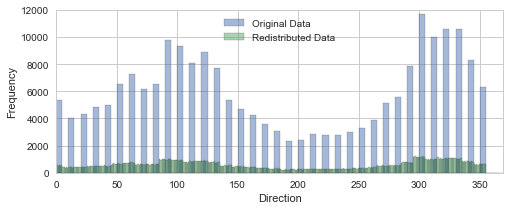

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


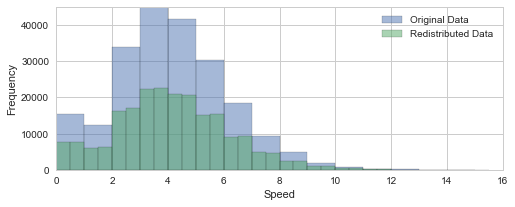

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? False
Report type used: FM-15
Sampling time used: [0, 30]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed  dir_windrose  \
count  3.635200e+04  36352.000000  36352.000000  36352.000000  36352.000000   
mean   2.012661e+07   1149.460827    181.216628      4.545738    206.211653   
std    1.194965e+04    692.188887    113.942791      1.959806    230.381866   
min    2.011010e+07      0.000000     -4.998856      0.001584      0.000000   
25%    2.012012e+07    500.000000     82.649318      3.175702     70.000000   
50%    2.013013e+07   1100.000000    158.731315      4.397547    140.000000   
75%    2.014021e+07   1700.000000    300.804551      5.764333    280.000000   
max    2.015030e+07   2300.000000    354.985605     15.332590    999.000000   

                  x             y  
count  36352.000000  36352.000000  
mean       1.004473      0.486174  
std        3.037031      3.746494  
min      -12.233276    -11.686966  
25%       -0.993980     -2.369535  
50%        1.368626      0.280117  
75%        3.293004      3.443985  
max       15.164576     13.787213

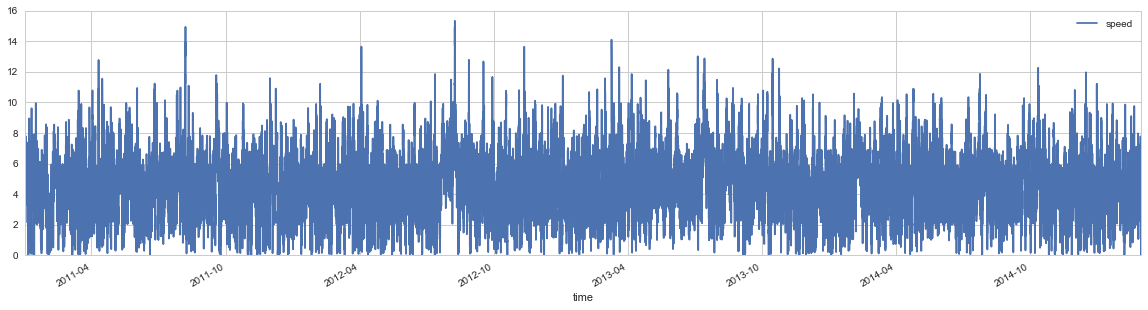

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

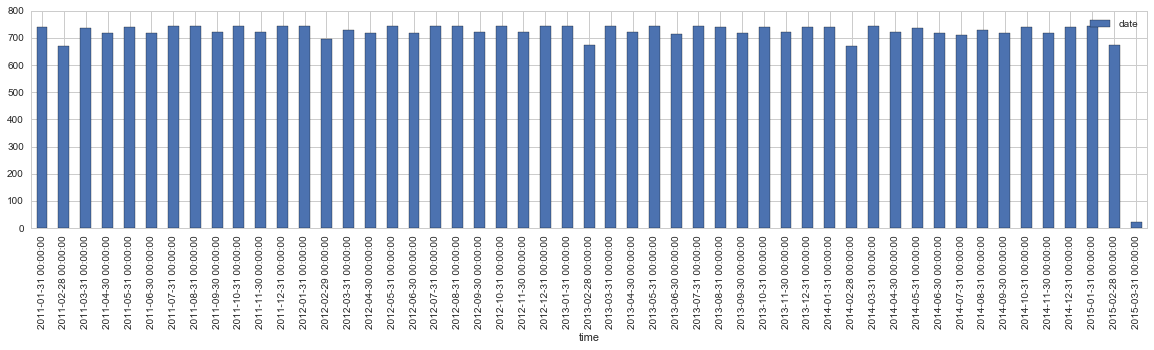

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


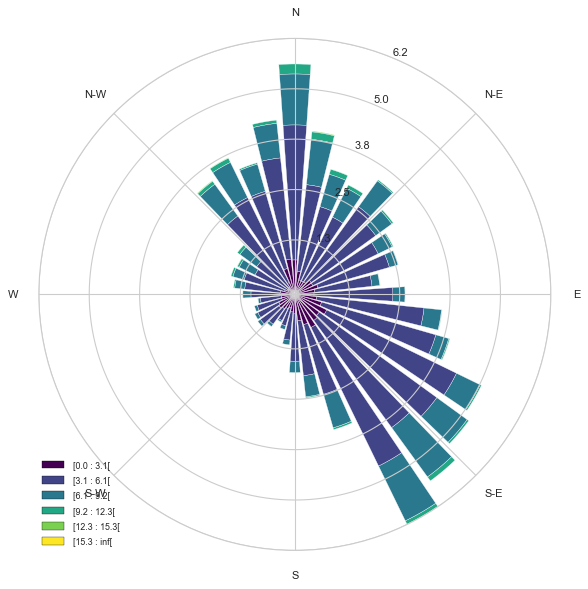

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtcVHX+x/HXMDiKzICI9wsIqGmaouBdUPG2aWmIBEoq
wpa1Zb+ym7prkhZqZpamlpupi7leMDXMW14xr4iy6nrJ1ExFAUGUGUCEOb8/jFkRGARm5gzD9/l4
8Hgw55zvzJsz8OGcOd/z/SokSZIQBEEwITu5AwiCYHtEYREEweREYREEweREYREEweREYREEweRE
YREEweTs5Q5QWYmJiXJHEIRqy8fHp8TlVb6wQOk/nKUlJiaKLFaaA0SW0lQ0i7F/6uJUSBAEkxOF
RRAEkxOFRRAEkxOFRRAEkxOFRRAEkxOFRRAEkxOFRRAEkxOFRRCszLhx4zh16hQAeXl5+Pj48O23
3xrWjxkzhnPnzhVrFx8fz9q1a7l+/TovvvjiE7/ea6+9ZnjeS5cuVTL9Q6KwCIKV6dWrF8ePHwce
dkLr3bs3+/fvB+D+/fvcuHGDNm3aFGvn7+9PSEiIRbOWxiZ63gqCubz33nusX7/epM8ZHBxMaGho
qet79uzJ4sWLiYiIYP/+/QQHB/PZZ5+RlZXFf//7X7p27UpCQgLz589HqVTSvHlzZsyYQVxcHJcv
XyY0NJSMjAxeffVV0tPT6du3L6+//jqTJ09myJAh+Pv7Ex8fz9atW5k9e7ZJf7ZCorBYMb1ez507
dyrcVqiann76aS5fvowkSSQkJDBp0iR69OjBoUOHuHDhAr1792batGmsXr0aV1dXvvjiCzZu3Ii9
/f/+nLOzs5k7dy61a9cmLCyM/v37W/RnEIXFit25c4eVPx7HUe1UrnY67T06uom31hTmzp3L3Llz
Tf68Ru+zsbOjTZs2xMfHU79+fVQqFf7+/uzbt4/z588TFhbGtGnTeOuttwDIzc2lZ8+euLu7G56j
TZs2aDQaAJ555hmuXLlS5DXMPdS1+O2zco5qJzROLhVomW3yLILl9OrVi2+++YahQ4cCD2+0Xbx4
MQAuLi40atSIxYsXo9Fo2L17N7Vr1+bmzZuG9pcuXUKn01GzZk1OnTpFSEgIhw8fJi0tDYCzZ8+a
Nb/ZCoterycqKooLFy6gUqn4+OOPi1TULVu2sHLlSpRKJa1btyYqKgrAaJuqqqKnNBkZGYg5FKqn
nj178o9//INPP/0UAJVKhUajoW3bttjZ2fH3v/+dV155BUmScHR05NNPPy1SWJydnXn77bfJyMhg
yJAhtGzZkuDgYKZOnUpcXBwtWrQwa36zFZZdu3aRl5fH2rVrSUpKYvbs2SxZsgR4eOj2xRdfEBcX
h4ODA5MmTWLv3r0UFBSU2qYqq+gpTeqt62icXXFyrsgRi1CVNW3alAsXLhRZVnjEAtC7d2969+5d
ZP2IESMM3//444/FnvOZZ54hLi6u2PLCv7GYmJhKZX6U2QpLYmIifn5+AHh7e3PmzBnDOpVKxZo1
a3BwcAAgPz+fmjVrcuDAgVLbVHUVOaXRZt01UxpBMC+zFRatVotarTY8ViqV5OfnY29vj52dHfXq
1QMeVsns7Gx69erFtm3bSm1jjDWNIldSlszMTG7dukeWNqdcz5WWmopSqSK/oHwZdNq7tKzrZDX7
xVpygMhSGlNnMVthUavV6HQ6w2O9Xl+kQOj1eubOncuVK1dYuHAhCoWizDalsfaRuNLT0/kt49dy
H7EopDyU9ioaNGxSrnZZ9xyAbKvYL7YwUpo52EIWWUaQ69y5M/Hx8QAkJSXRunXrIus//PBD7t+/
z+LFiw2nRGW1EQShajDbEcvAgQM5ePAgoaGhSJJEdHQ0cXFxZGdn0759e2JjY/H19WXcuHEAjB07
tsQ2giBUPWYrLHZ2dsyYMaPIMi8vL8P358+fL7Hd422qs9wcHXl5d8p9KiSYTmV6P5fGxcX2r/KJ
DnJWKluXxYJP3ib15jXaPtOFfs8G06X3IFSqmnJHq1Yq2lWgNDrtPcYN8y1zu6NHj/LWW2/RsmVL
JEkiPz+fsWPHMmTIkBK3T05O5vz58wQEBJgkZ2WJwmKF9Ho9Sz79gNSb16jfsCnnTidw7nQC6iWf
0Lv/MPr9JZhmLVrJHbPaqHjv58rp3r078+fPB0Cn0zFmzBg8PDxo27ZtsW2PHDnC5cuXRWERSvfD
94s4cXQvrZ7uxIR356BAz77tscT/vIntm2LYvimGVm296fdsMN38/0KtWrXljiyYmaOjIyEhIWzd
upVVq1Zx69YtUlNTCQgI4M0332Tp0qXk5ubSqVMnNBoNX331FZIkodPpmDdvHh4eHhbNK8ZjsTIJ
B39m4/eLqd+oGS9NmIxSqaRRE3dCI95hQcwe3vrHl3Tw9eO38/9h6ed/543RfVj+1Uf8/pt57/0Q
5Ofq6srZs2fx9vZm2bJlxMbGsmbNGpRKJa+88grPPfcc/fv35+LFi8ydO5eYmBgGDRrE9u3bLZ5V
HLFYkeu/X+TrzyZTs6YDkz78iho1i36eYm9fgy69B9Gl9yDSUm6wf8cG9u38gV1b1rBryxpatfVm
0vRFKOwUMv0EgjklJyfTqVMnTp8+zZEjR1Cr1eTl5RXbrmHDhnzyySfUrl2blJQUOnfubPGs4ojF
Suiy7vL5jDfIzclmwjvRuHk+ZXT7+g2bMnLsm3y5chfvfLSYZzr34uK5JGJjFlgosWBJWq2W9evX
o9Fo0Gg0zJs3j4iICHJzc5EkCTs7O8MYPNOmTSM6OprZs2fToEEDsw+RUBJxxGIF9AUFfDXnPVKS
/2BYyCt08//LE7dVKu3p3K0fHXx6M+W1F9i7LZZe/YfRsm5DMyauXnTae7I815EjRxgzZgx2dnYU
FBQwceJEPDw8eOedd0hKSkKlUuHu7k5qaiqtW7dmyZIltGvXjmHDhhEWFoaDgwP16tUjNTXVZPmf
lCgsVmDdyi85dfwAHbv4ETz2zQo9h719DUZFvsu8qL+xcdVi/D/9yMQpqycXF5cnujxc3uf8/fff
jW7TrVs3Dh8+XOK6ku5cbtiwITt27AAwjOEiJ1FYZHYkfhtx6/5Jo6buvP7BZ9gplRV+rk7d+tK2
Q1dOnzhIUlKSxYcjtEV2dna4urrKHaPKEZ+xyOjq5fMsnfd3ajnU5u0Pv6p0JyyFQkHYy+8D8M03
34hxbwXZiMIik6x7d5j/0Rvcv5/Da+/NoZl7S5M8r0erdnTtPYiLFy+yevVqkzynIJSXKCwyKCjI
Z2H0JNJSbjAi7HV8ew4w6fMPHzWBGjVqMHXqVHJyyjcGjCCYgigsMvj3snn8N+kInbsHEBj2N5M/
v2v9xowYMYJr167x5Zdfmvz5BaEsorBY2C+7f2TbDyto0tyT196bg52ded6CUaNG4erqSnR0tGFk
dkGwFFFYLEiXdZfvFkThUFvNpOlfUdtRXXajClKr1URFRZGVlcVHH4lLz4JlicJiQQf3buH+/RyG
j5pA42bmvylswoQJtGrViq+//rrYiO+CYE6isFjQvh0bUCrt8es/3Kyvo9fruXv3Lvfu3WPatGkU
FBQwadIk0tPTy/wSl6gFUxAd5Czkj8sXuHrpHL49+1Onbn2zvla2LosD1zJIK/gVqaYXLdt0ZOvW
rcz6ai2tnu5UarvCQYhEhzChssQRi4Uc3PNwoqg+g4Ms8noOtdVonFxwcq7LmFenALBx9dc4qp3R
OLmU+GWqUdIEQRQWC8jJyeHYLzupU7c+HX39LP76Ldt0pEefIVz+9TRH9m+z+OsL1Y8oLBawZcsW
crK1+A8MRKmU5+zzxfFvY1+jBmuXf05e3n1ZMgjVhygsFvD9998D0GfwiDK2NJ8GjZoxeNgYbqcm
s3PzKtlyCNW

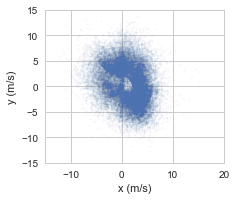

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM8AAAB6CAYAAAAYhgeZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEVZJREFUeJzt3XlQU2fbBvArYam8BAVF0WlFRUopKosL6CDwqUOpZVRQ
q4hgR9RaZjoVHVtQC4Kgoq12HAdwQSqidSmCddzGyqi841oQqywuwVfs18omW8JO8nx/+HFeI5jl
EIiJ92+GGXNyn5z7IV7m5MkTj4AxxkAI0ZhQ1w0Qoq8oPITwROEhhCcKDyE8UXgI4YnCQwhPBhWe
9vZ2bNq0CR4eHvDw8MD27dshk8m0Vg8AUqkUs2bNQl1d3RtrYmJi8NFHHyn8bNq06Y31jx8/xuLF
i+Hi4gJ/f3/k5uaqHqwKy5Yt69LDgQMH3lifl5eHwMBAODs7Y968ebh//z5338WLF7Fu3TrevTx6
9Ahjx47FrVu3uG2v99b503mcjo4O/Pjjj5g6dSpcXV2xfPlyPHnyhHcPvYIZkMTERObr68sKCgrY
tWvXmKenJ0tKStJaPWOMxcfHsz179iitCQoKYsnJyayyspL7kUgk3dY2Nzczb29vFh0dzcRiMUtK
SmLjxo1jT58+VT1gJby8vFh2drZCD01NTd3WlpeXMzc3N7Zr1y4mFotZbGws8/DwYPX19VzNvHnz
2K1btzTuo6Ojg82dO5c5ODiwmzdvcttf7auyspKdPHmSjRkzht2/f58xxthPP/3EfHx82I0bN9iT
J0/Y6tWr2fTp01l7e7vGPfQWgwlPS0sLc3FxYZcuXeK2ZWVlsSlTpjCZTNbjesZePuGurq6srq5O
aS/u7u7s6tWravWdnZ3NpkyZwtra2rhtISEhLDExUa39uyORSJiDgwMTi8Vq1e/evZsFBARwt+Vy
OZsxYwbLyMhQ6DMkJETjXlJSUtjixYu7hOdVjY2NzMvLi6WkpHDbduzYwS5evMjdLikpYQ4ODuzZ
s2ca99BbDOa0raSkBM3NzXB3d+e2TZw4ES9evMCzZ896XA8Ax48fh5ubGwYMGPDGPqqqqlBXV4dR
o0ap1fedO3fg5uYGExMTbtukSZNQUFCg1v7dEYvFMDY2hq2trVr1BQUFmDRpEndbIBBgwoQJCj1M
mzYNBQUFePjwodp9PH78GOnp6YiLi1Na9/PPP8PExARhYWHctjVr1sDX1xcAUF9fj0OHDmHkyJEY
NmyY2sfvbQYTnoqKCpiZmcHCwoLbNnjwYABAeXl5j+sB4MqVK/Dy8lLah1gshkAgwP79++Hj44PP
PvsMaWlpkMvl3dZXVlZiyJAhCtusra1RUVGh9DiqehCJRIiKisLUqVMxZ84cZGdnv7FenR4GDBiA
cePG4erVq2r1IJPJEBUVhVWrVmHo0KFvrGtpaUF6ejpWrlwJU1PTLvenpqbC3d0dZ86cQVxcHIyN
jdU6fl8wmPA0NzfjvffeU9jW+WS0tbX1uF4mk6G4uBj29vZK+3jy5AmEQiFsbW2xb98+hIWFISkp
CampqRr13V0P6iotLUVLSwumTJmC1NRUBAQEIDo6GmfPnu1RD/b29igsLFSrh9TUVIhEIixcuFBp
3ZkzZyAUCjFnzpxu7/fz80NWVhYCAwMRHh6O0tJStY7fF96eGPdQv379ujzZnbfNzMx6XF9XVweZ
TAYrKytu2/Lly5Gfn8/dPnv2LIKDg+Hv7w9LS0sAL2eV6uvrcfDgQXz55Zdq99GvX79ux+nv749/
/vmHu93d6d3atWvx1VdfcaeXjo6O+Ouvv5CRkQF/f3/ePVhaWqo14yUWi5GWlobMzEwIBAKltefO
ncPMmTO7hLfT8OHDAQCxsbHIz89HZmYmIiMjVfbQFwwmPEOHDkVTUxOkUilEIhGAl+8/AMDGxqbH
9Z1/CV49/dq8eTNaWlq420OGDIFAIOCC08ne3h7V1dWQyWQwMjJSuM/GxoY7bqeqqqpuewCAffv2
oaOjo9v7OhkZGXV5XzZ69GhcuXKl23p1e5DJZBAKVZ+sXLhwARKJBLNnz1bYvmLFCgQEBHDT9k1N
Tbh9+zZWrFihUCeXy3H58mWMHTuW60EgEGD06NGora1Vefy+YjCnbY6OjjAzM1N4JcjLy4O1tXW3
b5w1rbeysoKxsbHCk2djY4MRI0ZwP8bGxti8eTOWLl2qsG9hYSFGjhzZJTgA4ObmhoKCAoVA5OXl
wc3Nrdtxvv/++wrH7M7XX3+NDRs2KGwrKiqCnZ1dt/Vubm7Iy8vjbjPGuImMV9XW1nLvC5UJCQnB
+fPncerUKZw6dQpHjx4FACQkJGDVqlVcXXFxMRhjGD9+vML+QqEQmzZtQlZWFrdNJpOhpKRE5Wlz
n9L1dJ82xcfHs+nTp7O8vDx2/fp15unpqfCZTG1tLautrVW7/nXz589ne/fuVdrDzZs3maOjI9u7
dy8rKytj2dnZzNXVlf3222+MsZefe1RWVrLm5mbGGGNSqZR5enqyqKgoJhaLWXJyMnN2du7RlGx2
djZzcnJimZmZrKysjB08eJCNGTOG/fHHH4wxxlpbW1llZSVrbW1ljDH2/Plz5uLiwnbs2MHEYjGL
i4tjkydPZg0NDQqPGxgYyNLS0hhjLz+fqqysZB0dHSr7kUql3U5VHz58mH3yySfd7rN//342fvx4
9vvvvzOxWMyioqKYp6dnl550ScCY7r4M9+q/+trQ1taG9PR03Lx5EyYmJvD29kZQUBB3qhEfHw8A
iI6OVqv+dVlZWXj8+LHKc+7bt28jKysLz58/h5WVFWbNmoUZM2YAeHk6tGrVKqxcuRI+Pj4AgKdP
nyItLQ1lZWWwsbFBSEgInJ2de/S7uHTpEs6fP4/q6mrY2Njg888/56aji4uLkZCQgO+//x5OTk4A
Xr46Hjp0CBUVFbC1tcXSpUsVXqmampqwcuVKbN++HcOGDcPVq1exd+9e7Nq1S+WrUUtLC8LCwhSO
BwC//vor7t+/3+3qC7lcjjNnziAnJwd1dXVwcHDAF198gQ8++KBHvxdNTJgwQXmBLpObl5eny8Nr
rLy8nLm4uLCqqiqVtfo2NlWOHTvGlixZojCuFStWqPW70Bevjk2d589g3vP0BRsbGwQGBuL48eO6
bqVPMcZw9OhRhIeHc9vu3LkDoVAIa2trHXamWxQeDa1Zswbnzp1TujDU0Fy4cAEODg6YPHkyt83Z
2RkpKSk67Er3DGaquq9YWFi88cNGQzVz5kzMnDlTYdvb9Em/rtArDyE8UXgI4YnCQwhPFB5CeKLw
EMKTWuF58eIFfHx8UFpairKyMixatAjBwcHYuHEjt1DyxIkTmDt3LhYsWIDLly/3atOEvA1Uhqe9
vR0xMTHc8vStW7ciIiICv/zyCxhjyMnJQVVVFTIyMnDs2DEcOHAAO3fu7NH3UQjRByrDs23bNgQF
BXHfNCwqKuK+uuzt7Y3r16/j3r17cHNzg6mpKSwsLGBra4sHDx70bueE6JjST7qysrIwcOBAeHl5
Yd++fQBeLtXo/G6Lubk5JBIJpFKpwteZzc3NIZVK1WpA24tD3yaGOjZDHReg2diUhufkyZMQCAS4
ceMGSkpKEBkZiZqaGu7+xsZG9O/fHyKRCI2NjQrbXw2TMipXruqp/Px8gxyboY4LUBybOiFSetp2
5MgRHD58GBkZGfj444+xbds2eHt7c/95XW5uLiZOnAhnZ2fk5+ejtbUVEokEpaWlcHBw0MJwCHl7
abxAKTIyEtHR0di5cyfs7Ozg5+cHIyMjhIaGIjg4GIwxrF69+o3fSSfEUKgdnoyMDO7Phw8f7nL/
ggULsGDBAu10RYgeoA9JCeGJwkMITxQeQnii8BDCE4WHEJ4oPITwROEhhCcKDyE8UXgI4YnCQwhP
FB5CeKLwEMI

Wall time: 5.82 s


## 2.3 Overview by Month

In [41]:
%%time
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title='Month: %s'%(month))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4W+X59z/aw5IlS5a8tx07E7IhmwBJILRAgDJaoIxf
J9DS0gJvRwoUCoUCLXRAoUApe29CyA7ZBLKcxHvKW8Pa+/1DkWLFI3YiO07r73XpuuxznvOcI53z
Pfe+H0E4HA4zhjGM4bSA8FRfwBjGMIbBY4ywYxjDaYQxwo5hDKcRxgg7hjGcRhgj7BjGcBphjLBj
GMNphDHC/g9gLHL334Mxwo4AFi9eTGlpKQ8++GCf+5ubmyktLaW0tBSz2ZzQc3/++eesXLky9v8T
TzzB1KlTE3oOh8PBOeecw6effprQecfQG2OEHSEIBAJWr17d575Vq1YN23lfeOEF2trahm1+h8PB
j370I0wm07CdYwxHMUbYEcLUqVNpamqivLy8175PP/2U0tLSU3BVJ4cdO3ZwxRVXcOjQoVN9Kf8z
GCPsCGH8+PHk5OT0kqYmk4l9+/axbNmyXsesXr2ayy67jDPPPJOFCxfy+OOPEwgEYvsXL17MP//5
T1auXMmsWbOYNm0ad955Jw6HA4Brr72WHTt2sH79ekpLS2lqaood+/HHH7N06VImT57MihUr2L17
d2xfU1MTpaWlPPHEEwN+px//+MeMGzeOZ5555oR+kzEMHWOEHUEsWbKkl1q8atUqzjjjDNLT0+O2
v/baa9xyyy1MmTKFJ598ku985zv861//4q677oob99RTT9Hd3c2jjz7KT3/6Uz766CP+/ve/A7By
5UomTJjAtGnTeO211zAajQC43W4ee+wxbrvtNv785z/jdru59dZbYy8Do9HIa6+9xhVXXDHg93np
pZf485//jE6nO6nfZQyDh/hUX8D/EpYtW8azzz5LdXU1RUVFQEQdvuCCC+LGBYNBHn/8cZYvXx5z
GM2bNw+1Ws3KlSu5+eabKSsrAyA9PZ1HH30UgUDAvHnz2LBhA8888wyzZs1i4cKFqFQqlEolP/vZ
z/j3v/8NRLzGDz/8MGeeeSYAgUCAW2+9laqqKsrKypBKpbF9A2HcuHEJ+23GMDiMSdgRxOTJk8nI
yOCzzz4DoKWlhb1797J06dK4cTU1NZjN5l5q8vLlywHYtWtX3JwCgSD2v8FgACLS1W6393kdIpGI
KVOmxP7PysoC6Hf8GEYPxgg7ghAIBHFq8apVq5gyZQoZGRlx42w2GwB6vT5uu1qtRiqVxmxUAIVC
0escIpGIefPm8Yc//KHP65DJZAiFR2999O9QKHSC32wMI4Uxwo4wlixZwoEDB2hqamLVqlW91GEA
rVYLQFdXV9z27u5ufD5fbP9AuOuuu9i6dStWqzUxFz6GUYExwo4wpk2bhsFg4NVXX2XPnj291GGA
goICUlJSeiUifPzxx7E5jgeVSsV9991HXV1dnGd5DKc3xpxOIwyhUMj555/P888/H7Npj4VIJOKW
W27hvvvuQ6PRcO6553L48GGeeOIJli1bNmhnz7x58zAYDHz11VcoFAq8Xu+gjvP5fJSXl5Oent7L
ez2GU4sxCXsKsGTJEvx+f5+x1yi+853vcP/997N9+3Z+8IMf8NJLL3HDDTfwyCOPDOlc9957L263
m87OTqqqqgZ1THt7O1deeSVvvPHGkM41huGHYKyn038XmpqauO6661i7dm1s2+bNm7nppptYs2YN
2dnZp/DqxnCyGCPsGMZwGmFMJR7DGE4jjBF2DGM4jTBG2DGM4TTCWFjnvwChUIhgMBjrLBEOh2N/
CwSCuI9IJIpLZTwVeO+993j66acBWLBgAXfeeWdsX1tbG9/73vdi/zudTtra2ti+fTtKpXLEr3W0
YczpNIoRDofx+/34fD78fn/s4/V6j24L+AmHhnYLRSIhEokUiUSCVCpFKo38Hf3IZDLE4uF5l7vd
bhYuXMgnn3yCRqPh6quv5vbbb2fOnDm9xobDYW6++WaWLFnClVdeOSzXc7phTMKOEoTDYXw+Hy6X
C6fTidPpxOVyEQqFEAqFsY9YLEYsFqNQKNBoNBxy7eBL++eIxAIkYikyoQyRSIpYIGOi5Xz2aT7B
G3TiDXrxBXwIQyIW665GKzLi8/li5wwEAoRCIUKhEOFwGIlEglKpjFX7KJXKhJA4GAwSCoXweDyo
VCqCwSAymazPsR988AGBQGCMrD0wRthThEAggN1u70VOsViMRCJBoVCg1+vRaDRIJJJ+5zloKsNp
lWF1u7H5PLgCftxBP2Jgoh4+rc1GJBKRJJGikSpIlsoQJGWSpc/qc75wOIzb7cZms+F0Ouns7MTv
9xMKheJInJSUhEqlGrJ6rVKp+MlPfsIFF1yAQqFg5syZfaZahkIh/vrXvw45UeS/HWOEHUF4vV6s
VisWiwWn04lIJIqRwGAwoNFoEIlEQ5qzwWHj31Vf9tquEIhAD/strbjDwbh9F2RP6Hc+gUAQk6g9
4fP5sFgsdHd309HRgclkQiAQoNFo0Gq1g772Q4cO8dZbb7Fu3TrUajV33HEHzz77LDfffHPcuC1b
tmA0Gpk8efJx5/xfwhhhhxHhcBiXy4XFYsFqteL1epFIJKhUKrKyslCr1Sd9jiSxdMjHKMX9S+z+
IJVKSUtLIy0tDYhIQLPZTFdXFw0NDQSDQZKSktDpdGg0mn7V3M2bN3P22WfHSgdXrFjByy+/3Iuw
n3/+ORdddNGQr/O/HWOETTDC4XBMlbRarYRCIWQyGVqtlrS0tAHV2xOB8gQIeyIkPxZCoZDU1FRS
U1OBiDe3vb2d1tZWGhsbkclkpKSkYDAYkEqPnq+srIyHHnqIW265BaVSydq1a5k4cWKv+b/88kuu
v/76k77O/zaMETZBCAaDWCwW2tra8Hq9yGQy0tPTMRqNccXiicZQCSsVilAkgLDHIikpiYKCAiCi
+re1tdHV1UVraysajQaj0YharWbevHmUl5ezYsUKpFIpkyZN4nvf+x6/+tWvWLx4Meeeey4AjY2N
ZGZmJvw6T3eMhXVOEh6Ph/b2djo7OxEKhWi1WrKyshIuSfvD9vZ6rln3n17bFQIRLxSdz/XVq+Ns
WKNcxeoLf4BK0rfKmmg4HA6am5txOp2IxWLS0tLQ6/XDFjb6b8fYr3YCCIfDWK1W2tracDqdyOVy
8vLy0Ol0I56UMFT1VitTnJAafaJQqVSUlpYSDAZpaWmhtbWV5uZmdDodRqNxLBliiBgj7BAQDocx
m800NzcTDAZRqVRMnDgRuVx+yq5J0cOBpJXK0UgVyERikoSRW1uUnIrZHwn5OAM+spTJCE9BppNI
JCI7O5vs7GwsFgsmk4mDBw+iUqnIzs4mKSlpxK/pdMQYYQeBcDhMd3c3jY2N+P1+UlJSyMnJGXII
ZjigDMu4JWUhbq8fl9eHw+rD6w9EksT1UNBppFgkQiWToVSJOVN36u3ClJQUUlJScLvd1NfXc+jQ
oZgpcSpffqcDxgh7HDgcDhobG3G73Wi1WvLy8kYFUaNQSsS8tWM/Fqc7brtcLOLGyblsOlyHJ3DU
hpWKxSydNDr6CSsUCsrKynC73dTW1nLgwAH0ej2ZmZlxnuUxHMUYYfuB2+2mqakJu92OWq1m8uTJ
I+ZIGgqUMikahbwXYfsdLx1930GhUDBhwgQcDgd1dXXs378fo9FIenr6mHPqGIz9GscgEAjQ2NiI
2WxGqVQyfvz4Xr1/RxMkIhFpySrqOi2DGj8aCRuFSqVi0qRJmM1mmpqa6OjoICMjg7S0tFNeYTRa
MEbYHrBYLNTX1yMUCikpKSE5OflUX9KgkKEdfMaU8jRQNXU6HTqdDpPJREtLC2azmcLCwjH7ljHC
AhGpWl9fj81

Wall time: 17.9 s


In [42]:
df.describe()

date          HrMn           dir         speed  dir_windrose  \
count  3.635200e+04  36352.000000  36352.000000  36352.000000  36352.000000   
mean   2.012661e+07   1149.460827    181.216628      4.545738    206.211653   
std    1.194965e+04    692.188887    113.942791      1.959806    230.381866   
min    2.011010e+07      0.000000     -4.998856      0.001584      0.000000   
25%    2.012012e+07    500.000000     82.649318      3.175702     70.000000   
50%    2.013013e+07   1100.000000    158.731315      4.397547    140.000000   
75%    2.014021e+07   1700.000000    300.804551      5.764333    280.000000   
max    2.015030e+07   2300.000000    354.985605     15.332590    999.000000   

                  x             y  
count  36352.000000  36352.000000  
mean       1.004473      0.486174  
std        3.037031      3.746494  
min      -12.233276    -11.686966  
25%       -0.993980     -2.369535  
50%        1.368626      0.280117  
75%        3.293004      3.443985  
max       15.164576     13.787213

# 3. Create input data and configuration

In [43]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [44]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


In [45]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [46]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [47]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

0.6
Wall time: 0 ns


In [48]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.6 289
[  2.65944997e-07   4.59101114e-07   3.74956674e-06   1.96597950e-05
   3.46558171e-05]


In [49]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUbHV5Jvzsul+6q+/X6nsfICCKHBDyRQkrGAYlmokf
EdTEBMNMEsdoVAwXASHAiaARZya6yBKX4gBLIGQZZfDz+4ygTJIRPR5xEi6unK4+3V3VXV1VXdXV
da/al++P5t29a9e+1+7uqmY/a/WCPrX3r367a++n3uvzMoIgCHDgwIGDIwrXYW/AgQMHDvYTDsk5
cODgSMMhOQcOHBxpOCTnwIGDIw2H5Bw4cHCk4ZCcAwcOjjQcknPgwMGRhkNyDhw4ONJwSM6BAwdH
Gg7JOXDg4EjDITkHDhwcaTgk58CBgyMNh+QcOHBwpOGQnAMHDo40HJJz4MDBkYZDcg4cODjScEjO
gQMHRxoOyTlw4OBIwyE5Bw4cHGk4JOfAgYMjDYfkHDhwcKThkJwDBw6ONBySc+DAwZGGQ3IOHDg4
0nBIzoEDB0cansPegIPDhyAIqNfrYFkWbrcbXq8XLpcLDMMc9tYcOGgbjCAIwmFvwsHhoVarIZ/P
o7e3F41GAwCwvr6OgYEB9Pb2wuVyOaTnoKvhWHKvY3Ach0qlgnQ6jXA4DJZl4fV6IQgCBEEAx3Fg
WRb1eh0Mw8Dtdjuk56Dr4JDc6xCCIIBlWXAcB4ZhwHEclpaWwHEcPB4PeJ5HuVyG3++Hx7N3ixDp
1Wo1uFwuuN1uuN1ueDweh/QcdCwcd/V1Bp7n0Wg0QB/7xsYGstksZmZm4PP5UK/XkUwmwTAMGo0G
PB4PQqEQgsEgQqEQ3G5303q0DsMwItl5PJ6W4xw4OCw4ltzrBOR+chwHAGBZFvF4HDzPw+v1ore3
F/V6HYFAAF6vF319fQiHw6jVaiiXy8jn89jc3BRJj4hPSmYsy0IQBNRqNaRSKYyNjcHn8zmk5+BQ
4ZDc6wA8z4NlWfA8D4ZhUCgUkEgkMDg4iEgkgtXV1abjGYaBIAhgGAaBQACBQACDg4MQBAHVahWV
SgXb29tIJpPwer0i4UlJr1QqoV6vi6RH7q1j6Tk4aDgkd8RBcTRKJiSTSezs7GB6elq01IxGLBiG
EclMSnrlchnb29vY2NiAz+dDKBSCIAgiqQJ7cUCH9BwcNBySO6LgeR4cx4HneQBAvV7H2toafD4f
FhcXxYRCO8kCKenRe5Klx/M81tbW4Pf7xXheMBiEy7Vbf+6QnoODgkNyRxA8zyOTySCfz2NmZga5
XA7JZBKjo6MYHBxsITa5JUfuqlm4XC4xXrezs4OJiQkxU5vNZlGtVuH3+5vcWy3SKxaLiEQi8Pv9
Duk5sAyH5I4YyD0FdokjHo+jUqlgfn4egUCg5fj9LPtwuVwIBAIIhUIAdsm3UqmgUqlga2sLtVoN
gUBAtPQCgUAT6aVSKXg8HrAs61h6DizDIbkjAnntW6PRQLFYRH9/PxYXF0XyUDsX2F/CA3ZJLxwO
IxwOA9gjvXK5jEwmI5IeWXqU/CDLUs299fl8To2eA1U4JHcEIK99y2QySKVS8Pl8iEajmucqkYNV
d9Us5KRHHRjUhcGyLJLJJMLhsGjp6SUyqPfWIT0HBIfkuhxkvQG7JJFIJMCyLMbHx7Gzs2NojU6p
B3e73ejp6UFPTw8AIBaLIRKJoF6vI5VKodFoNFl6SqTXaDRQrVZF0mMYBl6v13FvX8dwSK5LIXdP
i8Ui4vE4+vv7MTMzg1KpZIi81CweO4iv3TUYhkEoFEJ/fz+APUuvXC5jc3MTLMuKpBcKheD3+1tI
b2NjQ1zDsfRen3BIrgshrX0DgM3NTeRyOUSjUfT29orHWSUZOwhgP0hEbumxLCuSXjKZBMuyTeUq
fr9f3IuapeeQ3tGHQ3JdBEEQsLW1Ba/Xi0AggEajgXg8DoZhsLi4CK/XKx5r9KE9qPjbfsDj8aC3
t1ckdinpbW9vg+M4MeHi9/ubEhRS0qOYHhGfQ3pHCw7JdQmoNSuXy4lxqkQigeHhYQwPD7c8lO2S
VzcSnxLpra+vi//lOK5JbEBKejzPiwkcKel5PB54PB6H9LoYDsl1ATiOEwUtASCXy6Fer2N2dlas
QbMKIsNSqYR8Pi92LxwFEEER8TUajSZLj+d5kfBCoVCTBSclvUajgUKhgLGxMYf0uhAOyXUw5MmF
arWKYrEIv9+PY8eOaWYMjVpydEw8HkckEsH29jbK5TI8Hg84jmvpTOhmeL1eeL1eRCIRAECj0UC5
XEalUkE2m4UgCE2WHpEey7Iol8uie8swjGPpdREckutQSJVDACCbzWJzcxOBQAB9fX26JRFGSK7R
aGBtbQ0AsLCwIP57KpUS31famUAWj7R0o5tBklJ9fX0QBKHJ0stmswCAYDAoColScTLQbOk5pNfZ
cEiuAyGtfeN5Huvr66hWq5ifnxcfvnYhlVsql8vwer2iS8wwDHw+HwYHB8U90MMvr1eTl27YCbvK
WIzsja7Z5/M1kV65XEahUECtVsPy8rKipQc4pNfJcEiugyB3T8vlMtbW1tDb2yu2Zhl1Q9WOEwQB
m5ub2N7extTUFHp6epBOpzXXVOpMIDdPXrpBAX16r3ZxWOQgJT2v14tsNouxsTGUy2WUSiVkMhm4
XK6mkhU10gN2y1/oy2G/vhQcKMMhuQ6BvPYtnU4jk8lgcnISfX19ltaUkwy5py6XC8eOHWua3yCF
HpG63e6WLGa5XG4K6AuCgGKxKA6+6eaHWhAEsUfW5/Ohv79fHONYLpdRLBaRSqXgdrubyF5qwfE8
j1QqhXA4jN7e3qahQNSZ4WB/4JDcIYMymxsbG5iZmQHHcaIs+eLiomgVEcxYclKQezo0NNRSctJu
uYnH40EkEmkK6K+traFarSKfz4udC1KL56Bg1F01C4Zh4Pf74ff7MTAw0ER6hUJBJD3pdUsFB5Qs
PRoK5JCevXBI7hBByQWagEVENDAwgNHR0baa5+k4ck/z+byoBrzfIOtkeHgYfr9fjG1JLR7pw69m
UXYKjBClEunVajVUKhXs7Oxgc3NTVEsG9hIacve2Xq8DQMtQIIf0rKOz764jDKl7StJIiURCjJOp
wYzVxfM8YrEY3G53kxqw2pry/9oBaWxL7ubRw681HKcTYOVvIZ2PQaS3uroKj8fTMhRIOgmNyIyG
Dsln3jqkZx4OyR0wlHTf4vE4BEHQjJPJ19BDsVgEz/OIRCKKHRGHBSWLRzocRzongqybdmCXu9ru
GpRxjUQi4gwMuu58Po9kMgmfz9eUyFAjvY2NDUxMTDRNQuuUz7cT4ZDcAUI+NSufz2N9fR2Dg4Pi
jFM96N3MPM+L7inDMBgZGTG0t8Nq45IPx6E5EeVyGTzPY3V1VVU9+KCwH3E9M0OBpJPQGIZBpVIR
u2AcS08fDskdEKS1b4IgYH19HaVSCXNzc2KJghFouZI0rMbj8WBhYQGnT582vKb893YtKMAaccrn
RESjUTF7m06nUa/Xm6ydbipM1iJLraFAuVwOGxsb4lAgyl7TeYDj3mrBIbl9hlJr1traGoLBIBYX
F+F2u8FxnKmxgErHklU4MjKCoaEhMelgZp+d+CCoqQdLNeXkNXrS6zjIgmI715GS/dDQUJOFKwgC
zpw5ozgUSEp6LMs6pAeH5PYV8sb6ra0tpFIpjI+PY2BgQPx3M4F++bE8zyOZTKJQKLQ07JtZ027Y
RQpyaGnKKTXddxJ5t7MXKells1ksLCygVquhXC7rDgUClEmvVquhp6fnyHdkOCS3DxAEARzH4aWX
XsKxY8cAAOvr66jX61hYWBDFHAlms5l0bK1WE2ep6jXsG1mTbvRu0piTyyvJm+5ZlsXW1hZ6e3vF
Viyz6DSiBJp

In [50]:
kde_cdf = cdf_from_pdf(kde_result)
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [51]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(50)) 

Wall time: 12.1 s


In [52]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ8AAADXCAYAAAAENdTIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFXNJREFUeJzt3XtUVFX/BvBnuMplAjWoDEUlMUIxBtPKW2je8pKYpo5N
mV1NrQgXKLGALBSW5iWz0Mx0GVharjJaq1aioiVLazILo1iOrEkwMbk5XAIG9u8Pf8778sbNzZlh
Jp7PX8Ccs7/fGTbPzJw5Z6MSQggQEd0gp65ugIgcE8ODiKQwPIhICsODiKQwPIhICsODiKS4dHUD
1Lrx48ejuLi42c88PT1x5513IjY2FuHh4V3UGRGg4nke9mv8+PGYN28eZs+eDQAQQuDSpUvYsGED
8vPzkZ2dDW9v7y7ukrorvm2xc15eXvDz84Ofnx/8/f0RFhaG1NRUVFRU4OTJk13dHnVjDA8H5Obm
BgBwdnZud9tz585Bp9MhPDwc9957L1599VXU1NRYbt+5cyfGjh0LjUaDNWvWYNmyZdiyZQsAYOXK
lXjxxRebjTd+/Hh8+OGHAACz2YyNGzdi/PjxCA0Nxf3334+UlBQ0NjZa9l+xYgXmzp2LESNG4MSJ
E2hoaMD69esxatQoRERE4KmnnsL58+cVeVzIthgeDqasrAwpKSnw8/PD8OHD290+JiYGffr0weef
f45t27YhNzcX27dvBwDs378fW7ZsQVxcHD7++GNcvHgROTk5He5lx44d+Pzzz5Gamoqvv/4asbGx
yMjIwOHDhy3bZGVlYeHChdi9ezfCw8Px1ltv4dixY9i0aRP27duHAQMGQKfTwWQy3fiDQV2K4WHn
UlNTER4ejvDwcAwbNgxjx45FaWkpPvjggw4d7ygqKoKvry/69OmDYcOG4d1338XMmTMBAHv37sX8
+fMxbdo0DBo0CKmpqfDw8Ohwb3fccQfWrl2LESNGICAgALNmzUJQUBAKCgos2wwYMACzZs1CSEgI
VCoVdu3aheTkZNxzzz0ICgpCQkICvL29cfDgwRt/cKhL8dMWO/fcc89h5syZqK+vR2ZmJr755hss
W7YMgwYN6tD+y5cvR1paGg4cOIDRo0dj4sSJmDp1KgDAYDBg8eLFlm29vb0xePDgDvf24IMP4tSp
U1i3bh0KCwtRUFCACxcuYNKkSZZt+vbta/n6jz/+QH19PRYvXgyVSmX5eV1dHd+6OCCGh53r2bMn
AgMDAQBJSUkoKyvDkiVLcPDgQdx2223t7r9o0SJMmTIF2dnZOH78OGJjY3H8+HGsXbsWPXr0QFNT
U7Ptrx9PAdDsD/w6s9ls+frtt9/G7t278cgjj2DSpEmIiYlBTExMs+179Ohh+fr6sZCdO3eid+/e
zbbjp0aOh29bHExSUhKcnZ2RnJzc7rZ1dXVISUlBQ0MDFi5ciPT0dCQmJuLLL78EAAQHB+PMmTOW
7evr6/H7779bvnd1dUV1dbXl++rqapSVlVm+f//99xEXF4eVK1di1qxZCAgIwMWLF9Hap//9+vWD
i4sLysrKEBgYiMDAQPTt2xebN29u1gc5BoaHg+nVqxdiYmJw9OhRHDp0qM1t3d3d8eOPP2L16tUo
KCiAwWDAN998g7CwMADAs88+i3379uGTTz7B+fPn8dprr+Gvv/6y7D906FD88MMPyMnJwfnz55GQ
kAAnp/9MmVtuuQU5OTkwGo04e/YsXnrpJVRWVqK+vr7Ffry8vLBgwQKkpKRY9ktOTsaRI0c6/DaM
7AfDwwHNmTMH4eHhWLNmDWpra9vcdtOmTXBycoJWq8WcOXPg5uaG9evXAwDGjBmDxMREbN26FbNn
z4aHhwdCQkIs+z788MOYPn06oqOjsXDhQoSEhECj0VhuT01NRVFREWbMmIGlS5ciICAAc+bMwdmz
Z1vtJzY2FpMnT0Z8fDxmzpyJgoIC7Nixo9mxEXIMPMOUmpk9ezYiIyOxfPnyrm6F7BwPmDqwsrIy
y0HIlnh6esLLy8uGHVF3wvBwYFqtFoWFha3e/swzz2DFihU27Ii6E75tISIpPGBKRFIYHkQkheFB
RFI6FB5nzpyBTqcDABiNRixYsABarRZJSUn/OL2ZiLqHdsPjvffeQ0JCAurq6gAAa9euxcsvv4zM
zEwIIZCdnW31JonI/rQbHv369bMsDgMAZ8+exYgRIwAAY8eOxYkTJ6zXHRHZrXbDY/LkyXBx+c/p
IEIIy9WWXl5eXMSFqJu64ZPE/vvCqOrqatx0003t7qPX62+0DBEpKCIiQvExbzg87rrrLpw8eRIj
R47EsWPHcO+993ZoP2s031F6vZ717bh+QUEBnks9BO+et3e6VlV5MbatfBDBwcEdrm9t9lDfGm74
o9q4uDhs2bIF8+bNQ0NDAyZPnmyNvojIznXolUdAQAD27dsH4NqalNdXzyai7osniRGRFIYHEUlh
eBCRFIYHEUlheBCRFIYHEUlheBCRFIYHEUlheBCRFIYHEUlheBCRFP7fFpLS2NgIg8HQoW2NRiPU
anWrt7f1v2fIfjE8SIrBYIBuVSY8ffw7tkPWpVZvKi3KR++AkFZvJ/vE8CBpnj7+iqzBUVNZokA3
ZGs85kFEUhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFEUhgeRCSF4UFEUqSubWlo
aMDKlStRXFwMJycnvP766wgKClK6NyKyY1KvPHJycmA2m/HRRx9h6dKl2LRpk9J9EZGdkwqPAQMG
oLGxEU1NTaiqqoKLCy/OJepupP7qPT09UVxcjKlTp6K8vBzp6ent7qPX62VKKYb1la1vNBoVHU9J
eXl5MJlMzX72b3v87YFUeOzatQujR49GTEwM/vzzTzzxxBP44osv4O7u3uo+ERER0k12ll6vZ32F
66vV6jYX+OlKQ4YMQXBwsOX7f+Pjf6P1rUEqPG666Sa4uroCAHx8fGA2m9HY2KhoY0Rk36TCY9Gi
RYiPj4dWq0VDQwOio6Ph6empdG9EZMekwsPLywubN29WuhciciA8SYyIpDA8iEgKw4OIpDA8iEgK
w4OIpDA8iEgKw4OIpDA8iEgKw4OIpDA8iEgKw4OIpHAVH6I2NDY2wmAwdGoMo9F4bQkDAEFBQXB2
dlaitS7H8CBqg8FggG5VJjx9/Ds3UNYl1FRexp612mZrjTgyhgdROzx9/OHd8/aubsPu8JgHEUlh
eBCRFIYHEUlheBCRFIYHEUlheBCRFIYHEUlheBCRFIYHEUlheBCRFIYHEUmRvrZl27ZtOHz4MBoa
GrBgwQLMnTtXyb6IyM5JhcfJkydx+vRp7N27F7W1tdi5c6fSfRGRnZMKj2+//RbBwcFYunQpqqqq
EBsbq3RfRGTnpMKjvLwcFy9eRHp6OoqKirBkyRJ89dVXUKlUre6j1+ulm1QC6ytb32g0KjqekvLy
8mAymZr9TPb+K30/W+rNUUmFh6+vLwYOHAg3NzcMHDgQ7u7uKCsrQ+/evVvdJyIiQrrJztLr9ayv
cH21Wg1kXVJ0TKUMGTKk2YI7nbn/St/P/+3NFqz1xCX1aUtERASOHz8OIQRKSkpQW1sLX19fpXsj
Ijsm9cojMjIS33//PebMmQMhBBITE/816zISUcdIf1TLg6RE3RtPEiMiKQwPIpLC8CAiKQwPIpLC
8CAiKQwPIpLC8CAiKQwPIpLC8CAiKQwPIpIifXo6kT0STU0oLCxs9jOj0Xjt6lgJ/ztWZ7TUW2cF
BQV12XVlDA/6V6k1/YXE7Vfg6WNofoPkZfWlRfnoHRCiQGdt9CappvIy9qzV2vwS/+sYHvSv4+nj
D++etysyVk1liSLjXKdkb12NxzyISArDg4ikMDyISArDg4ikMDyISArDg4ikMDyISArDg4ikMDyI
SArDg4ikMDy

In [53]:
# %%time
year_length = 5
gofs_bivariate = []
df_start_year, df_end_year = df_all_years.index.year[0], df_all_years.index.year[-1]
for start_year in arange(df_start_year, df_end_year-year_length):
    end_year = start_year+year_length-1
    df_previous = df_all_years[str(start_year):str(end_year)]
    speed_previous = array(list(zip(df_previous.x, df_previous.y)))
    kde2 = neighbors.KernelDensity(bandwidth=bandwidth, kernel=KDE_KERNEL).fit(speed_previous)
    kde_result2 = exp(kde2.score_samples(points))
    gofs_bivariate.append(goodness_of_fit_summary(kde_result2, kde_result))
gofs_bivariate=pd.DataFrame(gofs_bivariate)
gofs_bivariate.index = arange(df_start_year, df_end_year-year_length)

In [54]:
gofs_bivariate

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1979  802.085186  0.072152  3.761143e-06    0.118174     0.570986  0.722794
1980    0.539279  0.081185  3.824481e-06    0.119165     0.575773  0.718126
1981  112.728025  0.076514  4.098733e-06    0.123363     0.596060  0.697913
1982  167.553974  0.080018  4.138213e-06    0.123956     0.598924  0.695003
1983  263.223514  0.087966  4.172916e-06    0.124475     0.601430  0.692446
1984  161.172342  0.135298  1.584599e-05    0.242561     1.171993 -0.167889
1985    3.783908  0.121449  1.420186e-05    0.229633     1.109527 -0.046713
1986    0.166531  0.089923  9.005964e-06    0.182863     0.883548  0.336238
1987    0.153836  0.097636  7.957578e-06    0.171891     0.830531  0.413507
1988    0.152328  0.110815  7.038154e-06    0.161656     0.781078  0.481270
1989    0.126984  0.093474  4.714281e-06    0.132303     0.639253  0.652546
1990    0.109780  0.084216  3.551416e-06    0.114832     0.554838  0.738252
1991    0.139116  0.103113  4.387427e-06    0.127634     0.616695  0.676636
1992    0.114950  0.094546  3.956182e-06    0.121199     0.585603  0.708420
1993    0.116579  0.083940  3.752497e-06    0.118038     0.570329  0.723432
1994    0.132093  0.088618  3.993954e-06    0.121776     0.588392  0.705636
1995    0.155100  0.099329  5.152162e-06    0.138311     0.668282  0.620273
1996    0.138222  0.092232  4.969471e-06    0.135837     0.656327  0.633738
1997    0.119654  0.087624  3.846433e-06    0.119506     0.577423  0.716508
1998    0.111374  0.094331  3.604100e-06    0.115680     0.558938  0.734369
1999    0.112910  0.096082  3.419320e-06    0.112676     0.544421  0.747988
2000    0.124339  0.093494  2.911175e-06    0.103967     0.502342  0.785439
2001    0.137330  0.094211  2.941306e-06    0.104504     0.504935  0.783218
2002    8.024373  0.106958  3.625153e-06    0.116018     0.560568  0.732817
2003    0.158958  0.104181  3.504101e-06    0.114064     0.551129  0.741739
2004    0.139002  0.099466  3.409883e-06    0.112520     0.543670  0.748683
2005    0.124149  0.094434  3.064870e-06    0.106676     0.515432  0.774111
2006    0.100283  0.080361  2.475625e-06    0.095875     0.463242  0.817540
2007    0.067844  0.056988  1.529106e-06    0.075350     0.364069  0.887301
2008    0.084628  0.036044  7.970651e-07    0.054401     0.262853  0.941254
2009    0.011070  0.024374  2.631360e-07    0.031257     0.151027  0.980606

In [55]:
gofs_bivariate.plot(y='R_square', figsize=(4,3))
gofs_bivariate.plot(y='K_S', figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQgAAADECAYAAABjq7+EAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlclXX6//EXZ+VwQARUXEHBJXdAc8mvSzSOlVkaKaMT
6qijNb+aSn9+s5psM620mpkamzbTqNHMmsZs2t0qV3CncAE1F2RHOMA5Bzj39w8WNxA4nI3D9Xw8
fKRnuc/F3fHtfd+fz/25fBRFURBCiFqo3F2AEMJzSUAIIeokASGEqJMEhBCiThIQQog6SUAIIerU
pIA4ePAgCQkJ1zy+efNm4uLiiI+PZ/369U35CCGEG2nsfePbb7/Nxo0bMRgMVzxeVlbGsmXL2LBh
AwaDgalTpxIbG0ubNm2aXKwQwrXsPoIICwvjtddeu+bxtLQ0wsLCCAwMRKfTMWjQIPbu3dukIoUQ
7mH3EcS4ceM4e/bsNY+bTCYCAgJq/mw0GjGZTPVuLzk52d5ShBBNNGjQoFoftzsg6uLv709xcXHN
n4uLi68IjOupq0ioDJDrPe8OUlPDSE0N5+q6Tp6/SF7GiTqfd/goRmRkJKdPn6agoACr1UpSUhLR
0dGO/hghRBPYbAr/3nqC+X/ddt3XOewI4vPPP6ekpIT4+HgWLVrE7NmzURSFuLg4QkNDHfUxQogm
yis08+rafRw4lk3rAP11X9ukgOjcuXPNMOaECRNqHo+NjSU2NrYpmxZCOMGeny/wt3X7KSy2Mrh3
KA/FR5N27Eidr3f4NQghhOexlFWw+vMUNv10Eq1GxdyJ/bnjf7rh4+Nz3fdJQAjh5U5nFLL8gyRO
XyiiS2gAC+8dRLeOgQ16rwSEEF7s8Ikcnnl3FxZrBbff1JVZd/ZDr1U3+P0SEEJ4qYPHsnl21W5s
NhuLpt/IiIEdG70NCQghvNC+o1k8v2o3CvDEH4YyuLd9I4kSEPXYvXs3Dz/8MN27dwcqJ3517tyZ
FStWuLkyIWqXnJrJ8+/tAeAvfxhKzA3t7N5WswmIb/YXsPLLbxy6zREDOzFrQt96Xzds2DBeffXV
mj8vWLCAzZs307ZtW4fWI0RT7f35AktX70XlA3+ZNZToXvaHAzSjgPAUVquVrKwsAgNrvwr8zTff
8Pbbb6PRaGjXrh2vvvoqOTk5LFiwAIAePXpw/PhxEhMTiY2N5csvv0Sv17NixQoiIiK46667WLx4
MRcuXCArK4vY2FgeeeQRFi1aREFBAQUFBbz55pu88847JCUlYbPZmDlzJrfddpsrd4PwQLuPZPDC
+3tRqVQsnj2UgT2a/g9YswmI30a35jE3zZ3ftWsXCQkJ5ObmolKpmDJlCsOHD6/1BrNNmzYxe/Zs
br31Vj777DNMJhMrV65kwoQJTJkyhc8//5zjx4/X+VkZGRlERUUxefJkLBYLo0aN4pFHHgEqj2Rm
zpzJtm3bOHv2LGvXrsVisTBlyhRGjBhBq1atnLYPhGfbefg8L76fhEaj4qk5w+gf6ZjlFWRFqQYY
NmwYiYmJfPjhh2i1Wjp37lznax977DF27drFvffey759+1CpVJw9e5YBAwYAMHTo0FrfV92epHXr
1hw+fJgFCxawdOlSrFZrzWu6desGwLFjx0hJSSEhIYE5c+ZQXl7OuXPnHPXjimZm788XeOH9JLQa
Fc/8cbjDwgEkIBolKCiI5cuX85e//IWsrKxaX/PRRx/x4IMP8sEHHwDw7bff0qtXr5qjjSNHLk1r
1el0ZGVloSgKqampAHz66acEBATw8ssvM2vWLMxmc014VM96i4iIYOjQoSQmJrJmzRpuu+02unTp
4rSfW3iuc9kmVnyYjEat4pm5w+kbEeLQ7TebUwxP0b17dxISEliyZAkzZsy45vkBAwYwb948jEYj
fn5+jBkzhtjYWBYtWsTXX399xbWLOXPmMHfuXDp16lRzejB8+HAWLFjAgQMH0Ol0hIeHXxNGsbGx
7Nmzh2nTplFSUsJvfvMb/P39nfuDC49jtpSzdPUeSszlzJ8WQ59ujg0HABQPkZSU1KTn3cGemk6c
OKHce++9TqimkrfsJ2fzxJoUpeF12Ww25aX39yp3zP9M+ecnB532mXIEYQer1crs2bMpKiq6YjGc
bt268eyzz7qxMtFSbPwhne0HztG7azCz7uzntM+RgLCDTqcjMTHRrtV/IiMjSUxMdFJloiU4kpbD
qs9TCArQ8+j0wWg1zruUKBcphWhGci+W8mJiEj7Ao9NvJCTQUO97mkICQohmoqzcxgtr9lJQZGHW
hL4OH7GojQSEEM3EuxuPkHo6n9HRnZkwMsIlnykBIUQzsDnpV7746SRdO7TigckD610JylHsukhp
s9l4+umnOXr0KDqdjiVLlhAeHl7z/MaNG3nvvfdQqVTExcUxbdo0hxUsREuiKAqfbUtj9aYUjL4a
Hpt5I756140t2PVJ3333HVarlY8++ogDBw7wwgsv8MYbb9Q8/9JLL7Fp0yb8/PwYP34848ePr/Pm
JiFE7cyWcl5bf4DtB84R3ErPYzOG0LGNayfE2RUQycnJjBw5EoCoqKgrpg8D9OrVi6KiIjQaDYqi
uOxwSAhvkZFTzNLVeziVUUjvrsEsmnEjwa18XV6HXQFhMpmumNqrVqspLy9Ho6ncXI8ePYiLi8Ng
MDB27NgG32VYX/s9T2zPJzU1jNTUcOs+/5FPfsrDXKZwYw8j42IMnDyewkk31GJXQFzdXs9ms9WE
Q2pqKlu3buX777/Hz8+PhQsX8uWXXzZovQJpvdd0UtP1mUrLeOc/h9mafAatRo2vToNOp0avVeOr
U6PXVT5267Bwhvbr4NLabDaFv76/la1HCtGoVTwUH8VvhoQ5/XOvF5R2BURMTAxbtmzh9ttv58CB
A/Ts2bPmuYCAAHx9fdHr9ajVaoKDgyksLLTnY4RwqAPHsvjbuv3kXDQT5K8muLU/ZksFlrIKCorM
WKwVWMttQOWybffdPYDbb+rmktpyL5byxieH2J1SSJvWBh6feSM9ugS55LOvx66AGDt2LD/99BO/
+93vUBSFpUuXXtF6Lz4+nmnTpqHVagkLC2PSpEmOrluIBjNbyln9xc988dNJ1Cofpv22F5HBJobc
OPia19psCifOFvDsu7t445NDFBVbmfKbnk67jnYms4hPt5xg674zlFcodA3Vs+RPown0v35LPFex
KyBUKtU1NyVFRkbW/H7q1KlMnTq1aZUJ4QCpp/J4Ze0+MnKK6RIawPypMXTv0rrOw2qVyoeeYUG8
+MBIFr+5gw++SqWw2MrsO/uhUjkuJFJP5bFh83F2p1wAoFNbf+6+uTutVdkeEw4gN2sJL1VWXsHa
b47yyebjKMDE0ZEk3NYbXQObxnRq689LD47kyTd3svGHdApLrDwUH41Gbf/cQkVRSPolk0+2nCAl
PReAXmFBxMV2Z2jfDqhUPiQn59i9fWeQgBBeI/diKUfScjmSnsu+o1lk5ZUQGuzHw7+Lpp8dy7CF
BBp48YH/4Zl3drE1+SymkjIenT4YX13df21KLeVk5pWQmVtMZn4JmXklZOVV/jczr4QSczkAg25o
R1xsD/pFhHj0NAAJCC+ydd9ZsjLMeMZ4gfPlXizlcFouR9JyOJKWw7nsSyNrBr2a227qyszxffDz
1dr9GQF+OpbMu4lla/aS9EsmT721kydnD8NmUziTWVT5K6uIMxcqf59z0VzrdvQ6NaHBfvTo0pq7
RkU2uDemu0lAeIkDx7J4+cNkfHwgIjLT7k5Knu5ctokdh87z06HzpJ29WPO4Qa9hcO9Q+keG0C+y
DZGdAlE34XTgcr56DX+ZNZRX1+7jhwPnmP70V5RVjXZcrk2gL1E929IhxEhosB/tgv0IrfrVyqjz
6COFunhUQGx

## univariate gof standard

In [56]:
def yearly_gof(df_all_years, start_year, end_year, density, y_ecdf, x):
    df_previous = df_all_years[str(start_year):str(end_year)]
    density_expected, _ = np.histogram(df_previous['speed'], bins=x, normed=True)
    r_square = sector_r_square(density, density_expected)
    
    y_ecdf_previous = sm.distributions.ECDF(df_previous['speed'])(x)
    k_s = max(np.abs(y_ecdf - y_ecdf_previous))
    return {'year': start_year, 'r_square': r_square, 'k_s': k_s}

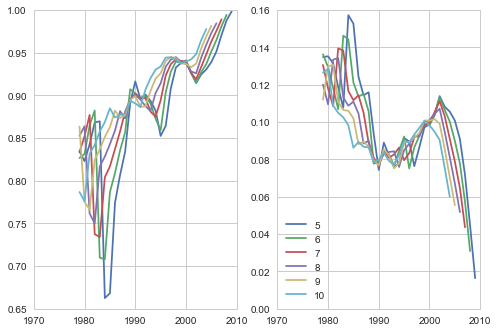

In [57]:
x = arange(0, df.speed.max() + 1)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for year_length in arange(5, 11):
    df_standard = df_all_years[str(2010):str(2014)]
    density, _ = np.histogram(df_standard['speed'], bins=x, normed=True)
    y_ecdf = sm.distributions.ECDF(df_standard.speed)(x)

    gofs = [yearly_gof(df_all_years, start_year, start_year+year_length-1, density, y_ecdf, x) 
            for start_year in arange(df_start_year, df_end_year-year_length)]

    gofs = pd.DataFrame(gofs)
    if len(gofs)>0:
        ax1.plot(gofs.year, gofs.r_square, label=year_length)
        ax2.plot(gofs.year, gofs.k_s, label=year_length)
plt.legend()

# 5. GMM by Expectation-maximization

In [58]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [59]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.423   2.816  -2.610  1.910  2.245   0.063
2  0.298   1.634   3.809  2.326  2.337  -0.232
3  0.279  -2.409   1.632  2.166  3.032  -0.107

GMM Plot Result
0.422928679129 [[ 2.81565941 -2.61004334]] [ 1.89630976  2.25658221] 169.338468227
0.297715433637 [[ 1.63419676  3.80935132]] [ 2.04267928  2.58809133] -135.60362313
0.279355887234 [[-2.4086695   1.63208685]] [ 2.14115922  3.04997628] -171.322354158


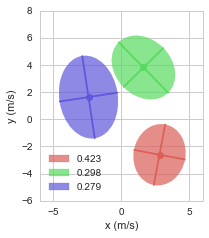

In [60]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [61]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUbHV9L/qpsWvoqq7qeZ7qHAwaUCaJBMm750pQV4w8
yYOYLNcjIbpifCoJYRJQlnKiIpJ7b/ARRdE8wAeGXK9hwdNEMfIeuSLmLHIVD1xOD9Vd3TXP8649
vD+K3z67du25dnVXNfuzFos+Xb/61a+r9v7Ud/x8bRzHcbBgwYKFIwr7YR/AggULFvoJi+QsWLBw
pGGRnAULFo40LJKzYMHCkYZFchYsWDjSsEjOggULRxoWyVmwYOFIwyI5CxYsHGlYJGfBgoUjDYvk
LFiwcKRhkZwFCxaONCySs2DBwpGGRXIWLFg40rBIzoIFC0caFslZsGDhSMMiOQsWLBxpWCRnwYKF
Iw2L5CxYsHCkYZGcBQsWjjQskrNgwcKRhkVyFixYONKwSM6CBQtHGhbJWbBg4UjDIjkLFiwcaVgk
Z8GChSMN52EfwMLhg+M4UBQFmqbhcDjgcrlgt9ths9kO+2gWLPQMG8dx3GEfwsLhodlsolgsIhAI
oNVqAQD29/cRDocRCARgt9st0rMw1LAsuTcwGIZBvV5HOp2G3+8HTdNwuVzgOA4cx4FhGNA0DYqi
YLPZ4HA4LNKzMHSwSO4NCI7jQNM0GIaBzWYDwzDY2NgAwzBwOp1gWRa1Wg0jIyNwOs9eIoT0ms0m
7HY7HA4HHA4HnE6nRXoWBhaWu/oGA8uyaLVaIB97PB5HLpfD8vIy3G43KIpCIpGAzWZDq9WC0+mE
z+eD1+uFz+eDw+Ho2I/sY7PZeLJzOp1d6yxYOCxYltwbBMT9ZBgGAEDTNGKxGFiWhcvlQiAQAEVR
8Hg8cLlcGBsbg9/vR7PZRK1WQ7FYRDKZ5EmPEJ+QzGiaBsdxaDabSKVSmJmZgdvttkjPwqHCIrk3
AFiWBU3TYFkWNpsN5XIZe3t7GB8fRzAYxM7OTsd6m80GjuNgs9ng8Xjg8XgwPj4OjuPQaDRQr9dR
KBSQSCTgcrl4whOSXrVaBUVRPOkR99ay9CwcNCySO+IgcTSSTEgkEiiVSlhaWuItNa0RC5vNxpOZ
kPRqtRoKhQLi8Tjcbjd8Ph84juNJFTgbB7RIz8JBwyK5IwqWZcEwDFiWBQBQFIXd3V243W5EIhE+
odBLskBIeuQ1iaXHsix2d3cxMjLCx/O8Xi/s9nb9uUV6Fg4KFskdQbAsi0wmg2KxiOXlZeTzeSQS
CUxPT2N8fLyL2MSWHHFX9cJut/PxulKphLm5OT5Tm8vl0Gg0MDIy0uHeKpFepVJBMBjEyMiIRXoW
DMMiuSMG4p4CbeKIxWKo1+tYW1uDx+PpWt/Psg+73Q6PxwOfzwegTb71eh31eh3ZbBbNZhMej4e3
9DweTwfppVIpOJ1O0DRtWXoWDMMiuSMCce1bq9VCpVJBKBRCJBLhyUPuuUB/CQ9ok57f74ff7wdw
lvRqtRoymQxPesTSI8kPYlnKubdut9uq0bMgC4vkjgDEtW+ZTAapVAputxsLCwuKz5UiB6Puql6I
SY90YJAuDJqmkUgk4Pf7eUtPLZFBem8t0rNAYJHckINYb0CbJPb29kDTNGZnZ1EqlTTtMSj14A6H
A6OjoxgdHQUAbG5uIhgMgqIopFIptFqtDktPivRarRYajQZPejabDS6Xy3Jv38CwSG5IIXZPK5UK
YrEYQqEQlpeXUa1WNZGXnMVjBvH1uofNZoPP50MoFAJw1tKr1WpIJpOgaZonPZ/Ph5GRkS7Si8fj
/B6WpffGhEVyQwhh7RsAJJNJ5PN5LCwsIBAI8OuMkowZBNAPEhFbejRN86SXSCRA03RHucrIyAh/
FjlLzyK9ow+L5IYIHMchm83C5XLB4/Gg1WohFovBZrMhEonA5XLxa7XetAcVf+sHnE4nAoEAT+xC
0isUCmAYhk+4jIyMdCQohKRHYnqE+CzSO1qwSG5IQFqz8vk8H6fa29vD5OQkJicnu27KXslrGIlP
ivT29/f5/zMM0yE2ICQ9lmX5BI6Q9JxOJ5xOp0V6QwyL5IYADMPwgpYAkM/nQVEUVlZW+Bo0oxD2
qQp/dxRACIoQX6vV6rD0WJblCc/n83VYcELSa7VaKJfLmJmZsUhvCGGR3ABDnFxoNBqoVCoYGRnB
sWPHFDOGw+yG9gsulwsulwvBYBAA0Gq1UKvVUK/XkcvlwHFch6VHSI+madRqNd69tdlslqU3RLBI
bkAhVA4BgFwuh2QyCY/Hg7GxMdWSCK0kR27OUqmEYrHIF+G+EQiSSEqNjY2B47gOSy+XywEAvF4v
LyQqtHiFlp5FeoMNi+QGEMLaN5Zlsb+/j0ajgbW1Nf7mMwuEROPxOMbGxlCpVFCtVmG329FqtXhX
7jDqzMwqY9FCODabDW63G263u4P0arUayuUyms0mtra2JC09wCK9QYZFcgMEsXtaq9Wwu7uLQCDA
t2bpsdDU1hFlEgBYX1/n16dSKQBtS6dUKiGZTMLlcnWUZ2ghPTNI6rDIQUh6LpcLuVwOMzMzqNVq
qFaryGQysNvtHe+JHOkB7fIXUswsrOez0H9YJDcgENe+pdNpZDIZzM/PY2xszNCeSiRTKpWwt7eH
qakp1Ot1OBwOvrGfkGk4HEY4HO7Qjcvn84jH47yaiLixnuAo3cQcx/E9sm63G6FQiB/jWKvVUKlU
kEql4HA4OhIZQguOZVmkUin4/X4EAoGOoUCkM8NCf2CR3CGD4zhUq1XE43EsLy+DYRheljwSicDt
dnes1xtrE4NlWSSTSZRKJT47m0qlFPcU6sZNTEzwunFSjfWE9AYFWt1VvbDZbBgZGcHIyAj/RUBI
r1wu86QnlIoXCg5IWXpkKJBFeubCIrlDBEkukAlYRJY8HA5jenq6p+Z5qXXEPXU6narZWSUIdePI
30GylKTHFADfOzvs7pkWopQivWaziXq9zrv8RC0ZOJvQELu3FEUBQNdQoGF+/w4bFskdEoTuKZFG
2tvbw+LiIt+2JAU9pSHCdcViEfv7+5iamsLExERXXRw5h/D/WmG32zvarRiGQTQa5VVEaJqWLcId
BhiJLQrnYxDS29nZgdPp7BoKJJyERt4XMnRIPPPWIj39sEjugCGl+xaLxcBxHI4dO9Yx51RpDzUI
LYREIoFyuWxK8bAWENdrfHwcHo+HrzMjMT1SjyYswu0XzHJXe92DZFyDwSA/A4NIxReLRSQSCbjd
7q7kjhTpxeNxzM3NdUxCs0hPHhbJHSDEU7OIdTU+Ps7POFWDnp5UlmWxubkJt9ut6p72sy7O6XQi
GAx2FeGSmB5RGxEG7AcJ/Yjr6RkKJJyEZrPZUK/X+S4Yy9JTx2BdTUcYwto3juOwv7+ParWK1dVV
vkRBC7S6kqVSCRzHIRwOS851EO8p/jeJHfUCuXOKi3DFWUqn0wmv18sP4+mnpXeQUCJLpaFAwow2
eV/Eas6WeysPi+T6DKnWrN3dXXi9XkQiETgcDjAMo2ssoNJaoXsKABMTE5rPeRg3glzAvlargeM4
fsKYMEupJOUuxkEWFJu5jzC5I85ocxyH7e1tyaFAQtKjadoiPVgk11eIG+uz2SxSqRRmZ2cRDof5
3+sJ9CutbTabHWMHX3nlFc17mg2jewoD9vl8HktLS2AYRnLil1yNnllnMRu9kKWQ9HK5HNbX1/kv
A7WhQIA06TWbTYyOjh75jgyL5PoAjuPAMAxefvllHDt2DACwv78PiqKwvr7OizkS6M1mSq0l8T0y
dtDImcmFPkjN/VI1emQOBKnRI4+L50CYhcOycqVAPhepMh6poUBKpLe9vY2VlRW+IJkUJwstwqMA
i+RMhrixvlq

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUlVX+/99wDkdIjuIFERFRwUoMMy81LfvaZENNLmti
GAKGmKn8mTnLpovjaE1evpOJk03zR5qVsxoTYyTtj3KtWXYRy3ImU/xiKOEFBQHpQCrOAUTwcH5/
HPfDPs/Zz/U85zkPsF9rnSU8t70Pnvf5fPZnf/ZnR3i9Xi84HI7liAx3BzgcDhsuTg7HonBxcjgW
hYuTw7EoXJwcjkXh4uRwLIo93B1Qory8PNxd4FicGTNmyJ6vqNgLjyeOec7hcCAjIyMU3Qoay4sT
AEr/d19In+92u+F0OkPaBgDUuNr9fk/NSNb8DLe7DU5nrDH9qaz39SNhsCHPozHrb5q7+h7Fazye
OCSPW8c8V3/uRaO7ZBh9Qpx9GSMEGSpSM5JRU1kv9DEUIuXoh4vTYKwsRhakf1yk1oOLM0jEYgRC
I8iqi5cBAB6PB7buy8Lx9OFDDXm+WKRcoOGHi1MlLBECobeMRJQAkHpzot9Yrqa6ye88IRjB0q4u
F2h44eJUgBalWS6qWJBSsM7RgtUrUtqKAtzNDRdcnDIIYzCLiVIOcp9RIuVWNHxwcUpgpjCNEKUY
o0TKI7rhg4uTgRnCDIUgWdDPrqpuAqBdpAM5otvT04M1a9bgxIkTcDgcWLt2LVJSUoTzZWVl2LRp
E+x2O7Kzs/HII48I544ePYrXXnsNxcXFAICqqiosWrQI48ePBwDk5+dj3rx5km1zcYqocbVbUpSV
rRcAANc8Hthbu5ARN0Jz26Q9o0Q6EAT6+eefo6urC6WlpaioqMD69euxefNmAEB3dzeKioqwa9cu
xMTEID8/H3PnzsXIkSOxZcsWfPzxx4iJiRGedfz4cTz++ON44oknVLXNc2spQiXMqouXhRfgE4ka
YVa2XhBeaRNHIW3iKCSNjkXaxFF+54hw1SKIlOqTpvuJSCUi2P2J8vJy/M///A8AYNq0aTh27Jhw
rqamBuPGjcPQoUPhcDgwY8YMHDp0CAAwbtw4vPHGG37POnbsGL744gsUFBTgxRdfRFtbm2zb3HIC
aHJ70dxhrDDFH3o9VhIA0iaOYl5DHz99ptnvHjVWNdgxaV8LFl3qOqnrvra2NsTG9qZL2mw2XLt2
DXa7HW1tbX4pioMHDxYEd//996OhocHvWVOnTkVOTg5uueUWbN68GZs2bcLy5csl2x7w4jRqfBmM
GAF1gpRCSqh6RNpfBVqPu5jHhyncFxsbi/b2Xg+hp6cHdrudea69vV02nzgzMxNDhgwRfn755Zdl
2+ZuLYDE1JG672W5q3qFSVzXYKCfocXlJf3W6uqmZiT7ROpq75du7vTp07F//34AQEVFBW688Ubh
XGpqKurq6tDa2oquri4cPnwYt912m+SzFixYgO+++w4A8J///AdTpkyRbXtAW069HyajIq20KGWv
c7cIP1/zXIPd3YkMZ7zsPeSZxJKqDSCl3pyoy9XtS1ZUC5mZmThw4ADy8vLg9Xqxbt067N69Gx0d
HcjNzcWKFSuwYMECeL1eZGdnIyEhQfJZa9aswcsvv4yoqCiMHDlS0XJGWL00Znl5eUiWjNHurNpl
WEaLEpAXJi3Km5J9YnS73Tjf2ul3nZJQAZ9IAXWuLqFGR1SXZBWNuqHHtCVjSus5y8vLcWn035nn
hv3w/xTvDxcD2nKqHWdaQZQ09LET9S3C9XIiTZs4Std4VKsVJRa0ye2FCdrs1wxIcWpxZ+nxpF6M
EiULcp0akYpdXUBZpHqiuqkZyThZUauq/xxpBqQ4AXVWU68wWUEYNaKUE+TRThcAwBPpwXQEmiSx
SJWsKBCcSNVY0f42/jSbAStOJbQIUyxGtRFXNZaSiBIAJieOwrGGJuHYrdGBwQfynMp6da4uoC1o
RLu6cgJNTB2J5tpLis/jSDPgxKklC0hJmMHMTSpZS7EoCSlDY+F0OvF9UzOOdrqYAiXP1TIeBYBK
lUEjtQIl409uPfURFnFmZWUJWRdjx45FUVFROLohidI8nxGiBNjClBKlGHLuaJOyFVXj6gLaRKpW
oAB3b/ViujivXr0Kr9crZOqbiZpAkJw7G4woAXlrqUaUVd2NuBZ1DVOpMefkxFGCFQWkRarWigLq
I7tqBEqsJ0c7pouzuroaV65cwRNPPIFr167h+eefx7Rp00xrX86lVSNMLaKkrSQQnCgBID0+Ht/9
0ISq7kakRyUF3Cfn6mqJ6gLqx6NqLWi4rWdDRx3zuFL6XjgxXZzR0dFYsGABcnJyUFtbi4ULF2LP
nj1CviILt9ttSNsejxduN3slgNvdBo/Hg8RxQwPaO911BUmjYxX7ctoT+OxxI3qTG8T3nor0/Z4y
lP3ss1EXAQATBveenzA4Fmfb2/Cdx/dhm9A9XLh+bKxvedKRy+cBAJN6AqO6Y+KiAQDnLrTh/1qb
kGaTT75IiI9B4w9t+L8LPlc3zRETcM2opFg0nbsc8Lclv48aPwxNNT8a9v+oh0ve2WFrWy+mi3PC
hAlISUlBREQEJkyYgLi4OLS0tCAxUTr4YkSmSY2rHTYbmJlAJEPI1n2Z2Za9tUu2D8QS2W121fOT
RztdsMHGtJbEUk6ND/ybuN1uTB19fclXSwuc0YH9uuV6wOiMrUMyYDTl+vs5oSKqe/P1a0+faUat
h72WtNnWhvpuj2A9xVlXzbZLaO4YOIu0jcD0xPddu3Zh/fr1AACXy4W2tjbEx6v7QAdLKBdR35Qc
r0mYQKAbW9Xd6OfCinF5a/x+T4+PF64XIwSMKLdZrt+V7pYAN1wMnVAvRimybfX6vVbEdHH+6le/
gtvtRn5+Pp577jmsW7dO1qUNN0qrOpQ+0DRHO1042unC5MRRTGECPsGJheny1gjCdEc3+Z0zQqAA
NT+qIFI5gQLKke7+uHIlVJguTofDgb/+9a/45z//iZKSEkyfPt3sLmhGKQikxmJKWUsAqqxl+rAE
pA9L8DtGMFKgtEilkBIot57GwtdzBkGlu0VRmMRaAtJurJy1pEUJAOOjhwjnxRghUECdFZX7wtJT
+oQTCBfndaouXtZWSkTBnRWLUs6NpaFdWFqUNCwLSp5jpEDVWFGt1hPgrq1aBoQ4Q/VhkJq3lBMl
IC9MAAHWEgA8qIQHlRh0w2nhGvoe+nlqBKrHioqRG3/WdnYxn8ddW/UMCHECxn4opNxZJVECbGFK
ubBArygBYJJzjHAM0C9Q8iIiDSaiy3JvQ1mHdyAxYMRpFnL5sARW4EfKhQV8oiTCHGvz36GZdR/r
+SzoLxE1QlU7VUSQGnuSmkN9gZ6eHqxatQq5ubkoLCxEXZ1/plFZWRmys7ORm5uLDz74wO/c0aNH
UVhYKPz+/fff49e//jUKCwuxYMEC/Pjjj7Jtc3FSkLIcaiCT91qQsmZSEAupB7kIrhjamgLK41KW
iyt2bRPHGbM1Ybihi0ovXbpUmKMHeotKv/vuuyguLkZpaakguC1btuCll17C1atXhetfeeUVrFy5
EsXFxcjMzMSWLVtk2+bivI5cXiipv0OQy6b5vqlZ8hyg3qoRiMU0CyWBsqxnsBUDzeCU+zzzpYSR
RaVff/11TJ48GYBvn9VBgwbJts3FqYCWglhSqXJykLGmmGCsZrCocc21JF9IYaZra0MG86WEVFFp
ck6uqLQ4uWbUKN/f9ciRI9i+fTsee+wx2ba5OINAj2urBbOtJg0JGLFQO/YkdXCZ5/pI1NbIotIA
8K9//QurV6/GO++8g+HDh8tey8WpEi2ubbCE02qKUTvlQvZv6W8YWVT6o48+wvbt21FcXIzkZOUv
J+smtVqIjLg

## Goodness-of-fit Statistics

In [62]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.952  0.022      0.030  6.478512e-07      0.049       0.237

In [63]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [64]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [65]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.101445121024044
     jac: array([  2.54845250e+00,  -1.90734863e-06,   5.96046448e-07,
         0.00000000e+00,   1.19209290e-07,   4.76837158e-07,
         2.54845166e+00,   0.00000000e+00,  -5.96046448e-07,
         3.57627869e-07,   5.96046448e-07,   3.57627869e-07,
         2.54845881e+00,  -1.19209290e-07,   3.57627869e-07,
        -1.19209290e-07,  -2.38418579e-07,   1.19209290e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 982
     nit: 48
    njev: 48
  status: 0
 success: True
       x: array([ 0.34274839,  3.37305002, -1.95312609,  1.63451716,  2.82930496,
        0.24103574,  0.41645148, -0.16539615,  3.78042477,  2.87064024,
        2.04322317, -0.00899645,  0.24080013, -0.2334316 , -1.92394324,
        3.08911086,  2.01074885, -0.51950802])

## 6.1 GMM Result

In [66]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.416  -0.165   3.780  2.871  2.043  -0.009
2  0.343   3.373  -1.953  1.635  2.829   0.241
3  0.241  -0.233  -1.924  3.089  2.011  -0.520

GMM Plot Result
0.416451481358 [[-0.16539615  3.78042477]] [ 2.04305561  2.8707595 ] -90.7434354504
0.342748388928 [[ 3.37305002 -1.95312609]] [ 1.56462411  2.86854742] 168.657378216
0.240800129714 [[-0.2334316  -1.92394324]] [ 1.59790315  3.32150905] -114.782233675


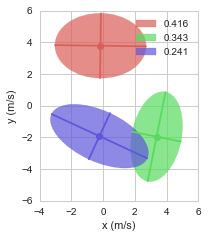

In [67]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [68]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.014      0.059  2.763922e-07      0.032       0.155

In [69]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUM2d9LviUtlZLLbVavS/qRf0ZAg4GfxjMYkjmuzgQ
33BZnMFAhhnf46w3GIg9xjZeL/iLHQzmZmKOE+xgzrVJbMdzGOOLJwlgwOf4YrDzxQzxQvz1om51
a9/3Ui3zh/xWl0pVpapSqVtq13OOj79uvfXqban06Lc+P4rneR4WLFiwcExhO+oDWLBgwUI/YZGc
BQsWjjUskrNgwcKxhkVyFixYONawSM6CBQvHGhbJWbBg4VjDIjkLFiwca1gkZ8GChWMNi+QsWLBw
rGGRnAULFo41LJKzYMHCsYZFchYsWDjWsEjOggULxxoWyVmwYOFYwyI5CxYsHGtYJGfBgoVjDYvk
LFiwcKxhkZwFCxaONSySs2DBwrGGRXIWLFg41rBIzoIFC8caFslZsGDhWMMiOQsWLBxrWCRnwYKF
Yw2L5CxYsHCs4TjqA1g4evA8D5qmwTAM7HY7nE4nbDYbKIo66qNZsNAzKJ7n+aM+hIWjQ6PRQKFQ
gM/nQ7PZBADs7+9jYmICPp8PNpvNIj0LQw3LknsNg2VZ1Go1pFIpeL1eMAwDp9MJnufB8zxYlgXD
MKBpGhRFwW63W6RnYehgkdxrEDzPg2EYsCwLiqLAsiw2NjbAsiwcDgc4jkO1WsXIyAgcjoNbhJBe
o9GAzWaD3W6H3W6Hw+GwSM/CwMJyV19j4DgOzWYT5G2PxWLIZrNYXl6Gy+UCTdOIx+OgKArNZhMO
hwMejwejo6PweDyw2+1t+5F9KIoSyM7hcHSss2DhqGBZcq8REPeTZVkAAMMwiEaj4DgOTqcTPp8P
NE3D7XbD6XRifHwcXq8XjUYD1WoVhUIBiURCID1CfGIyYxgGPM+j0WggmUxidnYWLpfLIj0LRwqL
5F4D4DgODMOA4zhQFIVSqYS9vT0Eg0H4/X7s7Oy0racoCjzPg6IouN1uuN1uBINB8DyPer2OWq2G
fD6PeDwOp9MpEJ6Y9CqVCmiaFkiPuLeWpWfhsGGR3DEHiaORZEI8HkexWEQoFBIsNa0RC4qiBDIT
k161WkU+n0csFoPL5YLH4wHP8wKpAgdxQIv0LBw2LJI7puA4DizLguM4AABN09jd3YXL5cL6+rqQ
UOglWSAmPfKcxNLjOA67u7sYGRkR4nmjo6Ow2Vr15xbpWTgsWCR3DMFxHNLpNAqFApaXl5HL5RCP
xzEzM4NgMNhBbFJLjriremGz2YR4XbFYxPz8vJCpzWazqNfrGBkZaXNv1UivXC7D7/djZGTEIj0L
hmGR3DEDcU+BFnFEo1HUajWsra3B7XZ3rO9n2YfNZoPb7YbH4wHQIt9arYZarYZMJoNGowG32y1Y
em63u430kskkHA4HGIaxLD0LhmGR3DGBtPat2WyiXC4jEAhgfX1dIA+la4H+Eh7QIj2v1wuv1wvg
gPSq1SrS6bRAesTSI8kPYlkqubcul8uq0bOgCIvkjgGktW/pdBrJZBIulwuLi4uq18qRg1F3VS+k
pEc6MEgXBsMwiMfj8Hq9gqXXLZFBem8t0rNAYJHckINYb0CLJPb29sAwDObm5lAsFjXtMSj14Ha7
HWNjYxgbGwMAbG5uwu/3g6ZpJJNJNJvNNktPjvSazSbq9bpAehRFwel0Wu7taxgWyQ0ppO5puVxG
NBpFIBDA8vIyKpWKJvJSsnjMIL5e96AoCh6PB4FAAMCBpVetVpFIJMAwjEB6Ho8HIyMjHaQXi8WE
PSxL77UJi+SGEOLaNwBIJBLI5XJYXFyEz+cT1hklGTMIoB8kIrX0GIYRSC8ej4NhmLZylZGREeEs
SpaeRXrHHxbJDRF4nkcmk4HT6YTb7Uaz2UQ0GgVFUVhfX4fT6RTWav3QHlb8rR9wOBzw+XwCsYtJ
L5/Pg2VZIeEyMjLSlqAQkx6J6RHis0jveMEiuSEBac3K5XJCnGpvbw9TU1OYmprq+FD2Sl7DSHxy
pLe/vy/8n2XZNrEBMelxHCckcMSk53A44HA4LNIbYlgkNwRgWVYQtASAXC4HmqaxsrIi1KAZhbhP
Vfy74wBCUIT4ms1mm6XHcZxAeB6Pp82CE5Nes9lEqVTC7OysRXpDCIvkBhjS5EK9Xke5XMbIyAhO
nDihmjEcZje0X3A6nXA6nfD7/QCAZrOJarWKWq2GbDYLnufbLD1CegzDoFqtCu4tRVGWpTdEsEhu
QCFWDgGAbDaLRCIBt9uN8fHxriURWkmOfDiLxSIKhYJQhPtaIEgiKTU+Pg6e59ssvWw2CwAYHR0V
hETFFq/Y0rNIb7BhkdwAQlz7xnEc9vf3Ua/Xsba2Jnz4zAIh0VgshvHxcZTLZVQqFdhsNjSbTcGV
O4o6M7PKWLQQDkVRcLlccLlcbaRXrVZRKpXQaDSwtbUla+kBFukNMiySGyBI3dNqtYrd3V34fD6h
NUuPhdZtHVEmAYBwOCysTyaTAFqWTrFYRCKRgNPpbCvP0EJ6ZpDUUZGDmPScTiey2SxmZ2dRrVZR
qVSQTqdhs9naXhMl0gNa5S+kmFlcz2eh/7BIbkAgrX1LpVJIp9NYWFjA+Pi4oT3VSKZYLGJvbw/T
09Oo1Wqw2+1CYz8h04mJCUxMTLTpxuVyOcRiMUFNRNpYT3CcPsQ8zws9si6XC4FAQBjjWK1WUS6X
kUwmYbfb2xIZYguO4zgkk0l4vV74fL62oUCkM8NCf2CR3BGD53lUKhXEYjEsLy+DZVlBlnx9fR0u
l6ttvd5YmxQcxyGRSKBYLArZ2WQyqbqnWDducnJS0I2Ta6wnpDco0Oqu6gVFURgZGcHIyIjwRUBI
r1QqCaQnlooXCw7IWXpkKJBFeubCIrkjBEkukAlYRJZ8YmICMzMzPTXPy60j7qnD4eianVWDWDeO
/B0kS0l6TAEIvbPD7p5pIUo50ms0GqjVaoLLT9SSgYOEhtS9pWkaADqGAg3z63fUsEjuiCB2T4k0
0t7eHpaWloS2JTnoKQ0RrysUCtjf38f09DQmJyc76uLIOcT/1wqbzdbWbsWyLCKRiKAiwjCMYhHu
MMBIbFE8H4OQ3s7ODhwOR8dQIPEkNPK6kKFD0pm3Funph0Vyhww53bdoNAqe53HixIm2Oadqe3SD
2EKIx+MolUqmFA9rAXG9gsEg3G63UGdGYnqkHk1chNsvmOWu9roHybj6/X5hBgaRii8UCojH43C5
XB3JHTnSi8VimJ+fb5uEZpGeMiySO0RIp2YR6yoYDAozTrtBT08qx3HY3NyEy+Xq6p72sy7O4XDA
7/d3FOGSmB5RGxEH7AcJ/Yjr6RkKJJ6ERlEUarWa0AVjWXrdMVh30zGGuPaN53ns7++jUqlgdXVV
KFHQAq2uZLFYBM/zmJiYkJ3rIN1T+jOJHfUCpXNKi3ClWUqHw4HR0VFhGE8/Lb3DhBpZqg0FEme0
yesiVXO23FtlWCTXZ8i1Zu3u7mJ0dBTr6+uw2+1gWVbXWEC1tWL3FAAmJyc1n/MoPghKAftqtQqe
54UJY+IspZqUuxSHWVBs5j7i5I40o83zPLa3t2WHAolJj2EYi/RgkVxfIW2sz2QySCaTmJubw8TE
hPB7PYF+tbWNRqNt7ODLL7+seU+zYXRPccA+l8shFAqBZVnZiV9KNXpmncVs9EKWYtLLZrMIh8PC
l0G3oUCAPOk1Gg2MjY0d+44Mi+T6AJ7nwbIsXnjhBZw4cQIAsL+/D5qmEQ6HBTFHAr3ZTLm1JL5H
xg4aOTO50QepuV+uRo/MgSA1euRx6RwIs3BUVq4cyPsiV8YjNxRIjfS2t7exsrIiFCST4mSxRXgc
YJGcyZA21lc

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUlVX+/99wDkdIjuIFERFRwUoMMy81LfvaZENNLmti
GAKGmKn8mTnLpovjaE1evpOJk03zR5qVsxoTYyTtj3KtWXYRy3ImU/xiKOEFBQHpQCrOAUTwcH5/
HPfDPs/Zz/U85zkPsF9rnSU8t70Pnvf5fPZnf/ZnR3i9Xi84HI7liAx3BzgcDhsuTg7HonBxcjgW
hYuTw7EoXJwcjkXh4uRwLIo93B1Qory8PNxd4FicGTNmyJ6vqNgLjyeOec7hcCAjIyMU3Qoay4sT
AEr/d19In+92u+F0OkPaBgDUuNr9fk/NSNb8DLe7DU5nrDH9qaz39SNhsCHPozHrb5q7+h7Fazye
OCSPW8c8V3/uRaO7ZBh9Qpx9GSMEGSpSM5JRU1kv9DEUIuXoh4vTYKwsRhakf1yk1oOLM0jEYgRC
I8iqi5cBAB6PB7buy8Lx9OFDDXm+WKRcoOGHi1MlLBECobeMRJQAkHpzot9Yrqa6ye88IRjB0q4u
F2h44eJUgBalWS6qWJBSsM7RgtUrUtqKAtzNDRdcnDIIYzCLiVIOcp9RIuVWNHxwcUpgpjCNEKUY
o0TKI7rhg4uTgRnCDIUgWdDPrqpuAqBdpAM5otvT04M1a9bgxIkTcDgcWLt2LVJSUoTzZWVl2LRp
E+x2O7Kzs/HII48I544ePYrXXnsNxcXFAICqqiosWrQI48ePBwDk5+dj3rx5km1zcYqocbVbUpSV
rRcAANc8Hthbu5ARN0Jz26Q9o0Q6EAT6+eefo6urC6WlpaioqMD69euxefNmAEB3dzeKioqwa9cu
xMTEID8/H3PnzsXIkSOxZcsWfPzxx4iJiRGedfz4cTz++ON44oknVLXNc2spQiXMqouXhRfgE4ka
YVa2XhBeaRNHIW3iKCSNjkXaxFF+54hw1SKIlOqTpvuJSCUi2P2J8vJy/M///A8AYNq0aTh27Jhw
rqamBuPGjcPQoUPhcDgwY8YMHDp0CAAwbtw4vPHGG37POnbsGL744gsUFBTgxRdfRFtbm2zb3HIC
aHJ70dxhrDDFH3o9VhIA0iaOYl5DHz99ptnvHjVWNdgxaV8LFl3qOqnrvra2NsTG9qZL2mw2XLt2
DXa7HW1tbX4pioMHDxYEd//996OhocHvWVOnTkVOTg5uueUWbN68GZs2bcLy5csl2x7w4jRqfBmM
GAF1gpRCSqh6RNpfBVqPu5jHhyncFxsbi/b2Xg+hp6cHdrudea69vV02nzgzMxNDhgwRfn755Zdl
2+ZuLYDE1JG672W5q3qFSVzXYKCfocXlJf3W6uqmZiT7ROpq75du7vTp07F//34AQEVFBW688Ubh
XGpqKurq6tDa2oquri4cPnwYt912m+SzFixYgO+++w4A8J///AdTpkyRbXtAW069HyajIq20KGWv
c7cIP1/zXIPd3YkMZ7zsPeSZxJKqDSCl3pyoy9XtS1ZUC5mZmThw4ADy8vLg9Xqxbt067N69Gx0d
HcjNzcWKFSuwYMECeL1eZGdnIyEhQfJZa9aswcsvv4yoqCiMHDlS0XJGWL00Znl5eUiWjNHurNpl
WEaLEpAXJi3Km5J9YnS73Tjf2ul3nZJQAZ9IAXWuLqFGR1SXZBWNuqHHtCVjSus5y8vLcWn035nn
hv3w/xTvDxcD2nKqHWdaQZQ09LET9S3C9XIiTZs4Std4VKsVJRa0ye2FCdrs1wxIcWpxZ+nxpF6M
EiULcp0akYpdXUBZpHqiuqkZyThZUauq/xxpBqQ4AXVWU68wWUEYNaKUE+TRThcAwBPpwXQEmiSx
SJWsKBCcSNVY0f42/jSbAStOJbQIUyxGtRFXNZaSiBIAJieOwrGGJuHYrdGBwQfynMp6da4uoC1o
RLu6cgJNTB2J5tpLis/jSDPgxKklC0hJmMHMTSpZS7EoCSlDY+F0OvF9UzOOdrqYAiXP1TIeBYBK
lUEjtQIl409uPfURFnFmZWUJWRdjx45FUVFROLohidI8nxGiBNjClBKlGHLuaJOyFVXj6gLaRKpW
oAB3b/ViujivXr0Kr9crZOqbiZpAkJw7G4woAXlrqUaUVd2NuBZ1DVOpMefkxFGCFQWkRarWigLq
I7tqBEqsJ0c7pouzuroaV65cwRNPPIFr167h+eefx7Rp00xrX86lVSNMLaKkrSQQnCgBID0+Ht/9
0ISq7kakRyUF3Cfn6mqJ6gLqx6NqLWi4rWdDRx3zuFL6XjgxXZzR0dFYsGABcnJyUFtbi4ULF2LP
nj1CviILt9ttSNsejxduN3slgNvdBo/Hg8RxQwPaO911BUmjYxX7ctoT+OxxI3qTG8T3nor0/Z4y
lP3ss1EXAQATBveenzA4Fmfb2/Cdx/dhm9A9XLh+bKxvedKRy+cBAJN6AqO6Y+KiAQDnLrTh/1qb
kGaTT75IiI9B4w9t+L8LPlc3zRETcM2opFg0nbsc8Lclv48aPwxNNT8a9v+oh0ve2WFrWy+mi3PC
hAlISUlBREQEJkyYgLi4OLS0tCAxUTr4YkSmSY2rHTYbmJlAJEPI1n2Z2Za9tUu2D8QS2W121fOT
RztdsMHGtJbEUk6ND/ybuN1uTB19fclXSwuc0YH9uuV6wOiMrUMyYDTl+vs5oSKqe/P1a0+faUat
h72WtNnWhvpuj2A9xVlXzbZLaO4YOIu0jcD0xPddu3Zh/fr1AACXy4W2tjbEx6v7QAdLKBdR35Qc
r0mYQKAbW9Xd6OfCinF5a/x+T4+PF64XIwSMKLdZrt+V7pYAN1wMnVAvRimybfX6vVbEdHH+6le/
gtvtRn5+Pp577jmsW7dO1qUNN0qrOpQ+0DRHO1042unC5MRRTGECPsGJheny1gjCdEc3+Z0zQqAA
NT+qIFI5gQLKke7+uHIlVJguTofDgb/+9a/45z//iZKSEkyfPt3sLmhGKQikxmJKWUsAqqxl+rAE
pA9L8DtGMFKgtEilkBIot57GwtdzBkGlu0VRmMRaAtJurJy1pEUJAOOjhwjnxRghUECdFZX7wtJT
+oQTCBfndaouXtZWSkTBnRWLUs6NpaFdWFqUNCwLSp5jpEDVWFGt1hPgrq1aBoQ4Q/VhkJq3lBMl
IC9MAAHWEgA8qIQHlRh0w2nhGvoe+nlqBKrHioqRG3/WdnYxn8ddW/UMCHECxn4opNxZJVECbGFK
ubBArygBYJJzjHAM0C9Q8iIiDSaiy3JvQ1mHdyAxYMRpFnL5sARW4EfKhQV8oiTCHGvz36GZdR/r
+SzoLxE1QlU7VUSQGnuSmkN9gZ6eHqxatQq5ubkoLCxEXZ1/plFZWRmys7ORm5uLDz74wO/c0aNH
UVhYKPz+/fff49e//jUKCwuxYMEC/Pjjj7Jtc3FSkLIcaiCT91qQsmZSEAupB7kIrhjamgLK41KW
iyt2bRPHGbM1Ybihi0ovXbpUmKMHeotKv/vuuyguLkZpaakguC1btuCll17C1atXhetfeeUVrFy5
EsXFxcjMzMSWLVtk2+bivI5cXiipv0OQy6b5vqlZ8hyg3qoRiMU0CyWBsqxnsBUDzeCU+zzzpYSR
RaVff/11TJ48GYBvn9VBgwbJts3FqYCWglhSqXJykLGmmGCsZrCocc21JF9IYaZra0MG86WEVFFp
ck6uqLQ4uWbUKN/f9ciRI9i+fTsee+wx2ba5OINAj2urBbOtJg0JGLFQO/YkdXCZ5/pI1NbIotIA
8K9//QurV6/GO++8g+HDh8tey8WpEi2ubbCE02qKUTvlQvZv6W8YWVT6o48+wvbt21FcXIzkZOUv
J+smtVqIjLg

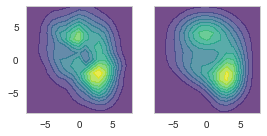

In [70]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='', ylabel='', colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='', ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [71]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [72]:
%%time
x = arange(0, max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x= x)

Wall time: 11.4 s


Speed Distribution Comparison
(0.9908810749017708, 0.98095304136288908, 0.98481676199426671)
Wall time: 8.95 s


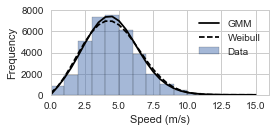

In [73]:
%%time
# Calculate Speed Distribution
# 1. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em))

In [74]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADSCAYAAACCXZ8eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX+x/EX28gqCii4obigqZWIuW+JpLkrKqCBlvem
3tRMr7n008zdNJfccqk0zC2zlNy3ssgNEE1RXFBcYlGRYIZNmPP7g5jkoqg4w7B8no9Hj5zznTm8
OQMfvufM9/s9JoqiKAghRCGYGjuAEKLkkgIihCg0KSBCiEKTAiKEKDQpIEKIQpMCIoQoNIMWkLNn
zxIQEJBv+5EjR/Dx8cHX15dt27YZMoIQwoDMDbXjtWvXsmvXLqysrPJsf/jwIXPnzmX79u1YWVnh
7+9Pp06dcHJyMlQUIYSBGKwH4urqyrJly/Jtv3btGq6urtjb26NSqfD09OT06dOGiiGEMCCD9UC6
dOnC7du3821Xq9XY2dnpHtvY2KBWq5+6v7CwML3mE0I8O09Pz8duN1gBeRJbW1s0Go3usUajyVNQ
CvKkb6KohYWFSZbH0FeWX05f4bMvtnEn+hz3Y6+TmHCTlAfxT3y+o4sbjk7OxMfeJPlBPFY29pSz
ssPa1h7r8o406zgAC0sbUhLjwdQUa9sKqMpZo7K0ppylFdWcHYi9l/+PWFUnWxR44TZNaio21tZ6
3eej/lJnYm+reu4cEwKa5XvN4xT0x7vIC0idOnWIiYkhKSkJa2trQkNDGTZsWFHHEMVAeFQCh07d
JOZOAql3L5OddIXIsycJDz+Domh1z7O2c6B6XQ+y0pOJu31Nt61y9XpUrFyDNt3+japcOSpYm3A/
OQsTU9Mn/NK65stQ1ckWr+auBO2JzNfm1Tzn+cW9rWvrWhw/92eh9veiiqyABAcHk5qaiq+vL5Mm
TWLYsGEoioKPjw/Ozs5FFUMUE7+GRfPJ/JVEnt5H3M2LKNqcgmFubkF5Bxcy01NJ0yQB0OudWbjU
fImE21FkJt/BzrkB5R2qYGJiotufi4NNoQtB0/qVATh86iZxiRrdvnK3v2jbtVupukKlr33+b1vd
6hUKneNFmJSU2bilsauuD8U9S24vI+6+BmcHa1ws7/Hrge8J2riJzIw0TExMcan5EjXqelDOypbf
96wjOzsLUzNz6jRuQ53Gbaj1Ukssre0K7C0EdGtI0/qVCY9K+PuXJYE6NSrn+WXJbXvSL1lRHhdj
KGyOgl5X5KcwouwIj0ogaE8k6ZpkLoYd5MLJPdyLjQagfEVnXm3bj4eZ6VSqWptGLbrxMDOda+d/
w9/fF7Xly1jZ2ufZ37P0FprWr0zT+pUf+0Of2yb0RwqIMJh9IVcJPbKZkweDeJiRhqmpGfVe7UBb
r748uB/L/u9Xk6ZOokqtRjRq0Q0LlSVjP/maCQHNCuwtSCEoPqSACIPYs2cPCyYNJ+nubaxs7Gnh
HUDD17ry4O4tgjcv5V5sNBblrGjd7V94tPfRvS73eoUUiZJBCojQq6tXrzJ27Fh2796NqakZTdr1
o2WXoVha53xUf+PSKe7HXeedd95h4NCxnLuRUeTXJIT+SAERLyw8KoHdxy6xY+Ny/vj9R7KzHvL6
668zfOw0QqIecnzf19jaV6JJu7685OnNO35d8O3VEYAu7Yyb/Xk9elHYxdGGzmW86EkBES8kPCqB
z9bsJPjrqaQ8iMeuojPte43kk0kjqF4R5s3oTUTYSSpVq0vX3oPxblmrxP7C5V4UzhV7T617XNjv
6eTJk4wdO5a6deuiKApZWVkEBgbSrVu3xz7/zz//5NKlS3Tq1KlQX0/fpICIF7J01TdsWzWVrIcZ
NOkwkDZvvo2FypINW/fzw7qPuH37NgMHDuSrr77CxsbG2HFfyKFTNx+7/fCpmy9UFFu2bMnixYuB
nJHZAQEBuLm58dJLL+V77okTJ4iOjpYCIko2RVH49NNP+ebzyZhblKPH0BlUqdMUC5UlSffuELTg
32izcmZeT5w4Mc+gr5Iq7r7m8dsTH7+9MGxsbPD19WXPnj1s3LiRuLg4EhIS6NSpE2PGjGHNmjWk
p6fj4eGBnZ0dy5cvR1EUNBoNn332GW5ubnrL8iykgIhn8ui5v1N5C44Hf85PP27F3qEy3YfOonL1
emhSUwGo4FSNdm/4MeE/vk/sipdELo42j52L4uKg356Vo6MjBw4coGvXrgwYMICMjAzat2/PBx98
wLvvvkt0dDReXl58++23LFiwAGdnZ7744gv27dvHyJEj9ZrlaaSAiKd69Nw/Tf0XK5dN4070ORq9
3ITPVnzDvtD7pGn+4sCmebTtNoxK1ery2WcLSuy1jifp/JSh8vry559/4uHhwR9//MGJEyewtbUl
MzMz3/OcnZ2ZPXs21tbWxMfH07RpU73meBZSQMRT5Z7734+7wc51U0hOjKVek474vzeTLu1eBuUc
gwcEcD/hNlWrVGPcv1eWuuIBPNOcmRelVqv57rvv6N+/P2lpacyYMYOYmBi2bduGoiiYmpqi/Xve
0NSpUzl48CC2trZMnDgRY8xKkQIiniruvobE+Bi2LRtDRloKLd4IpOUbQ0jUZJOYmMh/3xvM/YTb
BAQEsH79ekxNS+9Su4YY4HbixAkCAgIwNTUlOzub0aNH4+bmxvjx44mIiEClUlGzZk0SEhJwd3dn
1apVNGrUiF69ejF48GCsrKxwcnIiISFBr7mehRQQ8VQ2ZmmsWzORjLQUOg/8L41bdgfAwcaUHj16
cP78eUaPHk1gYGCpLh6G0KJFC44fP/7Ytl27duXb5uzszP79+wHo3r27QbM9C3m3RYE0Gg3fr55E
yoN4WnV9W1c8ANo2qYK5uTmDBg1iyZIlpeKTFvF8pAcinig7Oxt/f38uXjhLbx9/WvcaSfyDVCpX
sKK9hwutXnFl//79mJubS8+jjJICIh5LURTef/99goOD8fb25rvNG7CwsEBRFEaPHs3EL88RHByM
vb3903cmSi35syEea9GiRaxYsYKXX36Z7du3Y2FhAcCMGTNYsWIFSUlJuk8DRNklPRChkztY7Njh
3ezeMJ1KlV3Ys2cP5cuXB2D58uVMnz4dNzc39u/fT8WKFY2cWBibFBAB/DNY7M/rf7Dv29lYlLPC
O2AmCRoV1YFjx47x/vvv4+zszMGDB6lSpYqxI4tiQE5hBJAzWEyTkkjwV1PRarPpPmQ6lavV5fDf
g8hMTU1xdXVlx44d1KlTx8hpS5dbt24xZswYBg4cSGBgIO+++y5Xrlxh2bJlvPTSS8TH/3NLi/v3
79OoUSN27NjB7du3qV+/PmvWrMmzvxEjRjz2lrKGID0QAeRMTT+yfQlpmr9o3/s/1GrQHPhnoljb
tm2JiopCpcp//5HSYsKECXz33Xd63eeAAQPw8/N7YntaWhojR45k5syZeHh4AHDu3DlmzJhB8+bN
qVWrFnv37mXo0KFAzkpvj/b+XF1zPgl79913AXjw4AExMTFFdqtY6YEIAOIu/8a1P36lWu1X8Gj3
zxKDMecOMnnyZB4+fFiqi4exHD16lJYtW+qKB8Arr7zCN998A0C3bt3Yt29fnue//vrruscVK1bE
0dGRa9dy7pezd+9eunbtWkTppQcigNjYWPZs/gxzlSVv+E/E5O8xHYnxMfy0aRHWVpaMGjWKatWq
GTmpYS1YsIAFCxbofb8F3dnt9u3buLr+Mxlv5MiRqNVqEhISaNasGY0bN8bKyopbt26h1WpxcXGh
XLlyefbRvXt3du/ezZgxYzh8+DDjxo0jNDRU79/H40gPpIxTFIXhw4eT/FcS4yd+zEv13TE1NaFS
eQtO7FxARnoaa9euLfXFw1hcXFzy3EN61apVBAUFYW9vT3Z2NvBPgQgODqZnz5759tG5c2eOHDnC
7du3qVSpEpa

0.0176342265769 0.0747080733827
2.0 5.0
Wall time: 9.59 s


Direction Distribution Comparison


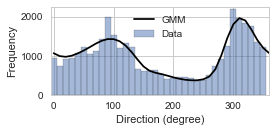

In [75]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')

In [76]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.913884447954
Wall time: 8.34 s


## 6.3 Sectoral Comaprison

In [77]:
# %%time
# curve_collection=Parallel(n_jobs=-1)(delayed(direction_compare2)
#                                      (gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre))  

In [78]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 5.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

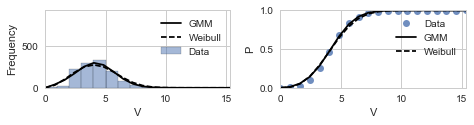

5.0 (-5.0 - 15.0) degree
data size: 1208 weight 0.0332306338028169
GMM Weibull
R square 0.956723843044 0.935972361096
max diff: 0.0425582979042 0.0463744773093 speed value: 2.42093519951 2.42093519951 y gmm 0.142723860818
 


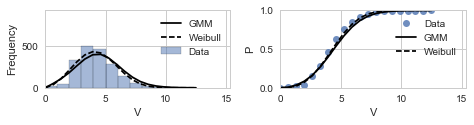

25.0 (15.0 - 35.0) degree
data size: 1869 weight 0.051413952464788734
GMM Weibull
R square 0.880500096161 0.936612159001
max diff: 0.094037887573 0.0650478976747 speed value: 4.59697390934 4.59697390934 y gmm 0.538920913925
 


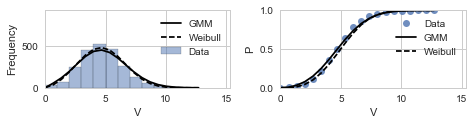

45.0 (35.0 - 55.0) degree
data size: 2275 weight 0.0625825264084507
GMM Weibull
R square 0.952533606799 0.97565363768
max diff: 0.0485438303857 0.0802976294208 speed value: 6.013932862 6.013932862 y gmm 0.738708916867
 


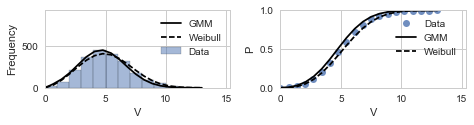

65.0 (55.0 - 75.0) degree
data size: 2182 weight 0.060024207746478875
GMM Weibull
R square 0.982014283447 0.978012876598
max diff: 0.0483750436379 0.0506473371303 speed value: 4.77688074446 5.45929227938 y gmm 0.509878251704
 


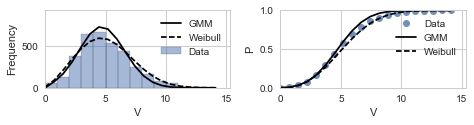

85.0 (75.0 - 95.0) degree
data size: 3411 weight 0.0938325264084507
GMM Weibull
R square 0.961442770434 0.961985327864
max diff: 0.0578585831436 0.0641031492664 speed value: 6.679242051 5.19496603966 y gmm 0.847363127266
 


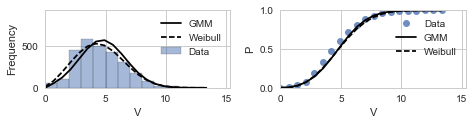

105.0 (95.0 - 115.0) degree
data size: 2718 weight 0.07476892605633803
GMM Weibull
R square 0.901558690596 0.958401367174
max diff: 0.0926965916773 0.0892725600103 speed value: 4.21132941262 4.21132941262 y gmm 0.38154917727
 


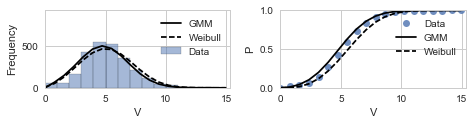

125.0 (115.0 - 135.0) degree
data size: 2549 weight 0.07011993838028169
GMM Weibull
R square 0.953635430845 0.944636129389
max diff: 0.0642413661877 0.111416088785 speed value: 3.144664528 6.28932905599 y gmm 0.199196250456
 


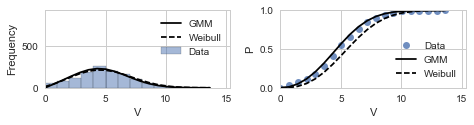

145.0 (135.0 - 155.0) degree
data size: 1271 weight 0.03496368838028169
GMM Weibull
R square 0.946320956594 0.952519919787
max diff: 0.0364597818215 0.130964029404 speed value: 6.46073898181 5.02501920807 y gmm 0.790196996613
 


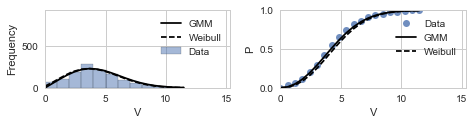

165.0 (155.0 - 175.0) degree
data size: 1248 weight 0.03433098591549296
GMM Weibull
R square 0.942572250814 0.948631985422
max diff: 0.0443507029358 0.0858274976087 speed value: 4.22950913636 4.22950913636 y gmm 0.510937758603
 


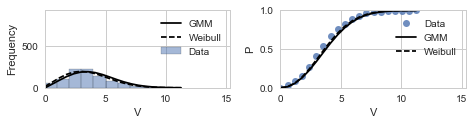

185.0 (175.0 - 195.0) degree
data size: 929 weight 0.02555567781690141
GMM Weibull
R square 0.905300842902 0.942883789666
max diff: 0.0935721096031 0.0698079107952 speed value: 4.14382860276 4.14382860276 y gmm 0.578117879633
 


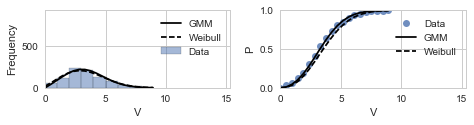

205.0 (195.0 - 215.0) degree
data size: 889 weight 0.02445532570422535
GMM Weibull
R square 0.956076185606 0.946763097069
max diff: 0.0307216185469 0.097053547368 speed value: 3.28951688177 3.75944786488 y gmm 0.506961171104
 


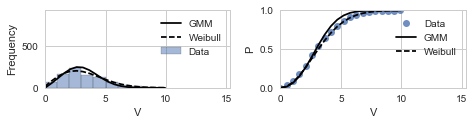

225.0 (215.0 - 235.0) degree
data size: 882 weight 0.024262764084507043
GMM Weibull
R square 0.914661104875 0.966058286128
max diff: 0.0767804892861 0.0427839674295 speed value: 4.70042074349 3.13361382899 y gmm 0.88063536457
 


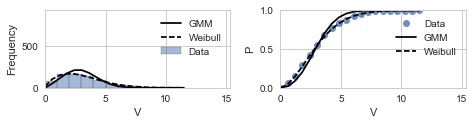

245.0 (235.0 - 255.0) degree
data size: 737 weight 0.02027398767605634
GMM Weibull
R square 0.857163323282 0.989912521509
max diff: 0.0857367773879 0.0178756702104 speed value: 1.81283638278 4.22995155983 y gmm 0.205986424783
 


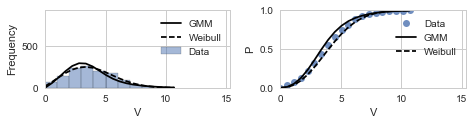

265.0 (255.0 - 275.0) degree
data size: 1228 weight 0.03378080985915493
GMM Weibull
R square 0.919155187369 0.985007005276
max diff: 0.0694441949014 0.0648220523226 speed value: 4.49430885217 3.93252024565 y gmm 0.722538657442
 


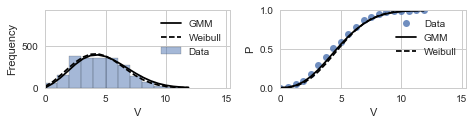

285.0 (275.0 - 295.0) degree
data size: 2167 weight 0.05961157570422535
GMM Weibull
R square 0.942446589971 0.958439833396
max diff: 0.0563496472957 0.0830815157576 speed value: 4.37180077706 4.37180077706 y gmm 0.451726033369
 


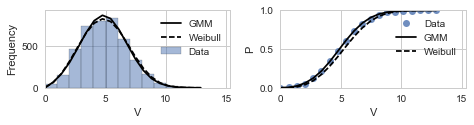

305.0 (295.0 - 315.0) degree
data size: 4149 weight 0.11413402288732394
GMM Weibull
R square 0.991953107313 0.990236288502
max diff: 0.0129132740474 0.0747770698904 speed value: 7.45498720926 4.74408276953 y gmm 0.907827711261
 


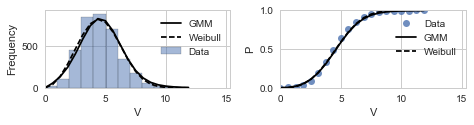

325.0 (315.0 - 335.0) degree
data size: 3596 weight 0.09892165492957747
GMM Weibull
R square 0.959484633792 0.967400480372
max diff: 0.0503408126658 0.0434886085656 speed value: 4.99431601846 4.99431601846 y gmm 0.587590221817
 


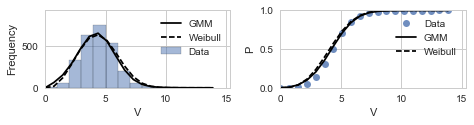

345.0 (335.0 - 355.0) degree
data size: 2586 weight 0.07113776408450705
GMM Weibull
R square 0.961989994681 0.95895874508
max diff: 0.0602748692268 0.0942410111824 speed value: 2.92109614974 3.65137018717 y gmm 0.204899772552
 
Wall time: 45 s


In [79]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9473742728899047 0.9632921004644883


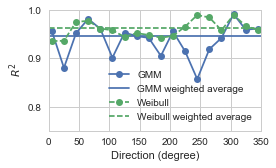

In [80]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.05574508751195179 0.07415373641838202


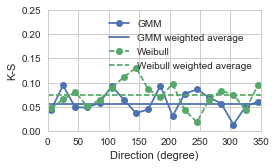

In [81]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

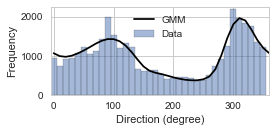

In [82]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [83]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [84]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution
0.0884206951512 5.0 0.622654746261


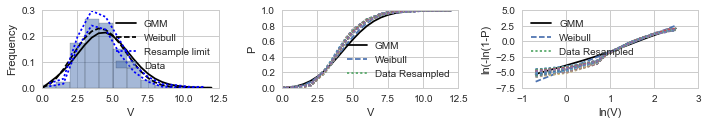

In [85]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [86]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(2001, 2015, 5):
    end_time = start_time + 4 
    df_other_years = df_all_years[str(start_time):str(end_time)]
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = start_time)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = start_time)
        
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=start_time, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = start_time*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if start_time == 2011 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if start_time == 2011 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl4HNWV9t9aepda+2JZki3LCwZjzL6aZMIScHDyJR9m
B4fFZP0S4gmZkBBwPGAYDAmEGUwIwWwBbBhIYsCQMTHGYxjAMIYY8G7Lq9SLulu9Vnct3x+tW64u
VS/qRSpb9/c8CZZaXX27u+q+dc49572MoigKKBQKhUKh5IQd7QFQKBQKhXIkQAWTQqFQKJQCoIJJ
oVAoFEoBUMGkUCgUCqUAqGBSKBQKhVIAVDApFAqFQikAKpgUCoVCoRQAFUwKhUKhUAqACiaFQqFQ
KAVABZNCoVAolAKggkmhUCgUSgFQwaRQKBQKpQCoYFIoFAqFUgBUMCkUCoVCKQAqmBQKhUKhFAAV
TAqFQqGMGPv27cOPfvQjXHbZZbjuuutw8803Y/v27Xj44Ycxffp09PX1qX/r9/tx3HHH4eWXX8b+
/fsxbdo0PPbYYxnH++53v4trr712RMZOBZNCoVAoI0I8Hsf3vvc9XH/99Vi5ciWefvpp/PCHP8Ti
xYsBABMnTsTq1avVv3/99dcxbtw49efOzk68+eab6s+BQAA9PT0jNn5+xF6JQqFQKKbh1ltvxYsv
vljWY86bNw9Lly7N+vjatWtxxhln4MQTT1R/N3PmTDz99NP493//d8yZMwdvvPEGvv3tb6t//0//
9E/q39bV1aG2thY7d+5Ed3c3Vq9ejYsuuggbN24s6/vIBo0wKRQKhTIi7N+/H52dnerP3/ve93Dt
tdfioosuQm9vLxobG+FwOLBv3z709PSgtbUVNpst4xhf+9rX8NprrwEA3nrrLZx//vkjNn4aYVIo
FMoYZOnSpTmjwUrQ2tqKzZs3qz8vW7YMAHDZZZdBkiQAhwVRFEXMnTsXGzZsyDjG+eefj6uvvhrf
+ta30NTUBLvdPmLjpxEmhUKhUEaE8847D++99x42bdqk/q6npwe9vb1gGAYA8NWvfhVvvfUWNm7c
iNNPP33IMVwuF7q6urB06VJccsklIzZ2gAomhUKhUEYIl8uFZcuW4amnnsI111yDK664Ar/4xS9w
2223oa2tDQBQXV2N1tZWHHvssWBZY4maO3cuPvroI5x55pkjOXwwiqIoI/qKFAqFQqEcgdAIk0Kh
UCiUAqCCSaFQKBRKAdAqWcqYRJZliKKIZDIJjuPAsiw4jgPHcWrxAYVCoWihgkkZU8iyjL6+PtTV
1ak/K4oCRVEQjUYRDofR1tYGlmXBMAwVUgqFokIFkzImkGUZkiRBlmUcOnQItbW1kGUZqVQKFotF
FUMioKQnjNTEMQyjCigVUgplbEIFk3JUQ1Kv2mJwRVHg9XrR398PhmEgSRKsVitYloUoiohGo7Ba
reB5PkMMCxVSnufVnykUytEDLfqhHJVIkoRkMolkMqmKmyiK6k4IyWQSXV1d6OrqwqRJk9Dc3Ayb
zQZFURAIBLB3717s3LkTe/fuRW9vLwKBAKLRqCq+RCiBw0IqiiIEQVBTu5FIBLFYDPF4HIIgQJIk
0C4uylhm/vz5+PTTTwGkr8GTTz4Zjz/+uPr4tddeiy+++GLI89555x2sWLEC+/fvx2WXXVbw6519
9tnqcXfu3Fni6GmESTnKkCRJTb0SURNFET6fD4FAAG63GyzLYty4ceA4Ti36cTgcUBQFgiCgvb1d
PZYgCEgmkxAEAZFIRBVgm80Gq9UKq9Wq/jtfRCoIAgCAZVk1AiVpXRqRUsYCZ599NjZu3IiZM2fi
o48+wjnnnIN169bhpptugiAIOHDgAI455pghzzv33HMBpL1oRxMqmJSjAiOhTKVS8Pl8CAaDqKmp
QXd3N6xWK8LhcEZKNRscx8HpdMLpdGb8nlTXEjGNRCIQBAEMw2QIKPm3fp1TK6SpVEqNWMm6qCAI
6nOpkFIqycSJQ3935ZXAPfcU9/iePblf76yzzsIjjzyCG264AevWrcO8efNw//33IxwO47PPPsNp
p52GDz/8EL/97W/BcRw6OjqwePFirFq1Crt27cIVV1yB/v5+fPe734Xf78eXv/xl/OAHP8DPf/5z
zJkzB+eeey7eeecdvP7667j33nuH92EUABVMyhGNkVAmk0n4fD6EQiHU1tZi8uTJsFgseY/FMExB
KVOe58HzfIaQEhEkIppIJDAwMIBkMgmGYVQR1YopEVJtalcURfT29sLtdsPlcqlRqL7YiAop5Ujk
2GOPxa5du6AoCj788EMsXLgQZ555Jt59911s3boV55xzDn71q1/hueeeQ0NDAx588EG88sor4PnD
UhWLxbB06VI4nU5cffXVOO+880Zs/FQwKUcciqJkVL1qhdLr9WJgYAB1dXWYMmVKxoVGKFQYhwPD
MKqQulyujLGStc1kMol4PI5gMKimgrUiSv5Ljkd8NGVZhizL6vG0j+uLjbQCTKHkI19EWOrjeliW
xTHHHIN33nkHTU1NsFqtOPfcc/H2229jy5YtuPrqq/GrX/0Kt9xyCwAgkUjgrLPOwoQJE9RjHHPM
MaiurgYAHH/88di9e3fGa1SyToAKJuWIIZtQCoIAr9eLcDiM+vr6rEJJyCaYlRJSi8UyJMJVFAWp
VEotTIrFYqqQAum0bzwez4hI9VFlIUKqXSOlUMzA2Wefjd///vf42te+BgA4+eST8cgjjwBIbxDd
2tqKRx55BNXV1XjrrbfgdDpx6NAh9fk7d+5ENBqFzWbDp59+issvvxzvvfcevF4vAODzzz+v2Nip
YFJMDxFKfYWqIAjweDyIRCIFCaWe0YzEyHoniSgJiqJg//79sNvtYFlWLTRKpVLged4wtauPKrVC
SgTYSEj1RUoUykhw1lln4fbbb8d9990HALBaraiursb06dPBsix++ctf4uabb4aiKHC5XLjvvvsy
BLOmpgY/+clP0N/fjzlz5mDy5MmYN28efvGLX2DVqlWYaLTwWibobiUU06IoCuLxOEKhEOrq6tTJ
PZFIwOv1IhKJoKGhAQ0NDeA4ruDjbt++HR0dHbDb7aqgAIAgCDh06FBFL7hCOHDgAGpqalBVVaX+
TlEUNRrVVu6KogiLxTIktas1YzAiW0TK8zw1Y6BQskAjTIrpIAU0kiQhkUggEAigvr4e8XgcXq8X
sVgMDQ0NaGtrG5ZQEiqReq00pHDIZrOp6zcAVLciIqKk0IgIqT4iJUJaSERKDBxcLhd1NaJQQAWT
YiK0QqlttZAkCT09PYjH42hsbER7e3vJa3IjtYZZaViWVYVUiyzLGdEoWR8lrkb61hejgqFwOAyH
w5GR5ibpXGoPSBmLUMGkjDpGQskwDGKxGHp7e5FMJtHQ0ICOjo6yFK+MhcmdZVnY7XbY7faM32sd
kARBQCwWgyAIkGV5SDRKekX1n5feHpC8HvXZpRztUMGkjBrZhDIajcLj8SCZTKKurg6pVAoNDQ1l
e92RrJItlkqNg7gaORyOjN8TIdWaMSQSCcRiMYRCoSFimsuMgRrWU45WqGBSRhwjoQSASCQCj8cD
URTR1NSE2tpapFIpBAKBsr6+VhjNJJKjiZGQHjp0CA6HA1arNaurkb7YiAop5WiGCiZlxNCalAOH
U33hcBgejweSJKG5uRk1NTXqYyMpaFQ8M1EUxdAesFBXo+FGpMDQ1C7d+YViJqhgUioOMRvQrokp
ioKBgQF4vV7Isozm5ma43e4hE2OlzATMLIxmF4d8rkYktZtIJBAKhXK6GunF0MiwXpZleDwetLe3
U8N6yqhCBZNSMbSuPCT1qigKQqGQ6srR1NRkKJSEkRRMswvpSDPcz0LraqQX0myuRhzHGZox6MUw
Go1mNazX/o8

### 6.4.3 Adjacent Sector Variability

In [88]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [89]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


25.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXl0HNWdNvxUVa9q7btlS7Ykyxgwwh4TL5j4xYGBQEIy
wwdOMHFCFgj+ki9jckIwvAGSzCQEPBCYzJCEzCEJhgFMYBKYYJjB4JgY8EDYgsHYSLYsWZZ6b/Xe
Xcv3h3zL1dXVW3V3qdW6zzkcrJZu3VvVVfep3/b8GEmSJFBQUFBQUFBkBTvTC6CgoKCgoJgNoIRJ
QUFBQUGRByhhUlBQUFBQ5AFKmBQUFBQUFHmAEiYFBQUFBUUeoIRJQUFBQUGRByhhUlBQUFBQ5AFK
mBQUFBQUFHmAEiYFBQUFBUUeoIRJQUFBQUGRByhhUlBQUFBQ5AFKmBQUFBQUFHmAEiYFBQUFBUUe
oIRJQUFBQUGRByhhUlBQUFBQ5AFKmBQUFBQUhmF0dBTf+ta3sHHjRnzxi1/Eddddh8OHD+NnP/sZ
Tj/9dExOTsp/6/F4cOaZZ+Kpp57C2NgYTjvtNDzwwAMpx7v++uuxefNmQ9ZOCZOCgoKCwhBEo1Fs
2bIFX/7yl7Fz50489NBD+OY3v4kf/vCHAIBFixZh165d8t8/++yzmDdvnvxzT08Pnn/+eflnn8+H
kZERw9ZvMmwmCgoKCoqKwY033ognnniipMe88sorsX379oy/f+mll7BmzRqsWLFC/mxwcBAPPfQQ
/vVf/xWXXnopnnvuOVxzzTXy32/YsEH+26amJjQ2NmJoaAj9/f3YtWsXPvnJT+KNN94o6XlkArUw
KSgoKCgMwdjYGHp6euSft2zZgs2bN+OTn/wkJiYm0NraCrvdjtHRUYyMjKCzsxNWqzXlGJ/61Kfw
xz/+EQCwe/duXHjhhYatn1qYFBQUFHMQ27dvz2oNlgOdnZ1477335J9//vOfAwA2btwIQRAAnCJE
nudx2WWXYd++fSnHuPDCC3H11Vfj8ssvR1tbG2w2m2HrpxYmBQUFBYUhuOCCC/Dqq6/i7bfflj8b
GRnBxMQEGIYBAFx88cXYvXs33njjDaxevTrtGA6HA729vdi+fTs+/elPG7Z2gBImBQUFBYVBcDgc
+PnPf47f/va3+MIXvoDPf/7zuOWWW3DzzTejq6sLAFBXV4fOzk6cccYZYFltirrsssvwl7/8BWvX
rjVy+WAkSZIMnZGCgoKCgmIWglqYFBQUFBQUeYASJgUFBQUFRR6gWbIUcxKiKILneSQSCXAcB5Zl
wXEcOI6Tkw8oKCgolKCESTGnIIoiJicn0dTUJP8sSRIkSUI4HEYwGERXVxdYlgXDMJRIKSgoZFDC
pJgTEEURgiBAFEWcOHECjY2NEEURyWQSZrNZJkNCoKQmjOTEMQwjEyglUgqKuQlKmBRVDeJ6VSaD
S5IEl8sFr9cLhmEgCAIsFgtYlgXP8wiHw7BYLDCZTClkmC+Rmkwm+WcKCorqAU36oahKCIKARCKB
RCIhkxvP83InhEQigd7eXvT29qKvrw/t7e2wWq2QJAk+nw/Hjh3D0NAQjh07homJCfh8PoTDYZl8
CVECp4iU53nE43HZtRsKhRCJRBCNRhGPxyEIAmgVF8Vcxpe+9CW8++67AKafwZUrV+Lf//3f5d9v
3rwZH3zwQdq4vXv34vHHH8fY2Bg2btyY93zr1q2Tjzs0NFTk6qmFSVFlEARBdr0SUuN5Hm63Gz6f
D/X19WBZFvPmzQPHcXLSj91uhyRJiMfjWLBggXyseDyORCKBeDyOUCgkE7DVaoXFYoHFYpH/ncsi
jcfj4HkePp8P8+bNA8MwsluXWqQUcwHr1q3DG2+8gcHBQfzlL3/Beeedhz/96U/42te+hng8juPH
j2Pp0qVp49avXw9gWot2JkEJk6IqoEWUyWQSbrcbfr8fDQ0N6O/vh8ViQTAYTHGpZgLHcaipqUFN
TU3K5yS7lpBpKBRCPB4HwzApBEr+rYxzkuQiQqTJZFK2WElcVPlvSqQU5cSiRemfXXUVcMcd+n5/
9Gj2+c4991zcf//9+MpXvoI//elPuPLKK/HP//zPCAaDOHDgAFatWoXXX38dP/3pT8FxHLq7u/HD
H/4QzzzzDIaHh/H5z38eXq8X119/PTweD84//3x84xvfwLZt23DppZdi/fr12Lt3L5599ln85Cc/
Kexi5AFKmBSzGlpEmUgk4Ha7EQgE0NjYiMWLF8NsNuc8FsMweblMTSYTTCZTCpESa5KQaCwWw9TU
FBKJBBiGkUmU4zg5AYmQo5JMeZ6X/02IVEmclEgpZjPOOOMMDA8PQ5IkvP766/j2t7+NtWvX4pVX
XsGHH36I8847D7feeiv+4z/+Ay0tLbj33nvxn//5nzCZTlFVJBLB9u3bUVNTg6uvvhoXXHCBYeun
hEkx6yBJEkRRhNvtRjweR0dHh0yULpcLU1NTaGpqwsDAQMqDRpAvMRYChmFkInU4HClrJbHNRCKB
aDQKURQxPDwMjuNSLFLyf0KGysxdURTl45H5WJZNSzZSjqOgyIVcFmGxv1eDZVksXboUe/fuRVtb
GywWC9avX489e/bg4MGDuPrqq3Hrrbdi69atAIBYLIZzzz0XCxculI+xdOlS1NXVAQDOOussHDly
JGWOcuYJUMKkmDUgREksSmJdxuNxuFwuBINBNDc3ZyRKgkyEWS4iNZvNsoWbSCRw/PhxLFq0CMlk
Uk5MikQi8Pv9SCQSMJlMafFRJZESZCPScDgMu90Om80mW6QUFJWAdevW4Ze//CU+9alPAQBWrlyJ
+++/H8B0g+jOzk7cf//9qKurw+7du1FTU4MTJ07I44eGhhAOh2G1WvHuu+/ic5/7HF599VW4XC4A
wPvvv1+2tVPCpKh4EKJUZ6jyPI9QKIRAIJAXUaoxE5YYIWUS77RYLCm/lyQJyWQyJT6aSCSQTCZh
MpnSrFGLxZJmVYqiCI/Hg6ampowWKcdxaUlKFBRG4Nxzz8X3vvc93HXXXQAAi8WCuro6nH766WBZ
Fv/3//5fXHfddZAkCQ6HA3fddVcKYTY0NOCGG26A1+vFpZdeisWLF+PKK6/ELbfcgmeeeQaLtAKv
JQLtVkJRsSBxQVKOQTb3WCwmW5QWiwW9vb3gOC7v4x4+fBjd3d2w2WxIJBLy5/F4HCdOnCjrA5dM
JjE6Ooq+vr6CxkmSJFujysxdnudhNpvTXLuTk5Nobm5OcQ+rjwekE6nJZKJiDBQUGUAtTIqKgxZR
MgyDaDQKl8uFSCSClpYWOBwOhMPhgsgSKI/rtdwgiUNWq1WO3wCQ1YoIiZJEo2QyicnJSdjt9hQy
JapGmVy75AVCSaRU1YiCYhqUMCkqBpmIMhKJwOVyIRqNorW1FQsWLADLsggEArqJz6gYZrnBsqxM
pEqMjo6itrYWLMsikUjI8VGiaqQufdFKGCJEqrwmxJ1L/pa4limRUswFUMKkmHGIoohIJAKz2ZxG
lE6nE7FYDG1tbeju7k5JXtFLcDO9uRtFyhaLJc0lq1RAisfjiEQiiMfjEEVRMz6qFeckNaSCIGBo
aAgDAwNpGbvUIqWoRlDCpJgxEIsyFothaGgIS5cuBcMwCIfDcDqdSCQSaGtrQ09Pj2aWZzGEOVMW
ppEEojUXUTWy2+0pnxMiVScbSZKkWfqitjKpYD3FXAAlTArDoeV6FQQBoVAITqcTPM+jra0NjY2N
WTfWUhDmbHTDlgOZiDSbqhHxCPj9fk1VIyB/wXpKpBSzAZQwKQyDUqQcOGUBhcNhSJKE8fFxtLe3
o6GhIa+Ns9RkR8kzHdlUjaLRKCYmJjKqGmlZpOpjkH8TaIkxUFUjikoBJUyKskMpMgCcIqapqSm4
XC45Q3NgYKC

# 7. Result Variability & Cross-Validation

In [90]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.6 square_error


## 7.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.414  -0.278   3.765  2.834  2.065  -0.006
2  0.343   3.372  -1.963  1.609  2.923   0.272
3  0.242  -0.108  -1.948  3.180  1.987  -0.512

GMM Plot Result
0.414236967922 [[-0.2781772   3.76540801]] [ 2.06538129  2.83358869] -90.523501008
0.343499159897 [[ 3.37199547 -1.96287064]] [ 1.5255047   2.96731302] 168.374934371
0.242263872181 [[-0.10783608 -1.94833513]] [ 1.60006909  3.3913694 ] -113.210067697


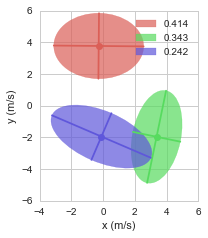

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.012      0.078  2.709747e-07      0.031       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.012      0.058  2.848840e-07      0.033       0.157

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.403  -0.289   3.821  2.838  1.979   0.013
2  0.351   3.384  -1.766  1.626  2.951   0.249
3  0.246  -0.142  -1.939  3.136  2.017  -0.521

GMM Plot Result
0.403494671051 [[-0.28923898  3.821276  ]] [ 1.97893618  2.83835073] -89.0163125006
0.3507600323 [[ 3.38380721 -1.76577121]] [ 1.55415515  2.98947863] 169.244150337
0.24574529665 [[-0.14155813 -1.93857203]] [ 1.60325466  3.36635092] -114.423043303


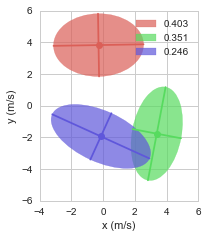

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.014      0.135  2.878189e-07      0.033       0.158

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.015      0.061  2.860810e-07      0.033       0.157

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.427  -0.099   3.778  2.892  2.082  -0.043
2  0.344   3.322  -2.158  1.676  2.767   0.230
3  0.230  -0.513  -1.826  2.946  2.016  -0.531

GMM Plot Result
0.426563403272 [[-0.09907271  3.77793705]] [ 2.07760372  2.89505466] -93.6472132122
0.343798469248 [[ 3.32247804 -2.15808918]] [ 1.60764829  2.80758447] 168.10373671
0.22963812748 [[-0.51264689 -1.82559389]] [ 1.56989801  3.20574595] -116.901551349


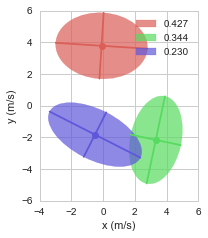

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.012      0.062  2.855565e-07      0.033       0.157

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.978  0.017      0.075  2.962927e-07      0.033       0.160

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.428  -0.039   3.761  2.902  2.073  -0.031
2  0.334   3.307  -2.075  1.650  2.746   0.241
3  0.238  -0.322  -1.915  3.172  2.045  -0.553

GMM Plot Result
0.428452165074 [[-0.0394816   3.76052852]] [ 2.07150507  2.90300578] -92.5500373133
0.333708537776 [[ 3.30738957 -2.07471955]] [ 1.57710546  2.7891833 ] 167.786895242
0.23783929715 [[-0.32167122 -1.91512216]] [ 1.57547246  3.42928709] -115.340609454


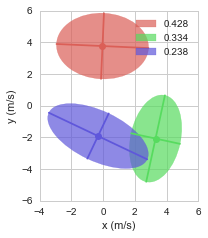

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.978  0.012      0.109  2.933881e-07      0.034       0.160

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.068  2.862953e-07      0.033       0.158

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.406  -0.238   3.823  2.809  2.037   0.018
2  0.331   3.379  -1.824  1.603  2.936   0.246
3  0.263   0.021  -1.944  3.245  2.021  -0.507

GMM Plot Result
0.406420193971 [[-0.23750922  3.82275599]] [ 2.0360284   2.80964367] -88.4456024214
0.330793254529 [[ 3.37946515 -1.82449633]] [ 1.53476098  2.97262778] 169.539556066
0.2627865515 [[ 0.02133319 -1.94380201]] [ 1.63633819  3.45479235] -112.950859218


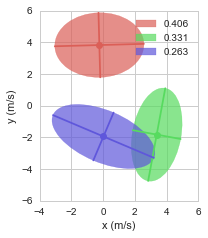

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.978  0.013      0.044  2.939800e-07      0.032       0.160

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.012      0.049  2.823632e-07      0.032       0.156

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.416  -0.245   3.757  2.835  2.026   0.005
2  0.357   3.370  -2.002  1.651  2.926   0.239
3  0.227  -0.390  -1.813  2.956  1.917  -0.488

GMM Plot Result
0.415704427384 [[-0.24478405  3.75698442]] [ 2.02564485  2.83466673] -89.5789198982
0.357188610341 [[ 3.37007545 -2.00227637]] [ 1.58282947  2.96305392] 169.226563485
0.227106962275 [[-0.39048869 -1.81346927]] [ 1.56775636  3.1553892 ] -113.7646466


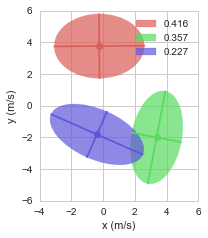

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.978  0.016      0.079  2.996040e-07      0.034       0.161

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.015      0.076  2.844983e-07      0.033       0.157

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.423  -0.173   3.755  2.916  2.051   0.002
2  0.366   3.335  -2.145  1.686  2.807   0.270
3  0.211  -0.440  -1.780  2.961  1.807  -0.502

GMM Plot Result
0.423119706391 [[-0.17302571  3.754988  ]] [ 2.05076604  2.91582455] -89.8767176332
0.36567445395 [[ 3.33482166 -2.14517238]] [ 1.59312497  2.8611953 ] 166.545268812
0.211205839659 [[-0.43994244 -1.78027419]] [ 1.47332259  3.14020281] -112.150595278


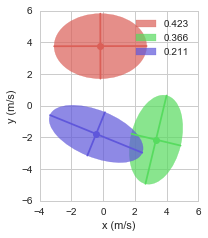

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.978  0.014      0.155  3.053331e-07      0.033       0.163

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.164  2.871349e-07      0.033       0.158

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.408  -0.199   3.827  2.845  2.011  -0.001
2  0.350   3.375  -1.827  1.639  2.837   0.238
3  0.242  -0.214  -2.033  3.067  2.079  -0.522

GMM Plot Result
0.408070357667 [[-0.19940972  3.82698245]] [ 2.01052045  2.84494373] -90.0742685891
0.349607476685 [[ 3.37536681 -1.82691313]] [ 1.57117094  2.87556245] 168.802859448
0.242322165648 [[-0.21404736 -2.03262134]] [ 1.63526393  3.32435015] -116.321637899


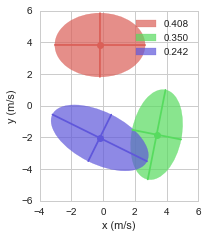

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.014      0.184  2.723922e-07      0.032       0.154

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.015      0.043  2.851677e-07      0.033       0.157

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.419  -0.198   3.765  2.858  2.087   0.030
2  0.347   3.367  -1.919  1.620  2.931   0.251
3  0.234  -0.086  -1.977  3.091  1.919  -0.519

GMM Plot Result
0.418753784482 [[-0.19842539  3.76462716]] [ 2.08489161  2.85936744] -87.3088608194
0.346955975112 [[ 3.36661392 -1.91861447]] [ 1.54800161  2.97018946] 169.11547608
0.234290240407 [[-0.08584994 -1.97728133]] [ 1.53726533  3.29688824] -113.175738321


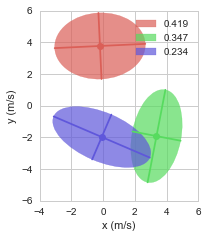

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.012      0.073  2.818100e-07      0.032       0.156

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.012      0.095  2.806936e-07      0.032       0.156

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.424  -0.162   3.743  2.898  2.039  -0.017
2  0.349   3.362  -2.077  1.652  2.861   0.265
3  0.227  -0.272  -1.873  3.015  1.875  -0.500

GMM Plot Result
0.424084890149 [[-0.16157632  3.74254442]] [ 2.03816425  2.89850764] -91.3548384153
0.348792872894 [[ 3.36173994 -2.07694837]] [ 1.56740763  2.90831895] 167.685092144
0.227122236956 [[-0.2719564  -1.87347942]] [ 1.52744214  3.20568806] -112.714816391


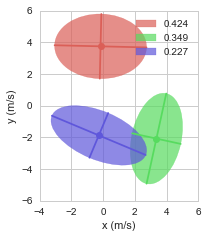

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.014      0.097  2.789442e-07      0.032       0.156

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.014      0.101  2.802560e-07      0.032       0.156


Wall time: 12 s


In [91]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [92]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Number of train/test dataset 27264.0 9088.0
  
Number of gaussian 1
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.122398  0.074840  0.000003    0.114793     0.539453  0.752251
1    0.122183  0.075203  0.000003    0.109292     0.543974  0.749388
2    0.125692  0.074884  0.000003    0.112027     0.546035  0.746492
3    0.125651  0.075523  0.000003    0.115031     0.549437  0.743158

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.137077  0.081271  0.000004    0.110832     0.579663  0.717183
1    0.134351  0.074527  0.000003    0.124924     0.549177  0.742431
2    0.122802  0.075113  0.000003    0.114713     0.539682  0.753359
3    0.124355  0.070300  0.000003    0.105688     0.528192  0.764769

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.055941  0.033139  8.261400e-07    0.054195     0.267619  0.939675
1    0.054116  0.033517  8.277967e-07    0.055263     0.267966  0.938964
2    0.052578  0.032610  8.267774e-07    0.056517     0.267606  0.938393
3    0.054438  0.032826  8.193619e-07    0.055461     0.266495  0.939859

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.062845  0.029542  9.053416e-07    0.062065     0.280089  0.931818
1    0.063512  0.037842  8.769554e-07    0.057618     0.275420  0.935787
2    0.055252  0.036756  9.291716e-07    0.055464     0.284123  0.934210
3    0.059163  0.030862  9.024610e-07    0.056948     0.279718  0.933037

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.063280  0.013722  2.675181e-07    0.031905     0.152242  0.980203
1    0.054828  0.014094  2.800179e-07    0.031722     0.155871  0.979406
2    0.051197  0.013095  2.873651e-07    0.032552     0.157736  0.978968
3    0.097711  0.013331  2.858822e-07    0.032834     0.157474  0.978863

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.067151  0.013959  3.938516e-07    0.036892     0.184906  0.971489
1    0.407048  0.015689  3.626726e-07    0.038605     0.177054  0.973266
2    0.062568  0.016686  3.264574e-07    0.035180     0.168513  0.975557
3    0.054013  0.013793  3.291250e-07    0.034164     0.168730  0.976095

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.031003  0.007444  2.123866e-07    0.028224     0.135657  0.984259
1    0.037518  0.008599  2.355452e-07    0.029705     0.142811  0.982827
2    0.035393  0.010149  2.241996e-07    0.028802     0.139557  0.983351
3    0.083414  0.011669  2.269595e-07    0.028807     0.140216  0.983337

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.042262  0.006908  2.953966e-07    0.032625     0.160115  0.978670
1    0.039695  0.013038  2.700677e-07    0.031251     0.153257  0.979566
2    0.048576  0.009245  2.837589e-07    0.032630     0.156327  0.979657
3    0.071337  0.016529  3.308829e-07    0.035882     0.169523  0.975442

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.061833  0.008580  1.568392e-07    0.024014     0.116556  0.988437
1    0.028166  0.008896  1.617307e-07    0.024122     0.118398  0.988087
2    0.048148  0.008013  1.494477e-07    0.023799     0.113807  0.989013
3    0.042980  0.007998  1.379067e-07    0.022870     0.109389  0.989831

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.052235  0.013631  2.143065e-07    0.028629     0.136446  0.984319
1    0.033117  0.012692  2.887258e-07    0.034381     0.158218  0.978835
2    0.070651  0.013977  2.539747e-07    0.029796     0.148415  0.981277
3    0.065885  0.019409  2.750438e-07    0.030974     0.154178  0.979892

Wall time: 41.1 s


In [93]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.123981  0.075112  3.423259e-06    0.112786     0.544725  0.747822
2    0.054268  0.033023  8.250190e-07    0.055359     0.267422  0.939223
3    0.066754  0.013561  2.801958e-07    0.032253     0.155831  0.979360
4    0.046832  0.009465  2.247727e-07    0.028884     0.139560  0.983444
5    0.045282  0.008372  1.514811e-07    0.023701     0.114538  0.988842

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.129646  0.075303  3.483026e-06    0.114039     0.549179  0.744435
2    0.060193  0.033750  9.034824e-07    0.058024     0.279838  0.933713
3    0.147695  0.015032  3.530267e-07    0.036210     0.174800  0.974102
4    0.050468  0.011430  2.950265e-07    0.033097     0.159806  0.978334
5    0.055472  0.014927  2.580127e-07    0.030945     0.149314  0.981081

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


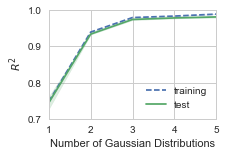

K_S


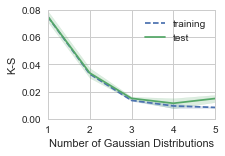

Chi_square


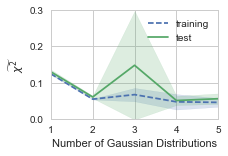

In [94]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

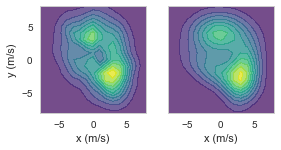

In [95]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

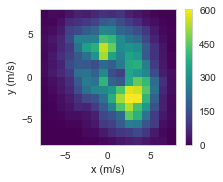

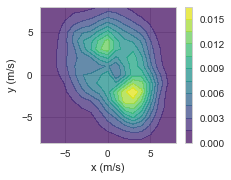

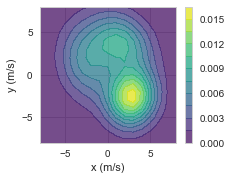

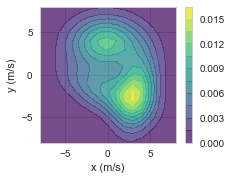

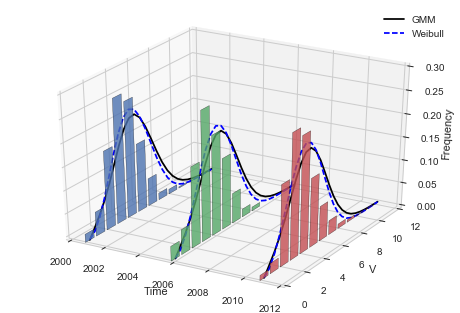

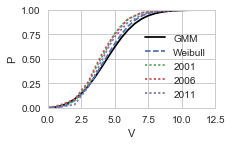

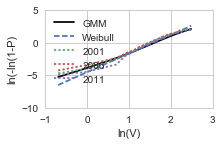

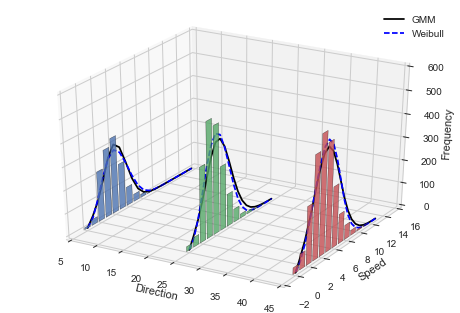

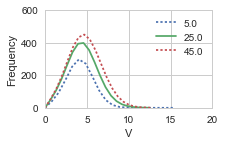

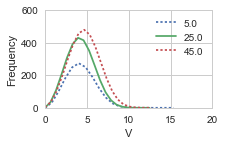

In [96]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [97]:

import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

hongqiao_intl
